# Funding in startups

- Funding a startup with a revolutionary idea may seem very attractive, but having insights and knowledge about the condition of startups founded in the past can help in shaping future startup ideas and positioning it well in today's markets, which can ultimately lead to increasing its performance many folds, in the real world.

1. The objective of this project is to provide valuable insights to both experienced investors & aspiring entrepreneurs. 
2. By studying past trends, we can identify potential opportunities & challenges for future startups. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import f_oneway, ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import combinations

## Basic Analysis

In [2]:
df = pd.read_csv('investments_VC.csv', encoding='ISO-8859-1')
pd.options.display.max_columns = None
df.sample(15)

permalink   
25177                /organization/magnus-life-science  \
28067                          /organization/mylingo-2   
51183                                              NaN   
33576       /organization/proactive-business-solutions   
3396                    /organization/asante-solutions   
3502                           /organization/assuramed   
52411                                              NaN   
28786  /organization/hangzhou-netops-technology-co-ltd   
11601                            /organization/diarize   
13646                                /organization/zen   
13308                       /organization/embee-mobile   
11149                   /organization/dbv-technologies   
13802                           /organization/enzymerx   
48269                    /organization/xlv-diagnostics   
47624                              /organization/wimdu   

                               name   
25177           Magnus Life Science  \
28067                       myLINGO   
51183                           NaN   
33576  Proactive Business Solutions   
3396               Asante Solutions   
3502                      AssuraMed   
52411                           NaN   
28786             Netops Technology   
11601                       Diarize   
13646                  Enkari, Ltd.   
13308                  Embee Mobile   
11149              DBV Technologies   
13802                      EnzymeRx   
48269               XLV Diagnostics   
47624                         Wimdu   

                                       homepage_url   
25177            http://www.magnuslifescience.co.uk  \
28067                         http://mylingoapp.com   
51183                                           NaN   
33576  http://www.pro-active-business-solutions.com   
3396                 http://www.asantesolutions.com   
3502                           http://assuramed.com   
52411                                           NaN   
28786                      http://www.netopstec.com   
11601                         http://www.diarize.co   
13646                           http://agilezen.com   
13308                    http://www.embeemobile.com   
11149               http://www.dbv-technologies.com   
13802                       http://www.enzymerx.com   
48269                     http://xlvdiagnostics.com   
47624                          http://www.wimdu.com   

                                           category_list   
25177                                    |Biotechnology|  \
28067                    |Entertainment Industry|Mobile|   
51183                                                NaN   
33576                                |Business Services|   
3396      |Health and Wellness|Diabetes|Medical Devices|   
3502                               |Health and Wellness|   
52411                                                NaN   
28786                              |Enterprise Software|   
11601                          |Photography|Apps|Mobile|   
13646  |Internet|Health and Wellness|Software|Project...   
13308           |Gift Card|Facebook Applications|Mobile|   
11149                                    |Biotechnology|   
13802                                    |Biotechnology|   
48269                                      |Electronics|   
47624  |Vacation Rentals|Hotels|Online Rental|Social ...   

                        market   funding_total_usd      status country_code   
25177            Biotechnology         2,48,33,177   operating          GBR  \
28067   Entertainment Industry           11,25,007   operating          USA   
51183                       NaN                 NaN        NaN          NaN   
33576        Business Services                 -     operating          CAN   
3396                  Diabetes                 -     operating          USA   
3502       Health and Wellness           57,00,000    acquired          USA   
52411                       NaN                 NaN        NaN          NaN   
28786      Enterp

In [3]:
df.shape

(54294, 39)

### Renaming ' market ' to 'market' and ' funding_total_usd ' to 'funding_total_usd'

In [4]:
df.rename(columns={' market ': 'market', ' funding_total_usd ':'funding_total_usd'}, inplace=True)

### Keeping only rows that does not contain null values

In [5]:
df = df[~df.isnull().all(axis=1)]

### Unique Values in categorical column

In [6]:
categories = ['permalink', 'name', 'homepage_url', 'category_list', 'market', 'status', 'country_code', 'state_code', 'region', 'city']

for column in categories:
    num_unique_values = df[column].nunique()  # Get number of unique values
    print(f"Column '{column}': {num_unique_values}")

Column 'permalink': 49436
Column 'name': 49350
Column 'homepage_url': 45850
Column 'category_list': 16675
Column 'market': 753
Column 'status': 3
Column 'country_code': 115
Column 'state_code': 61
Column 'region': 1089
Column 'city': 4188


### Checking null values column wise

In [7]:
round(df.isnull().sum()/df.shape[0]*100,2)

permalink                0.00
name                     0.00
homepage_url             6.98
category_list            8.01
market                   8.03
funding_total_usd        0.00
status                   2.66
country_code            10.67
state_code              38.99
region                  10.67
city                    12.37
funding_rounds           0.00
founded_at              22.02
founded_month           22.16
founded_quarter         22.16
founded_year            22.16
first_funding_at         0.00
last_funding_at          0.00
seed                     0.00
venture                  0.00
equity_crowdfunding      0.00
undisclosed              0.00
convertible_note         0.00
debt_financing           0.00
angel                    0.00
grant                    0.00
private_equity           0.00
post_ipo_equity          0.00
post_ipo_debt            0.00
secondary_market         0.00
product_crowdfunding     0.00
round_A                  0.00
round_B                  0.00
round_C   

### Removing duplicate if any

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(49438, 39)

### Changing data type of date column to date-time.

In [10]:
df['founded_at'] = pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors='coerce')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors='coerce')

### Handling null values in the dataset

In [11]:
print(f"null values in city column : {df['city'].isnull().sum()}")
print(f"null values in market column : {df['market'].isnull().sum()}")
print(f"null values in total funding column : {df['funding_total_usd'].isnull().sum()}")

null values in city column : 6116
null values in market column : 3968
null values in total funding column : 0


In [12]:
df['funding_total_usd'] = df['funding_total_usd'].str.replace(' ','')
df['funding_total_usd'] = df['funding_total_usd'].str.replace(',','')
df['funding_total_usd'] = df['funding_total_usd'].replace('-', np.nan)
df['funding_total_usd'] = df['funding_total_usd'].astype('float')

print(f"null values in total funding column : {df['funding_total_usd'].isnull().sum()}")

null values in total funding column : 8531


In [13]:
funding_columns = [
    'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 
    'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 
    'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 
    'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'
]

# row-wise sum 
df['total_amount_usd'] = df[funding_columns].sum(axis=1)

In [14]:
df['funding_total_usd'] = df['funding_total_usd'].replace(np.nan, 0)
print(f"null values in total funding column : {df['funding_total_usd'].isnull().sum()}")

null values in total funding column : 0


In [15]:
df[(df['total_amount_usd'] != 0) & (df['funding_total_usd'].isna())][['total_amount_usd', 'funding_total_usd']]

Empty DataFrame
Columns: [total_amount_usd, funding_total_usd]
Index: []

In [16]:
df[['region','city', 'country_code']].sample(15)

region             city country_code
6379       Indianapolis         Anderson          USA
13575           Seattle          Seattle          USA
26803       Minneapolis      Minneapolis          USA
25901       Los Angeles    Beverly Hills          USA
13662       Oberhaching      Oberhaching          DEU
39698         San Diego        San Diego          USA
15583       SF Bay Area       Emeryville          USA
13834     New York City         New York          USA
47277   Aix-en-provence  Aix-en-provence          FRA
545                 NaN              NaN          NaN
15532  Washington, D.C.       Washington          USA
41848            London           London          GBR
12026    Rio de Janeiro   Rio De Janeiro          BRA
38540             Paris            Paris          FRA
20603            London           Oxford          GBR

In [17]:
df[df['country_code'].isna()][['name', 'homepage_url', 'country_code', 'region']].sample(15)

name                              homepage_url   
40139                       Sponto                         http://Sponto.com  \
27508                     Moove In                     http://moovein.com.br   
31851  People Operating Technology  http://www.peopleoperatingtechnology.com   
24734                      Loudeye                                       NaN   
35448          Renaissance Factory       http://www.renaissance-factory.com/   
14487                       exozet                     http://www.exozet.com   
19508                        HuoBi                     http://www.huobi.com/   
30692   Optimum Pumping Technology           http://www.optimum-pumping.com/   
40265                        Spout                           http://spout.co   
44119                 Triada Games                                       NaN   
16281                  Fundability                http://www.fundability.com   
32459                   Pirate Pay                      http://piratepay.ru/   
28131                 MyRooms Inc.                    http://www.myrooms.com   
35709               Rethink Autism  http://www.rethinkfirst.com/Default.aspx   
30945                        Osurv                          http://osurv.com   

      country_code region  
40139          NaN    NaN  
27508          NaN    NaN  
31851          NaN    NaN  
24734          NaN    NaN  
35448          NaN    NaN  
14487          NaN    NaN  
19508          NaN    NaN  
30692          NaN    NaN  
40265          NaN    NaN  
44119          NaN    NaN  
16281          NaN    NaN  
32459          NaN    NaN  
28131          NaN    NaN  
35709          NaN    NaN  
30945          NaN    NaN

In [18]:
df['country_domain'] = df['homepage_url'].apply(lambda url: re.findall(r'\.(\w+)$', url)[-1] if isinstance(url, str) and re.search(r'\.(\w+)$', url) else np.nan)

# Display the rows where `country_code` is NaN and only valid country domains are extracted
df[df['country_code'].isna()][['homepage_url', 'country_domain', 'country_code']].sample(15)

homepage_url country_domain country_code
19076    http://www.hiredmyway.com            com          NaN
17625         http://gorbworld.com            com          NaN
23658   http://www.learnitlive.com            com          NaN
39231         http://www.sobrr.me/            NaN          NaN
8542       http://www.class6ix.com            com          NaN
19427  http://hubblybubbly.uk.com/            NaN          NaN
7092                http://canv.as             as          NaN
49436    http://www.alistgames.com            com          NaN
28889    http://www.neuronation.de             de          NaN
3785         http://www.aureon.com            com          NaN
2361                           NaN            NaN          NaN
20801    http://www.insidejobs.com            com          NaN
38466    http://www.simplemist.com            com          NaN
24081            http://likeit.com            com          NaN
33276   http://precisionlender.com            com          NaN

In [19]:
domain_to_country_code = {
    'USA': 'us', 'EST': 'ee', 'GBR': 'uk', 'ARG': 'ar', 'HKG': 'hk', 
    'CHL': 'cl', 'DEU': 'de', 'FRA': 'fr', 'CHN': 'cn', 'CAN': 'ca', 
    'AUS': 'au', 'ROM': 'ro', 'NLD': 'nl', 'SWE': 'se', 'RUS': 'ru', 
    'DNK': 'dk', 'IND': 'in', 'SGP': 'sg', 'NOR': 'no', 'BEL': 'be', 
    'IRL': 'ie', 'ITA': 'it', 'ISR': 'il', 'ESP': 'es', 'THA': 'th', 
    'NZL': 'nz', 'CZE': 'cz', 'CHE': 'ch', 'BRA': 'br', 'HUN': 'hu', 
    'JPN': 'jp', 'BWA': 'bw', 'KOR': 'kr', 'NGA': 'ng', 'FIN': 'fi', 
    'TUR': 'tr', 'CRI': 'cr', 'PRT': 'pt', 'TWN': 'tw', 'KHM': 'kh', 
    'COL': 'co', 'UKR': 'ua', 'LTU': 'lt', 'ZAF': 'za', 'AUT': 'at', 
    'PHL': 'ph', 'ISL': 'is', 'BGR': 'bg', 'URY': 'uy', 'HRV': 'hr', 
    'KEN': 'ke', 'MEX': 'mx', 'JOR': 'jo', 'VNM': 'vn', 'GHA': 'gh', 
    'PER': 'pe', 'POL': 'pl', 'IDN': 'id', 'PAN': 'pa', 'LVA': 'lv', 
    'ALB': 'al', 'UGA': 'ug', 'LBN': 'lb', 'GRC': 'gr', 'ARE': 'ae', 
    'PAK': 'pk', 'EGY': 'eg', 'SVK': 'sk', 'LUX': 'lu', 'MYS': 'my', 
    'BHS': 'bs', 'ARM': 'am', 'DZA': 'dz', 'MDA': 'md', 'TUN': 'tn', 
    'NIC': 'ni', 'TZA': 'tz', 'CYP': 'cy', 'NPL': 'np', 'BHR': 'bh', 
    'CMR': 'cm', 'SRB': 'rs', 'SAU': 'sa', 'CYM': 'ky', 'BRN': 'bn', 
    'SLV': 'sv', 'ECU': 'ec', 'MLT': 'mt', 'SVN': 'si', 'LAO': 'la', 
    'TTO': 'tt', 'MAR': 'ma', 'MMR': 'mm', 'BGD': 'bd', 'DOM': 'do', 
    'BMU': 'bm', 'LIE': 'li', 'MOZ': 'mz', 'GTM': 'gt', 'AZE': 'az', 
    'MCO': 'mc', 'ZWE': 'zw', 'UZB': 'uz', 'OMN': 'om', 'BLR': 'by', 
    'JEY': 'je', 'JAM': 'jm', 'KWT': 'kw', 'MUS': 'mu', 'CIV': 'ci', 
    'SOM': 'so', 'MKD': 'mk', 'GIB': 'gi', 'SYC': 'sc', 'MAF': 'mf'
}


country_code_to_domain = {v: k for k, v in domain_to_country_code.items()}


df['country_code'] = df['country_code'].fillna(
    df['country_domain'].map(country_code_to_domain)
)

df.loc[[4243, 32783, 8273],['homepage_url', 'country_domain', 'country_code']]

homepage_url country_domain country_code
4243   http://www.baby.com.br             br          BRA
32783     http://www.ploog.it             it          ITA
8273       http://www.cihi.cn             cn          CHN

In [20]:

def fill_country_code(row):
    if pd.isna(row['country_code']) and row['country_domain'] in country_code_to_domain:
        return country_code_to_domain[row['country_domain']]
    return row['country_code']

# Apply the function to the DataFrame
df['country_code'] = df.apply(fill_country_code, axis=1)

df[(df['country_code'].notna()) & (df['region'].isna())][['name', 'country_code', 'region', 'homepage_url']].sample(15)


name country_code region   
33543           Privatext          COL    NaN  \
43854    Training Advisor          AUS    NaN   
35265          reeplay.it          ITA    NaN   
34797         Rankomat.pl          POL    NaN   
12587          E.M.A.R.C.          ITA    NaN   
18275         H&R Century          CHN    NaN   
6707     Buy Local Canada          CAN    NaN   
46064             Vidimax          RUS    NaN   
83                 1Rebel          GBR    NaN   
25885  Mediakraft Türkiye          DEU    NaN   
14776      FamilySpace.RU          RUS    NaN   
34683          Radio NEXT          AZE    NaN   
27508            Moove In          BRA    NaN   
41881              Tamago          USA    NaN   
14198         Eventmag.ru          RUS    NaN   

                            homepage_url  
33543                http://Privatext.co  
43854  http://www.trainingadvisor.com.au  
35265                  http://reeplay.it  
34797                 http://rankomat.pl  
12587                http://www.emarc.it  
18275                 http://www.hrcp.cn  
6707        http://www.buylocalcanada.ca  
46064              http://www.vidimax.ru  
83                    http://1rebelco.uk  
25885       http://mediakraftnetworks.de  
14776          http://www.familyspace.ru  
34683            http://www.radionext.az  
27508              http://moovein.com.br  
41881               http://www.tamago.us  
14198             http://www.eventmag.ru

In [21]:
region_mode = df.groupby('country_code')['region'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# Fill NaN values in the 'region' column with the calculated mode for each country_code group
df['region'] = df['region'].fillna(region_mode)

In [22]:
df[['country_code', 'region', 'founded_year', 'founded_at']].isna().sum()/df.shape[0]*100

country_code     9.765767
region           9.765767
founded_year    22.161091
founded_at      22.017476
dtype: float64

In [23]:
df.loc[[208, 95, 49031],['homepage_url', 'country_domain', 'country_code', 'region']]

homepage_url country_domain country_code     region
208             http://www.3dops.co             co          COL     Bogota
95               http://www.2pro.hk             hk          HKG  Hong Kong
49031  http://www.smartinspector.ru             ru          RUS     Moscow

In [24]:
df[(df['founded_year'].isna()) & (df['founded_at'].notna())][['name','founded_year', 'founded_at']]

name  founded_year founded_at
1457                                  AG&P           NaN 1900-01-01
2253                    American Red Cross           NaN 1881-05-01
3221              Arizona State University           NaN 1885-02-26
3439   Asia Pacific Marine Container Lines           NaN 1870-01-05
3571                               Athenix           NaN 1863-01-01
...                                    ...           ...        ...
47244                               WeGame           NaN 1840-01-01
47595               Wilberforce University           NaN 1856-01-01
47880      Worcester Polytechnic Institute           NaN 1865-01-01
48135                    Xavier University           NaN 1831-01-01
49189                 Zions Bancorporation           NaN 1873-01-01

[71 rows x 3 columns]

In [25]:
df['founded_year'] = np.where(
    df['founded_year'].isna() & df['founded_at'].notna(),
    df['founded_at'].dt.year,
    df['founded_year']
)

df[(df['founded_year'].isna()) & (df['founded_at'].notna())][['name','founded_year', 'founded_at']]

Empty DataFrame
Columns: [name, founded_year, founded_at]
Index: []

In [26]:
df['founded_month'] = df['founded_month'].combine_first(df['founded_at'].dt.strftime('%Y-%m'))

In [27]:
df[['country_code', 'region', 'founded_year', 'founded_at', 'founded_month']].isna().sum()/df.shape[0]*100

country_code      9.765767
region            9.765767
founded_year     22.017476
founded_at       22.017476
founded_month    22.017476
dtype: float64

In [28]:
df.loc[[3221, 3571], ['name', 'founded_year', 'founded_at']]

name  founded_year founded_at
3221  Arizona State University        1885.0 1885-02-26
3571                   Athenix        1863.0 1863-01-01

In [29]:
df.drop(columns=['state_code', 'city', 'permalink', 'homepage_url', 'category_list', 'country_domain'], inplace=True)

In [30]:
round(df.isnull().sum()/df.shape[0]*100,2)

name                     0.00
market                   8.03
funding_total_usd        0.00
status                   2.66
country_code             9.77
region                   9.77
funding_rounds           0.00
founded_at              22.02
founded_month           22.02
founded_quarter         22.16
founded_year            22.02
first_funding_at         0.02
last_funding_at          0.01
seed                     0.00
venture                  0.00
equity_crowdfunding      0.00
undisclosed              0.00
convertible_note         0.00
debt_financing           0.00
angel                    0.00
grant                    0.00
private_equity           0.00
post_ipo_equity          0.00
post_ipo_debt            0.00
secondary_market         0.00
product_crowdfunding     0.00
round_A                  0.00
round_B                  0.00
round_C                  0.00
round_D                  0.00
round_E                  0.00
round_F                  0.00
round_G                  0.00
round_H   

In [31]:
df['market'] = df['market'].str.strip()

### Replacing NaN values in country_code and region columns with unknown term.

In [32]:
round(df[['market', 'country_code', 'region', 'founded_at', 'founded_year']].isnull().sum()/df.shape[0]*100,2)


market           8.03
country_code     9.77
region           9.77
founded_at      22.02
founded_year    22.02
dtype: float64

In [33]:
# df['market'] = df['market'].fillna('Unknown')
# df['country_code'] = df['country_code'].fillna("Unknown")
# df['region'] = df['region'].fillna("Unknown")
# df['founded_at'] = df['founded_at'].replace(np.nan, df['founded_at'].mean())
# df['founded_year'] = df['founded_year'].replace(np.nan, 2007)

In [34]:
df[['country_code', 'region', 'founded_year', 'founded_at']].isna().sum()/df.shape[0]*100

country_code     9.765767
region           9.765767
founded_year    22.017476
founded_at      22.017476
dtype: float64

### Count Plot for status column

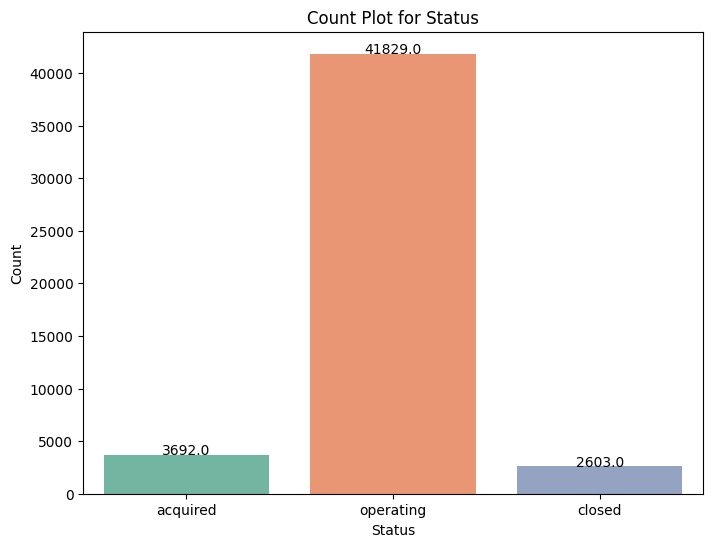

In [35]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='status', palette='Set2')
plt.title("Count Plot for Status")
plt.xlabel("Status")
plt.ylabel("Count")

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black')

plt.show()

### Observations and Recommendations: 

- **For investors**:

1. **Focus on Operating Companies**: Prioritize investments in companies that are actively operating and demonstrating strong growth potential.
2. **Evaluate Acquisition Potential**: Identify companies with attractive acquisition targets. Consider their technology, market position, and team.
3. **Risk Management**: Understand the risk associated with investing in closed companies. Conduct thorough due diligence to assess the reasons for closure and potential liabilities.
4. **Diversification**: Diversify investments across different stages, sectors, and geographic regions to mitigate risk.

- For Startups:

1. **Focus on Growth**: Prioritize growth and scalability to attract investors and potential acquirers.
2. **Build a Strong Team**: A talented and experienced team is crucial for success.
3. **Financial Management**: Maintain strong financial discipline and focus on profitability.
4. **Strategic Partnerships**: Consider strategic partnerships to accelerate growth and access new markets.



### Top 10 market, city, state and country with respect to total count of funding rounds.

In [36]:
df['country_code'].value_counts()

country_code
USA    28809
GBR     2689
CAN     1415
CHN     1268
DEU      990
       ...  
ZWE        1
MCO        1
BRN        1
MOZ        1
MAF        1
Name: count, Length: 115, dtype: int64

### Total funding market wise

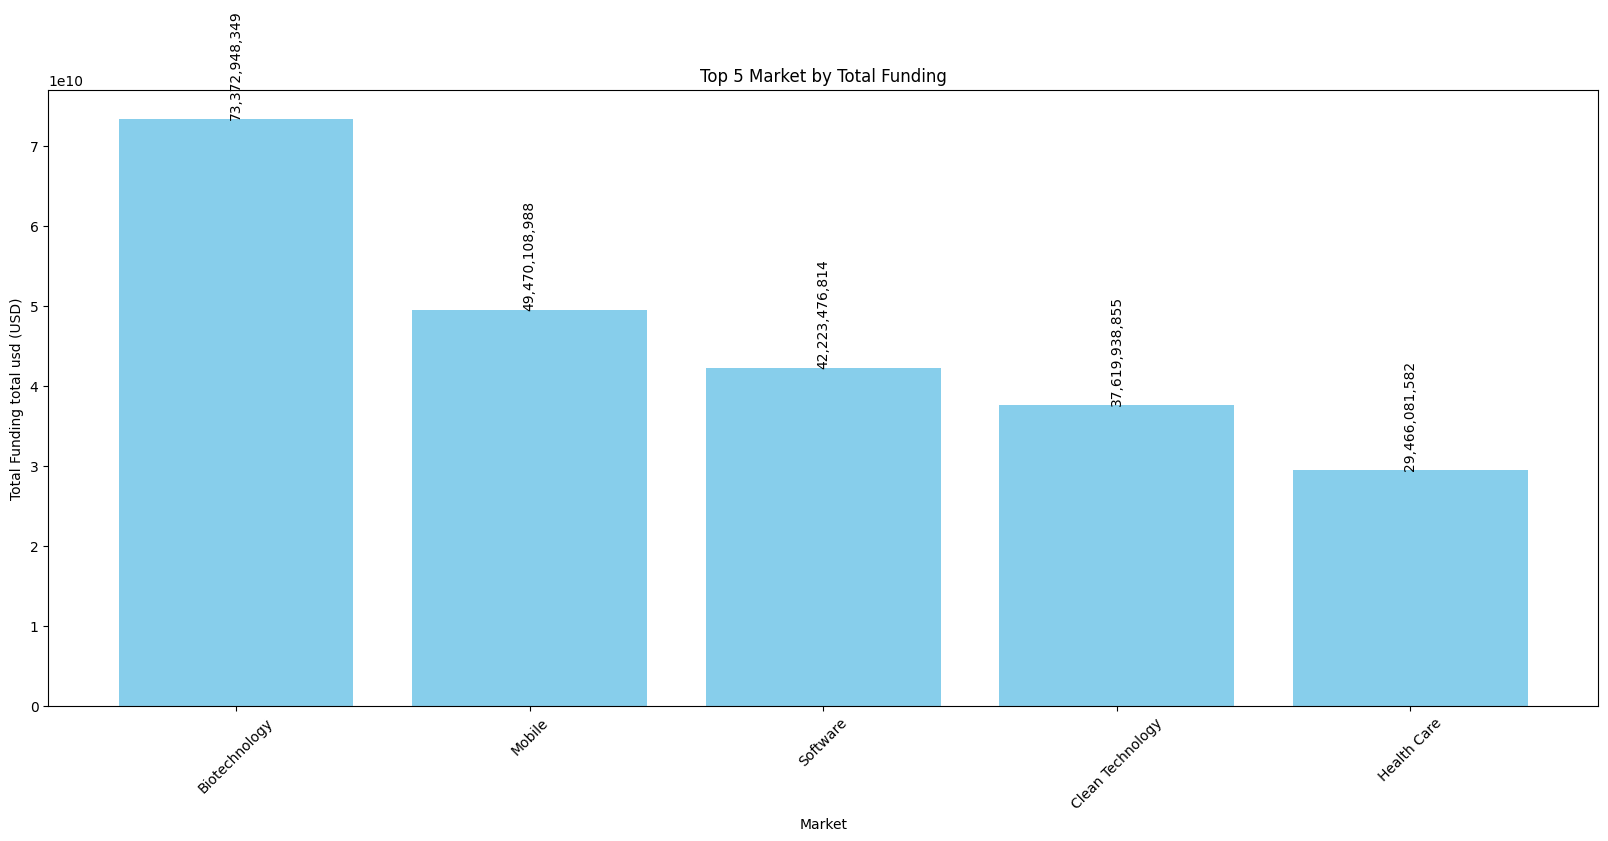

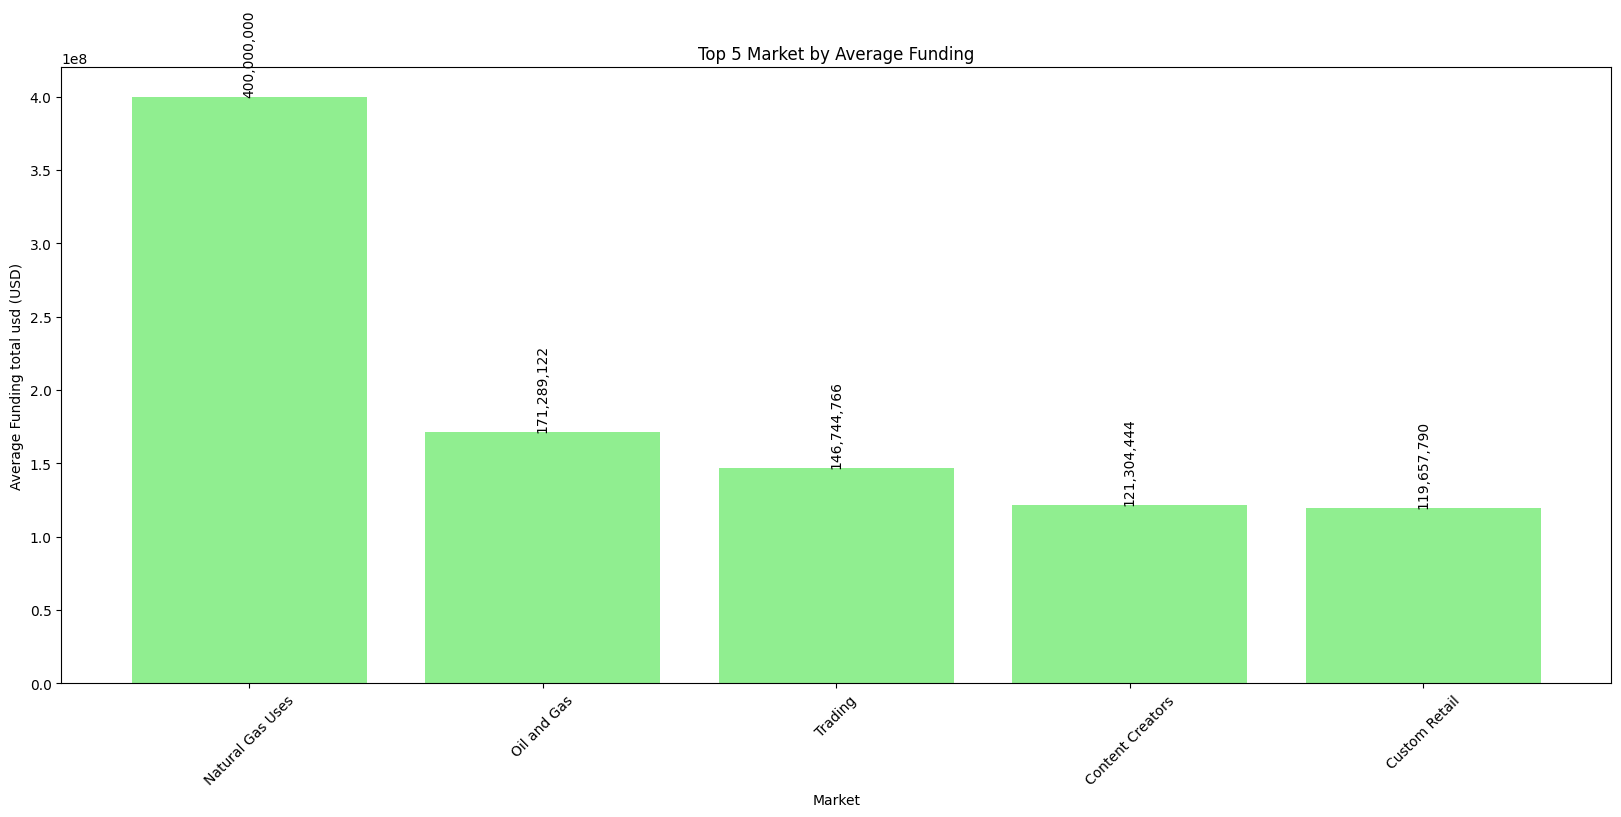

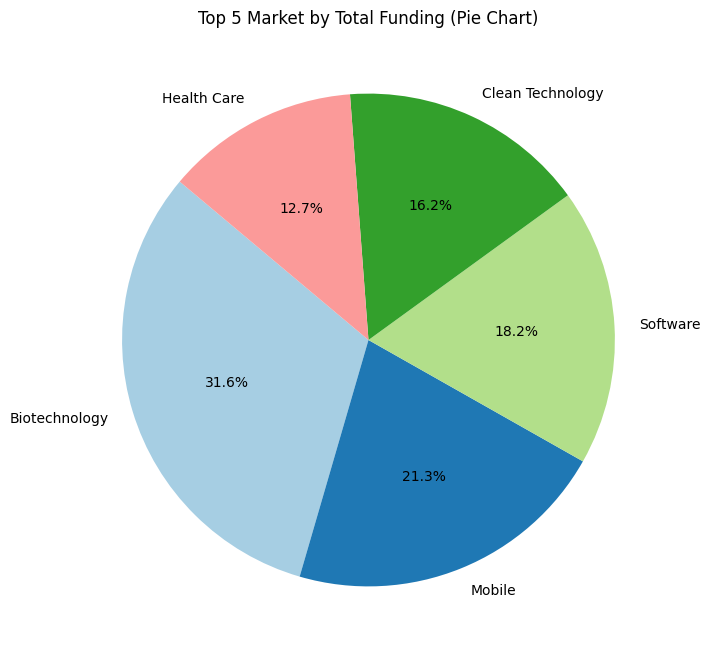

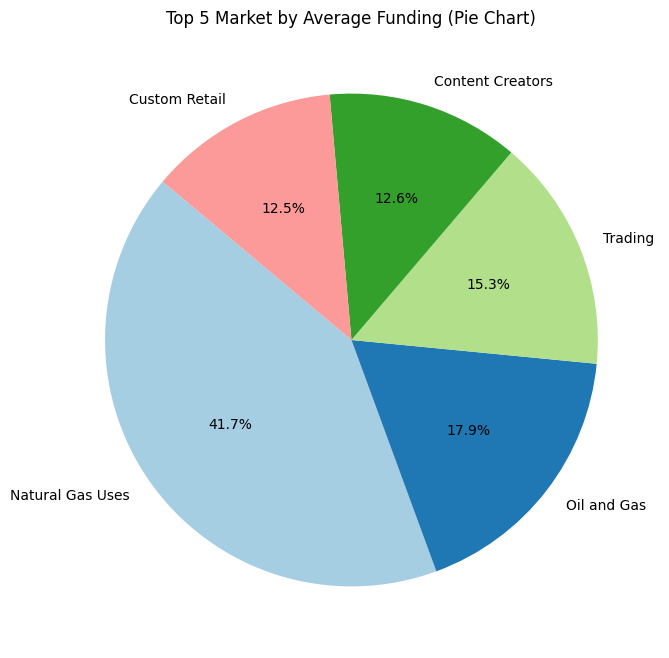

In [37]:
def plot_funding_distribution(df, group_by_column, funding_column='funding_total_usd', top_n=5):
    """
    Plots both the total and average funding distribution for a specified column using bar and pie charts.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - group_by_column (str): The column name to group by (e.g., 'market', 'city').
    - funding_column (str): The column containing funding amounts (default is 'funding_total_usd').
    - top_n (int): The number of top categories to display (default is 10).
    """
    # Removing unknown or null values
    non_null_df = df[df[group_by_column] != "Unknown"]

    # Calculate total funding by group and get the top N
    total_funding = non_null_df.groupby(group_by_column)[funding_column].sum().sort_values(ascending=False).head(top_n)

    # Calculate average funding by group and get the top N
    average_funding = non_null_df.groupby(group_by_column)[funding_column].mean().sort_values(ascending=False).head(top_n)

    # Plotting Total Funding Bar Chart
    plt.figure(figsize=(20, 8))
    bars = plt.bar(total_funding.index, total_funding.values, color='skyblue')
    plt.xlabel(group_by_column.capitalize())
    plt.ylabel(f'Total {funding_column.replace("_", " ").capitalize()} (USD)')
    plt.title(f'Top {top_n} {group_by_column.capitalize()} by Total Funding')
    plt.xticks(rotation=45)
    
    # Displaying total funding values on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10, rotation=90)
    
    plt.show()

    # Plotting Average Funding Bar Chart
    plt.figure(figsize=(20, 8))
    bars = plt.bar(average_funding.index, average_funding.values, color='lightgreen')
    plt.xlabel(group_by_column.capitalize())
    plt.ylabel(f'Average {funding_column.replace("_", " ").capitalize()} (USD)')
    plt.title(f'Top {top_n} {group_by_column.capitalize()} by Average Funding')
    plt.xticks(rotation=45)
    
    # Displaying average funding values on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10, rotation=90)

    plt.show()

    # Pie Chart for Total Funding
    plt.figure(figsize=(20, 8))
    plt.pie(total_funding.values, labels=total_funding.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f'Top {top_n} {group_by_column.capitalize()} by Total Funding (Pie Chart)')
    plt.show()

    # Pie Chart for Average Funding
    plt.figure(figsize=(20, 8))
    plt.pie(average_funding.values, labels=average_funding.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f'Top {top_n} {group_by_column.capitalize()} by Average Funding (Pie Chart)')
    plt.show()

# Example usage
plot_funding_distribution(df, group_by_column='market')

## Recommendations

| **Criteria**             | **If targeting market with Maximum Funding**                                         | **If targeting market with Average Funding**                                        |
|--------------------------|-------------------------------------------------------------|-----------------------------------------------------------|
| **Market Focus**          | Prioritize high total funding markets like Biotechnology, Mobile, and Software | Focus on markets with high average funding like Natural Gas Uses, Oil and Gas, and Trading |
| **Risk and Reward**       | High risk, high reward potential; requires careful selection of top performers | Balanced risk-reward; more stable, with a mix of high and low-performing companies |
| **Diversification**       | Diversify into emerging sectors like Clean Technology, E-commerce, and Finance | Diversify across a broad mix of sectors like Solar, B2B Express Delivery, and Chemicals |
| **Investment Horizon**    | Long-term growth strategy; requires patience for high growth and maturation | Medium-term focus; potential for quicker returns from established markets |
| **Sector-Specific Focus** | Target high-performing sub-sectors within top funding markets (e.g., genomic research in Biotech) | Explore smaller companies in high average funding sectors (e.g., Solar, Custom Retail) |
| **Strategy for Selection**| Focus on top-performing companies in high funding markets  | Focus on stability and medium growth companies within high average funding sectors |


### Total Funding city wise

In [38]:
df['market'].value_counts()/df.shape[0]

market
Software               0.093450
Biotechnology          0.074598
Mobile                 0.040111
E-Commerce             0.036510
Curated Web            0.033476
                         ...   
Contact Centers        0.000020
Swimming               0.000020
Retirement             0.000020
Musical Instruments    0.000020
Rural Energy           0.000020
Name: count, Length: 753, dtype: float64

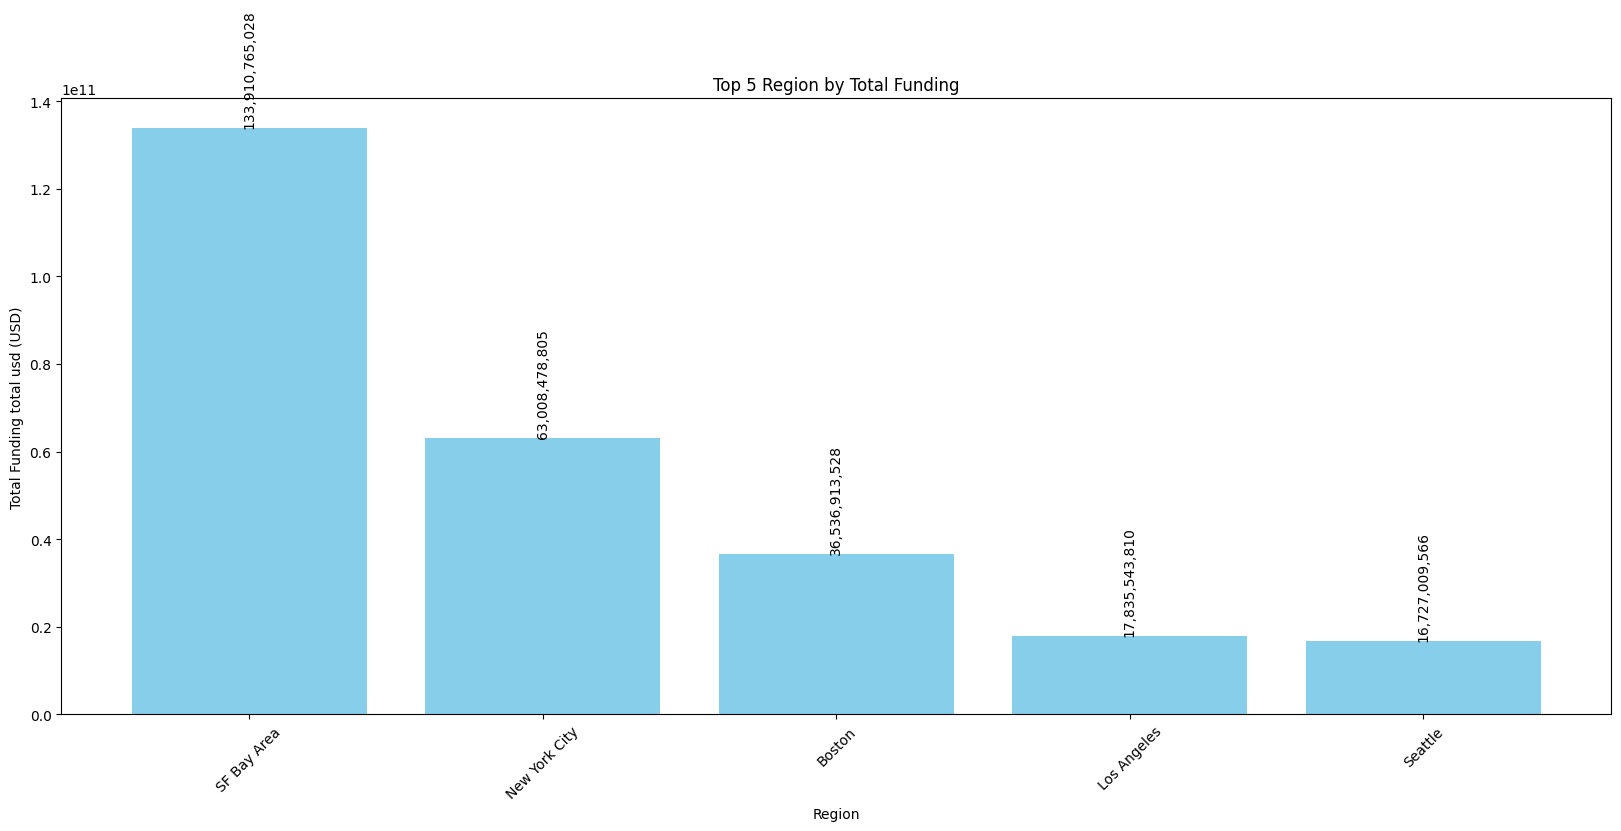

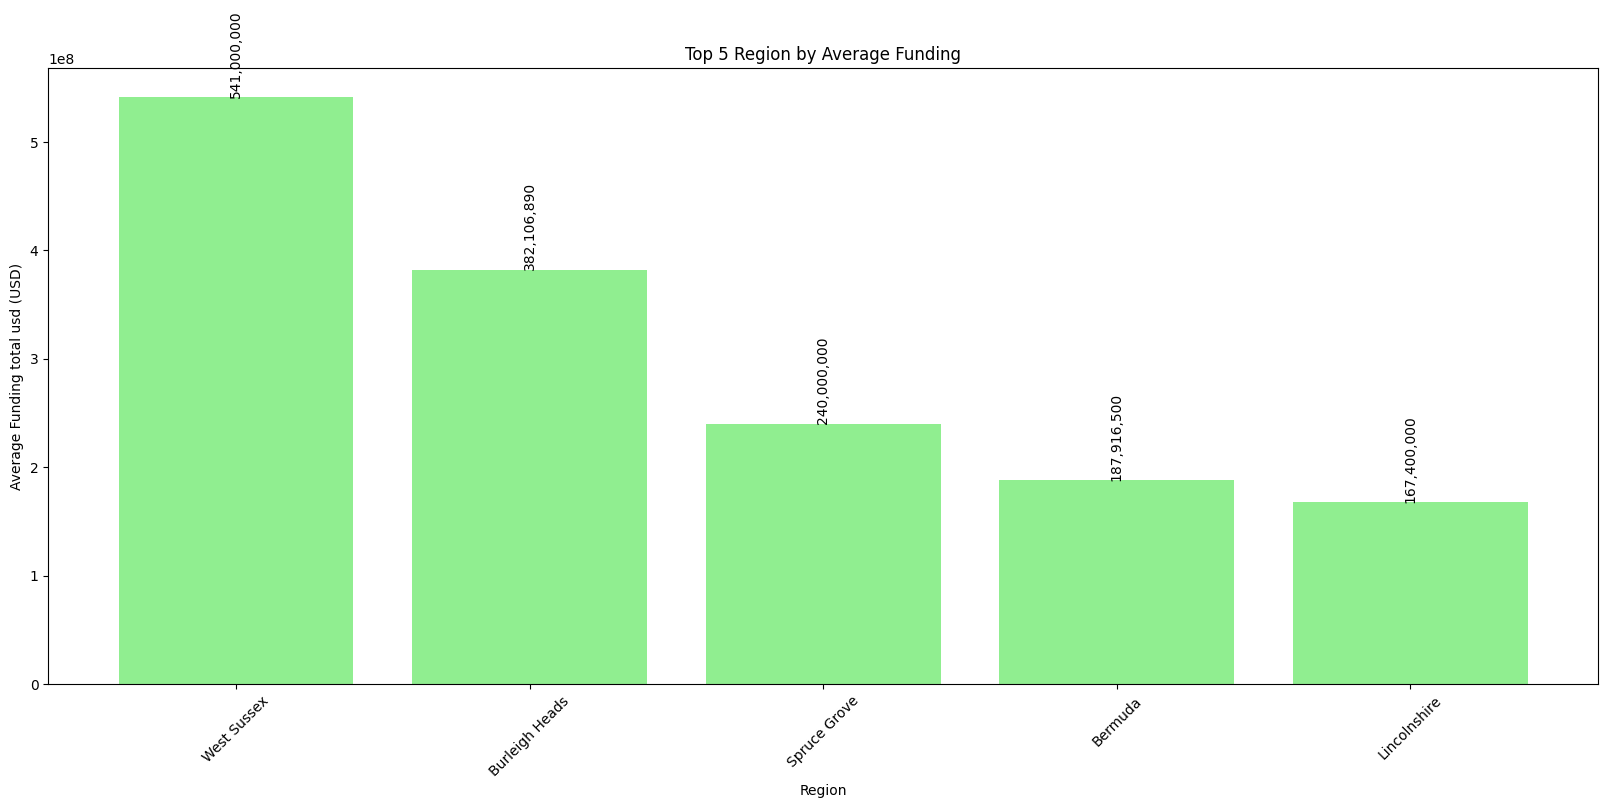

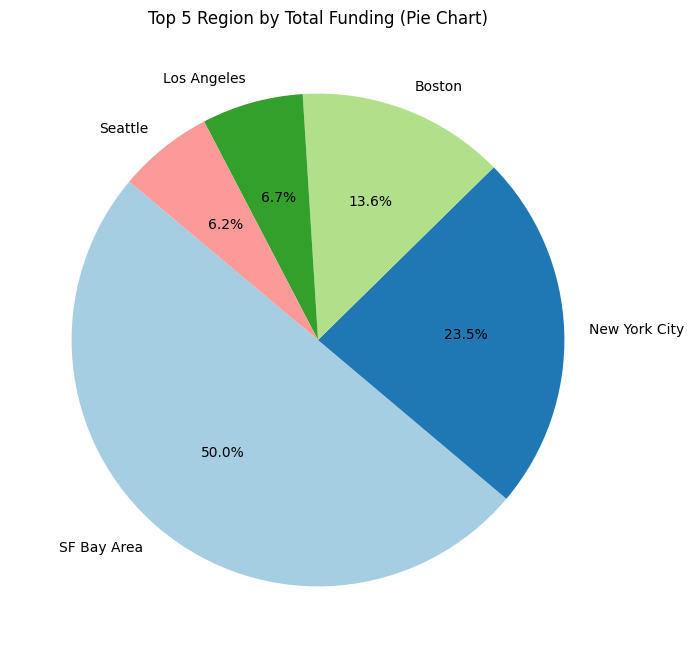

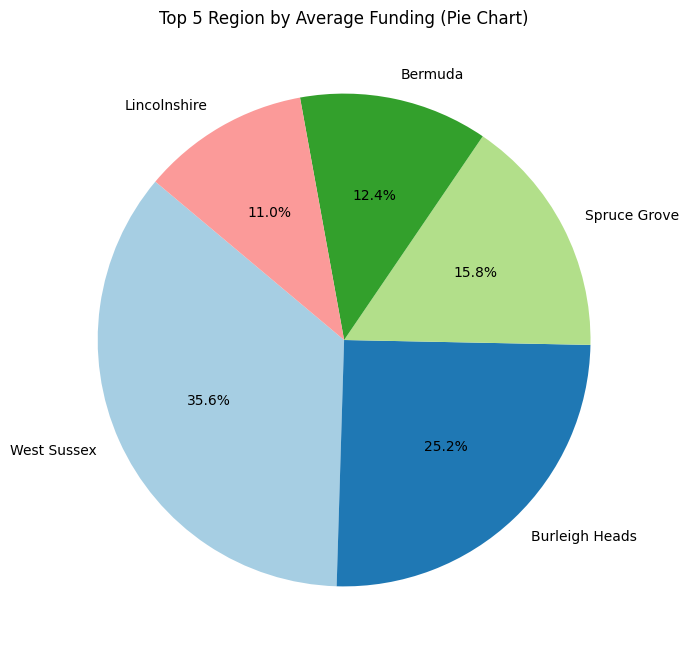

In [39]:
plot_funding_distribution(df, group_by_column='region')

### Recommendations:

1. **Focus on Top Regions**: Given the high funding levels in the SF Bay Area and New York City, it might be prudent to prioritize investments in these regions. However, consider the specific sub-sectors within these regions to identify areas with even greater potential.

2. **Diversification**: While focusing on the top regions is sensible, diversification across different regions can help mitigate risk. Consider allocating a portion of the investment budget to promising regions like Boston, Los Angeles, Seattle, and London.

3. **Emerging Regions**: Keep an eye on emerging regions that may not be among the top 10 currently but show strong growth potential. For instance, regions like Austin, Toronto, and Tel Aviv could be worth exploring.

4. **Due Diligence**: Before investing in any region, conduct thorough due diligence to assess the potential risks and rewards. Consider factors like the region's economic stability, regulatory environment, intellectual property protection, and the ease of doing business.

5. **Local Partnerships**: Consider partnering with local accelerators, incubators, or venture capital firms to gain access to deal flow and local expertise.

### Total Funding country wise

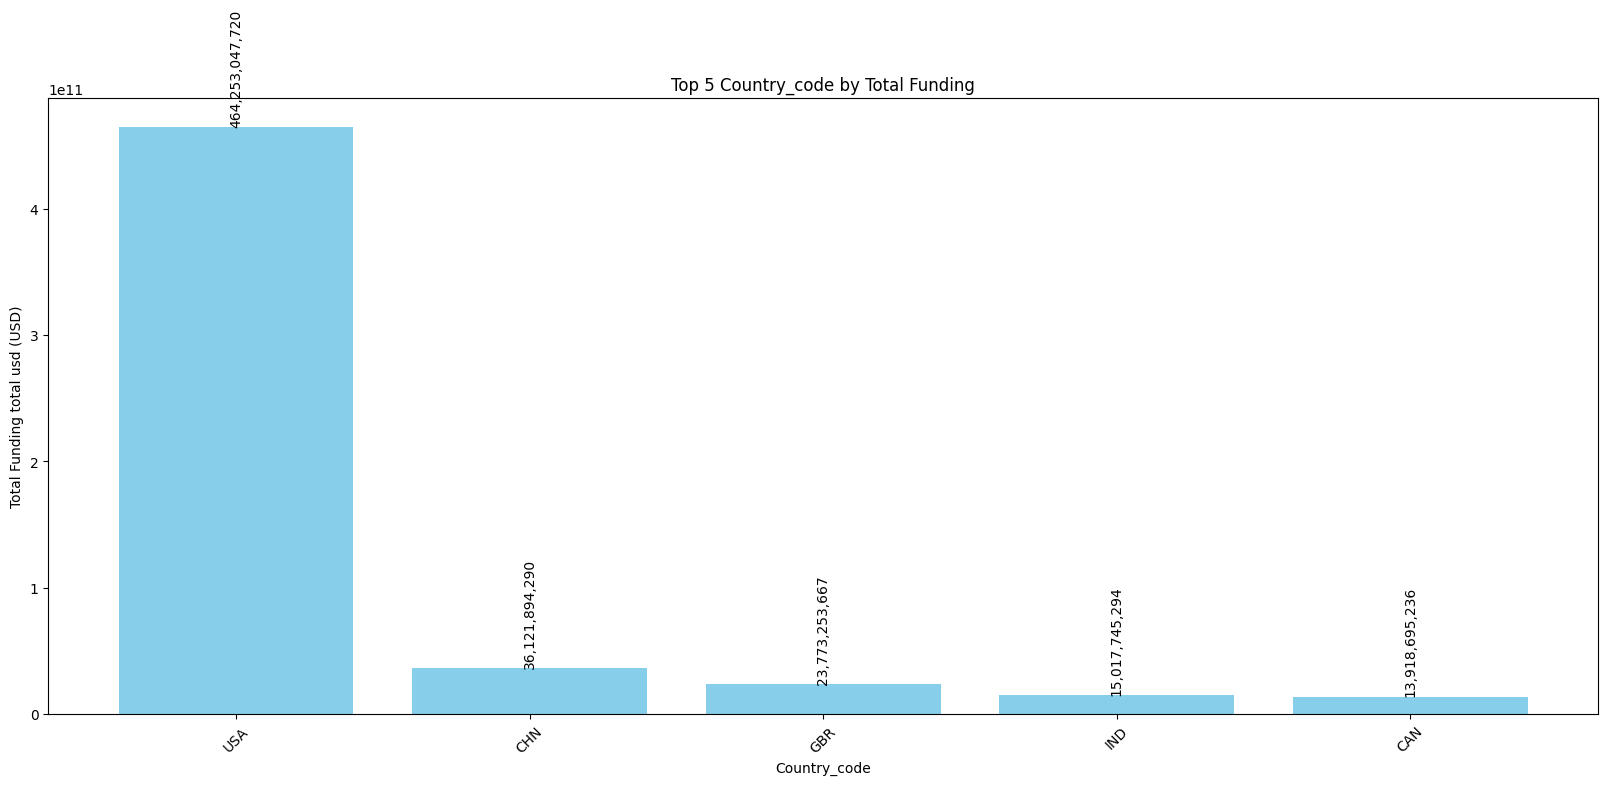

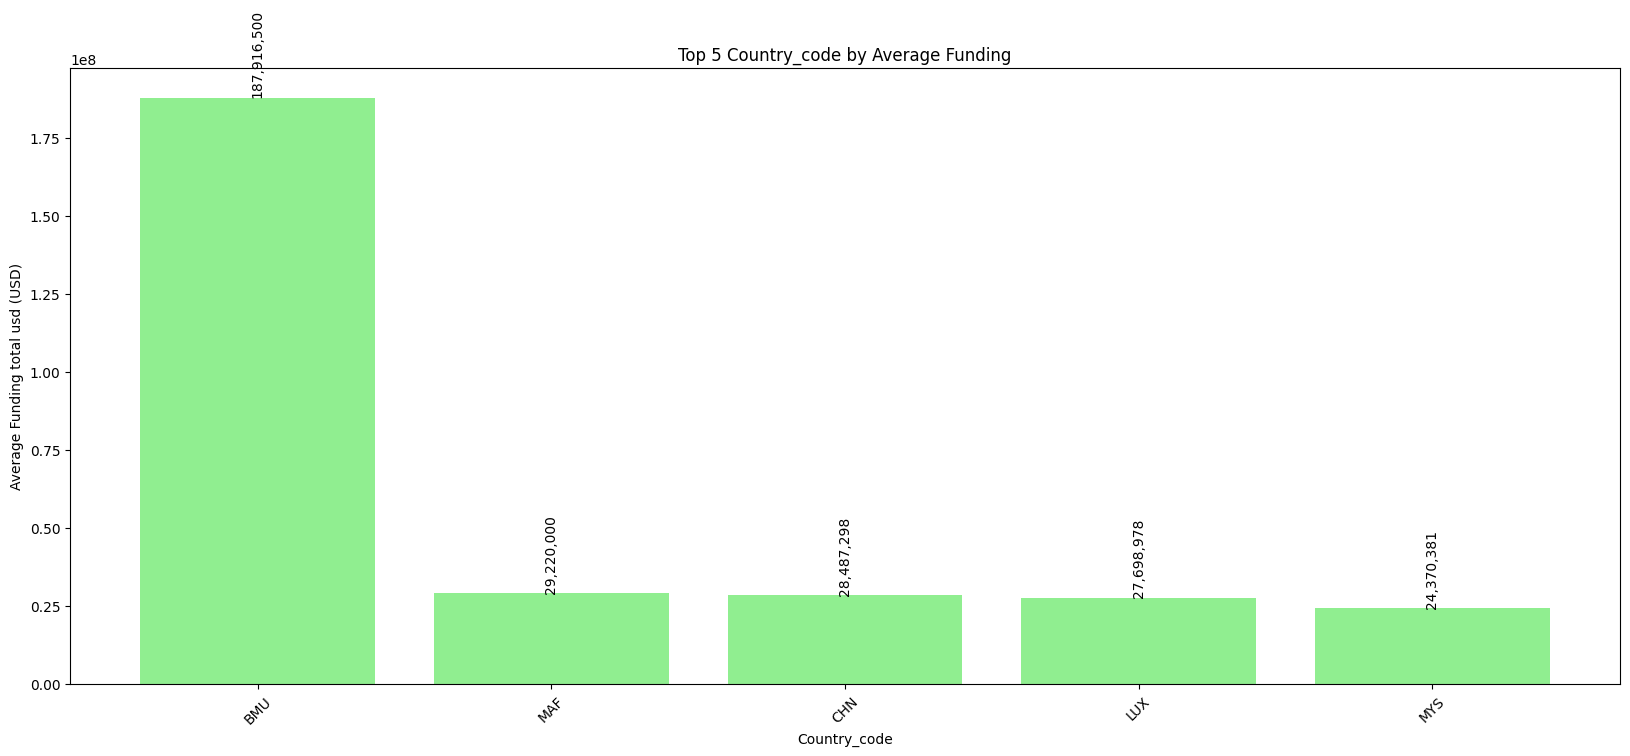

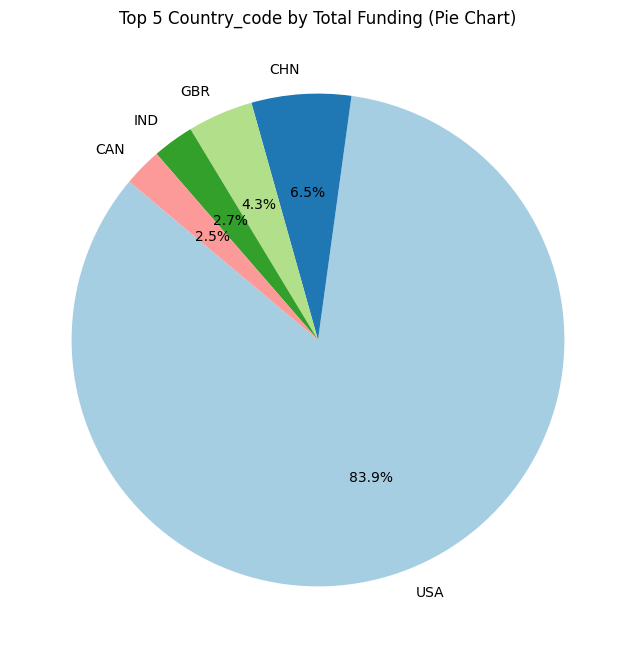

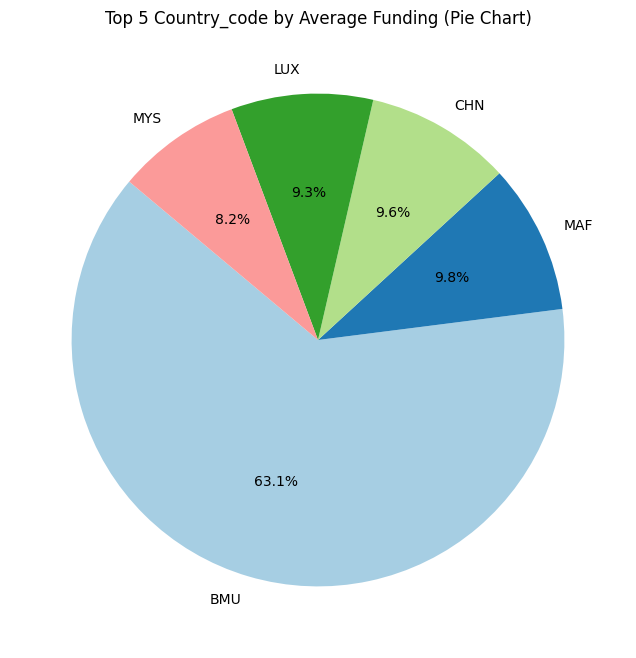

In [40]:
plot_funding_distribution(df, group_by_column='country_code')

## Recommendations for Maximum and Average Funding by Country

| **Criteria**           | **Recommendations for Maximum Funding**                                                                                     | **Recommendations for Average Funding**                                                                                     |
|-------------------------|-----------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| **Focus Areas**         | Prioritize high funding countries like USA, China, and the UK.                                                             | Target regions with high average funding such as Lyngby and Burleigh Heads.                                                |
| **Diversification**     | Allocate investments to emerging markets like India, Canada, Israel, and Germany for balanced growth.                      | Diversify investments across regions with high growth potential to spread risk effectively.                                 |
| **Emerging Markets**    | Explore countries like Brazil, Australia, and South Korea for their promising growth trajectories.                         | Consider emerging regions with high funding per company for additional opportunities.                                       |
| **Due Diligence**       | Evaluate factors such as economic stability, regulatory environment, and intellectual property protections.                | Assess local market dynamics, talent availability, and resources to gauge investment potential.                             |
| **Local Partnerships**  | Collaborate with local experts or investors to overcome cultural and language barriers in foreign investments.              | Partner with local accelerators, incubators, and VC firms to gain insights into the startup ecosystem.                      |
| **Investment Horizon**  | Focus on long-term growth opportunities, allowing investments time to mature and deliver substantial returns.               | Adopt a long-term perspective while focusing on sustained growth potential in high average funding regions.                 |
| **Risk Management**     | Mitigate risks by carefully assessing market stability and regulatory factors before entering new countries.                | Evaluate risks like market volatility, competitive landscape, and geopolitical uncertainties to make informed decisions.     |


### Average funding market wise

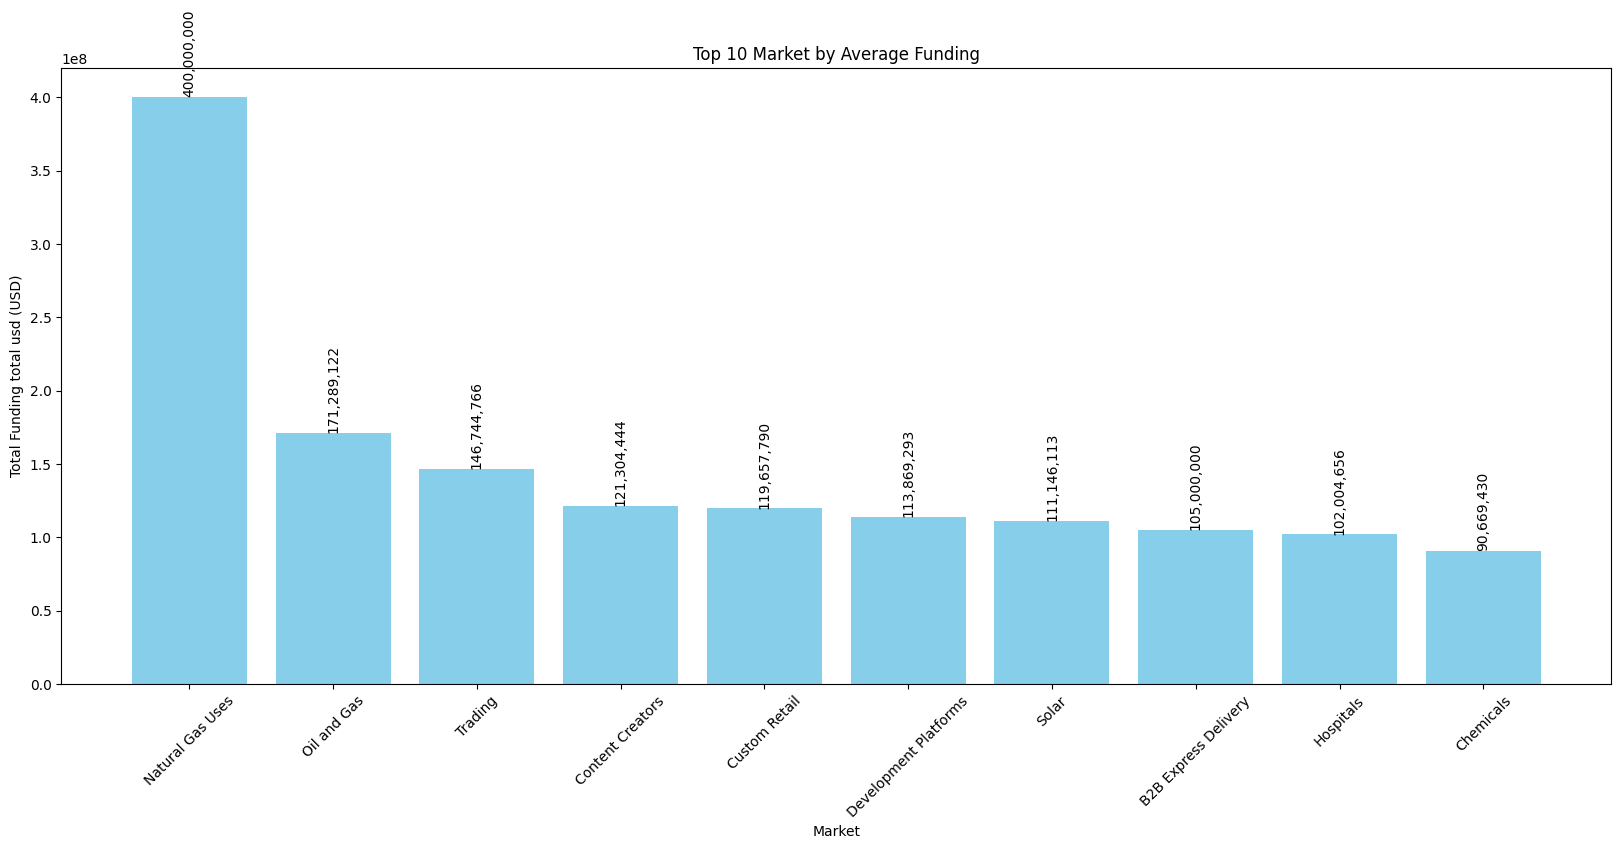

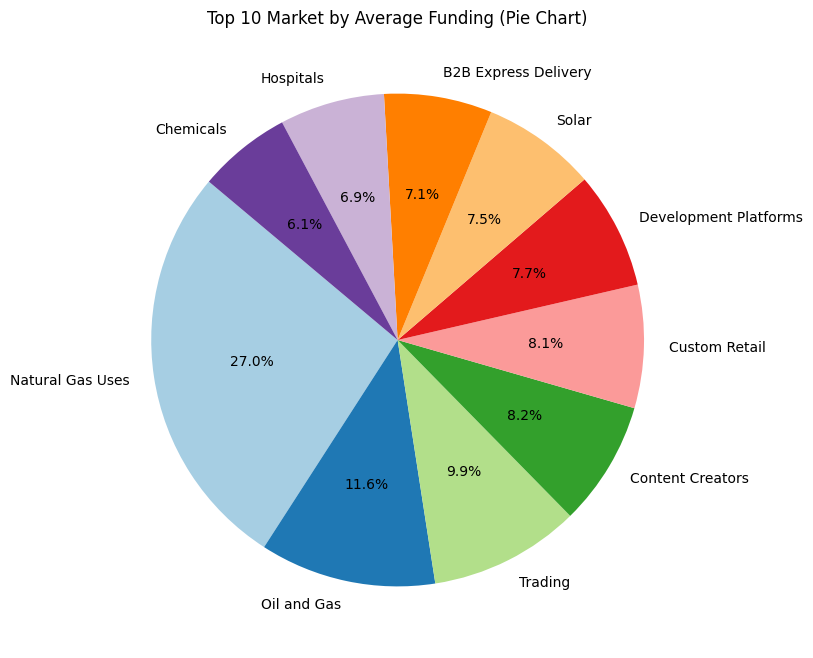

In [42]:
def plot_avg_funding_distribution(df, group_by_column, funding_column='funding_total_usd', top_n=10):
    
    """
    Plots the funding distribution for a specified column using bar and pie charts.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - group_by_column (str): The column name to group by (e.g., 'market', 'city').
    - funding_column (str): The column containing funding amounts (default is 'funding_total_usd').
    - top_n (int): The number of top categories to display (default is 10).
    """
    #not counting unknown or null values
    non_null_df = df[df[group_by_column]!="Unknown"]

    # Group by the specified column and calculate the sum of funding, then sort and get the top N
    top_avg_funding = non_null_df.groupby(group_by_column)[funding_column].mean().sort_values(ascending=False).head(top_n)
    
    # Bar Chart
    plt.figure(figsize=(20, 8))
    bars = plt.bar(top_avg_funding.index, top_avg_funding.values, color='skyblue')
    plt.xlabel(group_by_column.capitalize())
    plt.ylabel(f'Total {funding_column.replace("_", " ").capitalize()} (USD)')
    plt.title(f'Top {top_n} {group_by_column.capitalize()} by Average Funding')
    plt.xticks(rotation=45)
    
    # Display the values vertically on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.0f}', 
                 ha='center', va='bottom', fontsize=10, rotation=90)

    plt.show()
    
    # Pie Chart
    plt.figure(figsize=(20, 8))
    plt.pie(top_avg_funding.values, labels=top_avg_funding.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f'Top {top_n} {group_by_column.capitalize()} by Average Funding (Pie Chart)')
    plt.show()

# Example usage
plot_avg_funding_distribution(df, group_by_column='market')

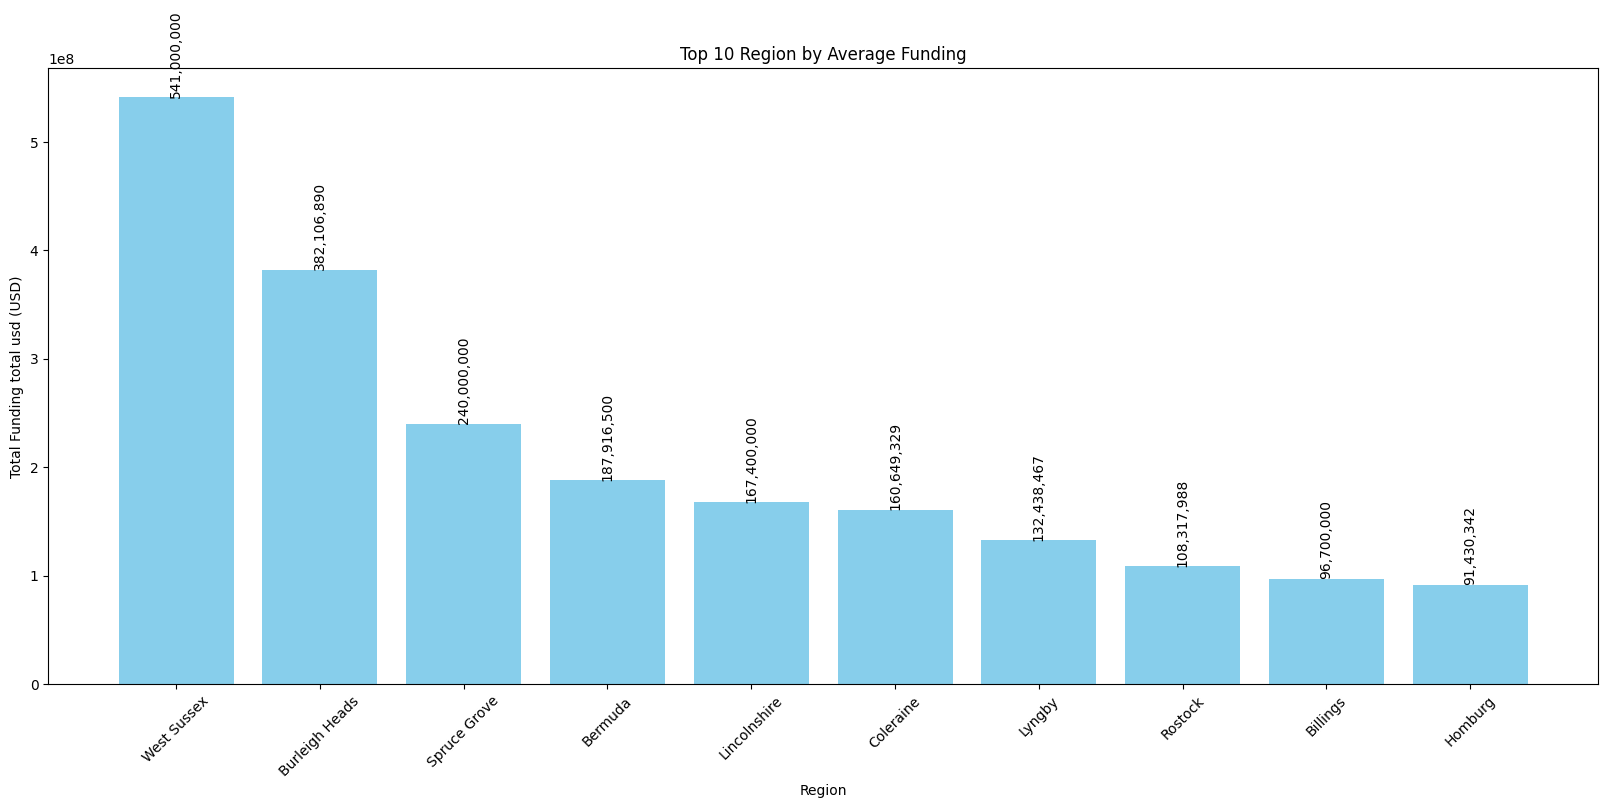

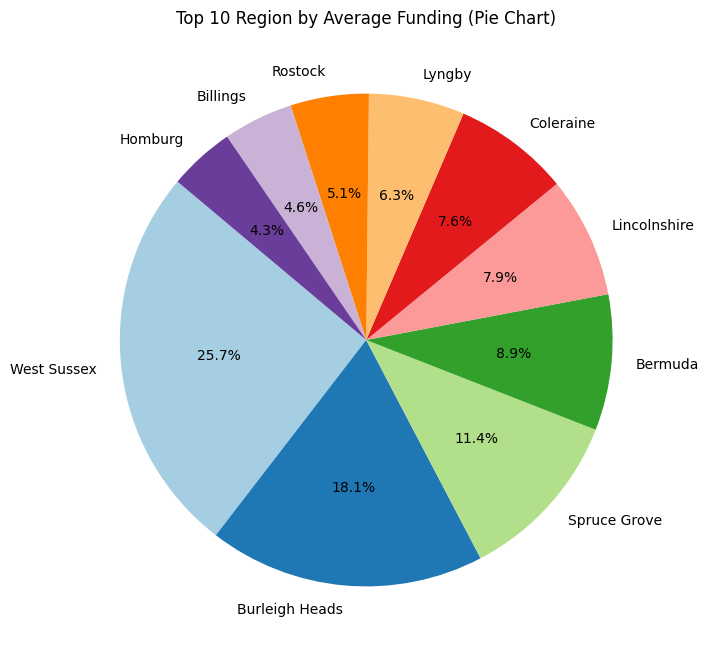

In [43]:
plot_avg_funding_distribution(df, group_by_column='region')

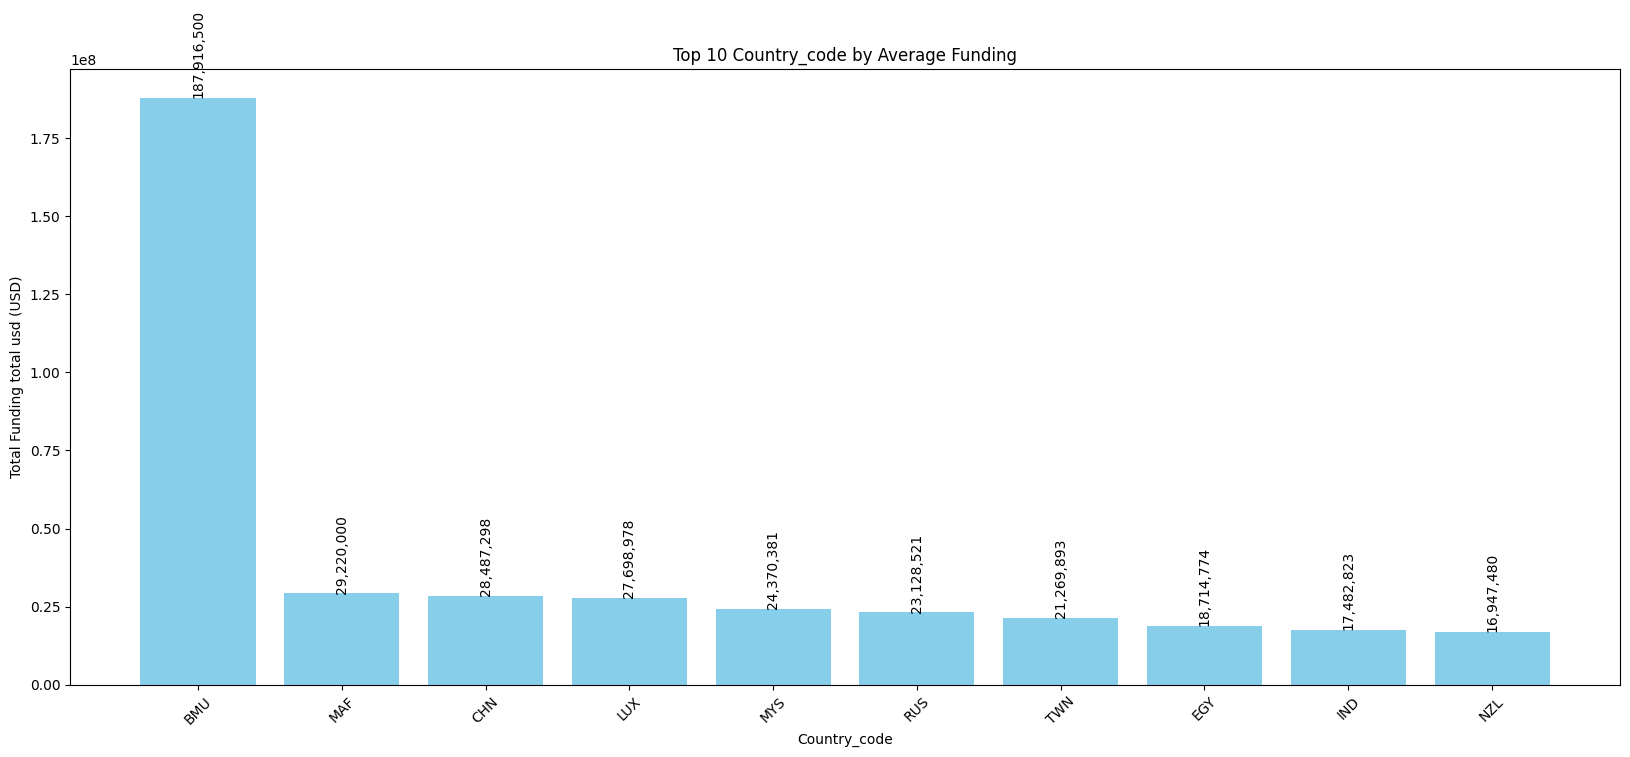

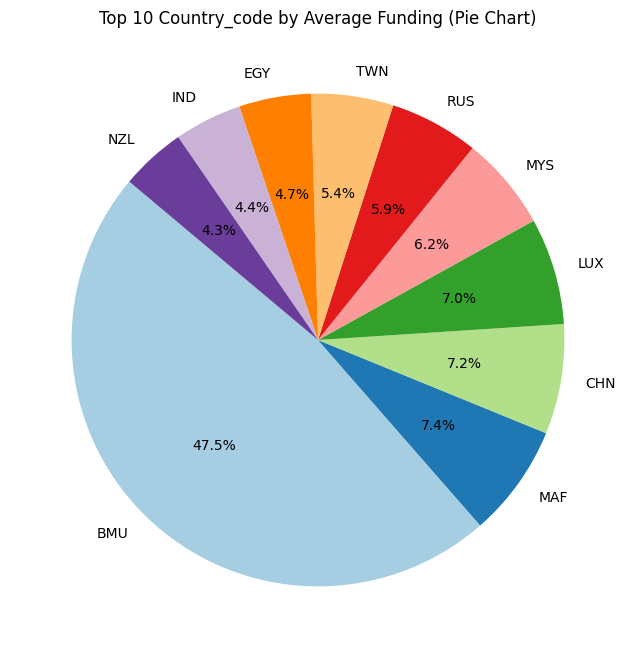

In [44]:
plot_avg_funding_distribution(df, group_by_column='country_code')

## Recommendations for Average Funding by Top Countries

| **Criteria**           | **Top Regions Recommendations**                                                                                              | **Top Countries Recommendations**                                                                                           |
|-------------------------|------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| **Focus Areas**         | Prioritize high average funding sectors like "Natural Gas Uses," "Oil and Gas," and "Trading."                              | Focus on countries like BRN, CHN, and MYS, which have significantly higher average funding levels.                          |
| **Diversification**     | Allocate investments to emerging markets such as "Content Creators," "Custom Retail," "Development Platforms," and "Solar." | Diversify across emerging countries with high growth potential to spread risks effectively.                                 |
| **Emerging Markets**    | Explore sectors like "B2B Express Delivery," "Hospitals," and "Chemicals" for their promising growth trajectories.           | Look at emerging countries outside the top performers for new opportunities with strong potential.                          |
| **Due Diligence**       | Evaluate market size, competitive dynamics, regulatory conditions, and management strength before investing.                 | Assess local market dynamics, regulatory environment, and access to talent and resources in each country.                   |
| **Local Partnerships**  | Not explicitly mentioned but implied in due diligence.                                                                      | Partner with local accelerators, incubators, and venture capital firms to gain insights into the local ecosystem.           |
| **Investment Horizon**  | Focus on long-term returns, particularly in technology and innovation-driven sectors.                                        | Adopt a long-term investment perspective for sustainable growth and returns in top-performing and emerging countries.        |
| **Risk Management**     | Assess risks like regulatory hurdles and market competition in high average funding sectors.                                 | Evaluate risks such as market volatility, geopolitical issues, and economic uncertainties in each target country.           |


### Top 10 sectors/market by funding count  or No of funding rounds, relation with market/segments. 

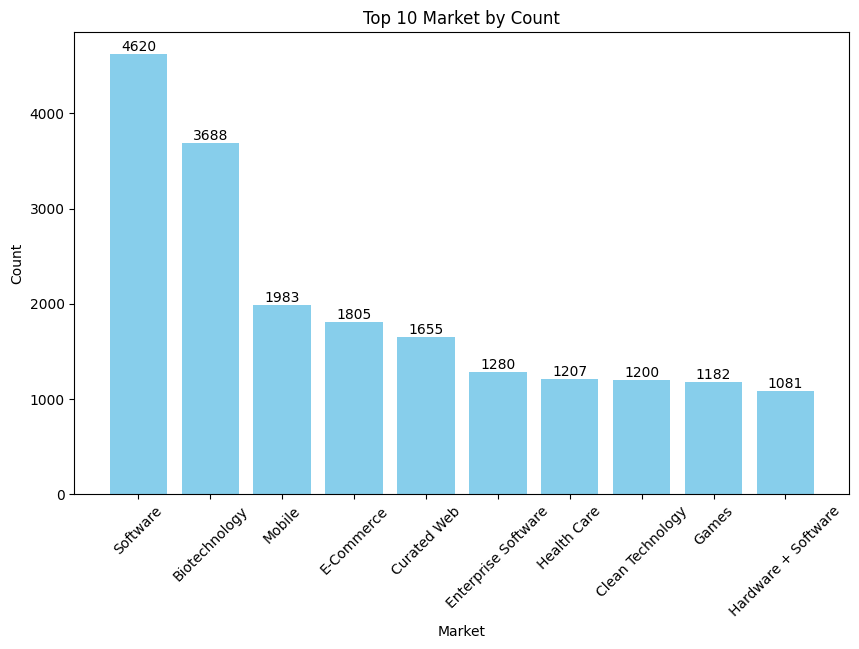

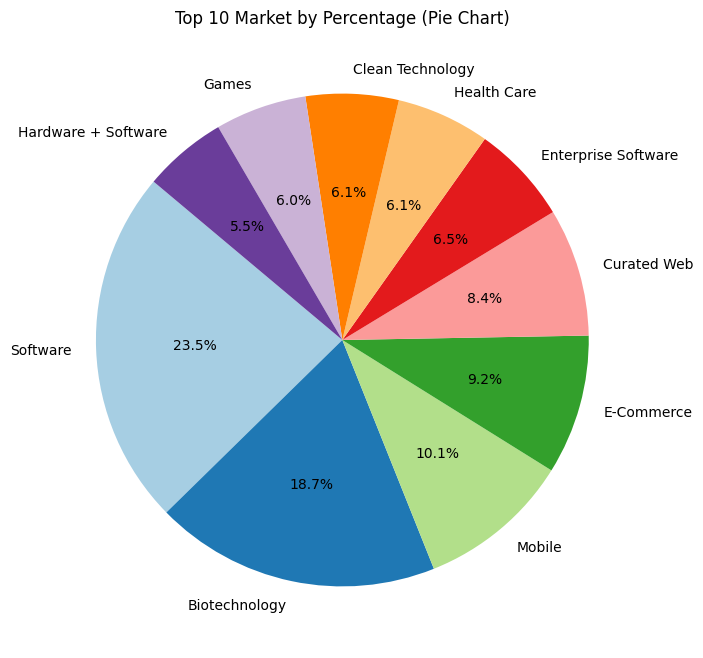

In [45]:
def plot_top_10_counts(df, column_name):
    """
    Plots a bar chart and a pie chart of the top 10 most frequent values in a specified column,
    displaying counts on the bar chart and percentages on the pie chart.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - column_name (str): The column name to analyze (e.g., 'market', 'city').
    """
    # Get the top 10 most frequent values in the specified column
    top_10 = df[df[column_name]!='Unknown'][column_name].value_counts().head(10)
    
    # Bar Chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_10.index, top_10.values, color='skyblue')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Count')
    plt.title(f'Top 10 {column_name.capitalize()} by Count')
    plt.xticks(rotation=45)
    
    # Display the count values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)

    plt.show()
    
    # Pie Chart
    plt.figure(figsize=(8, 8))
    plt.pie(top_10.values, labels=top_10.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f'Top 10 {column_name.capitalize()} by Percentage (Pie Chart)')
    plt.show()

# No of funding rounds in each market/segment.
plot_top_10_counts(df, column_name='market')

### Distribution of top 10 count taking in account current status of the company (operating, acquiring and closed)

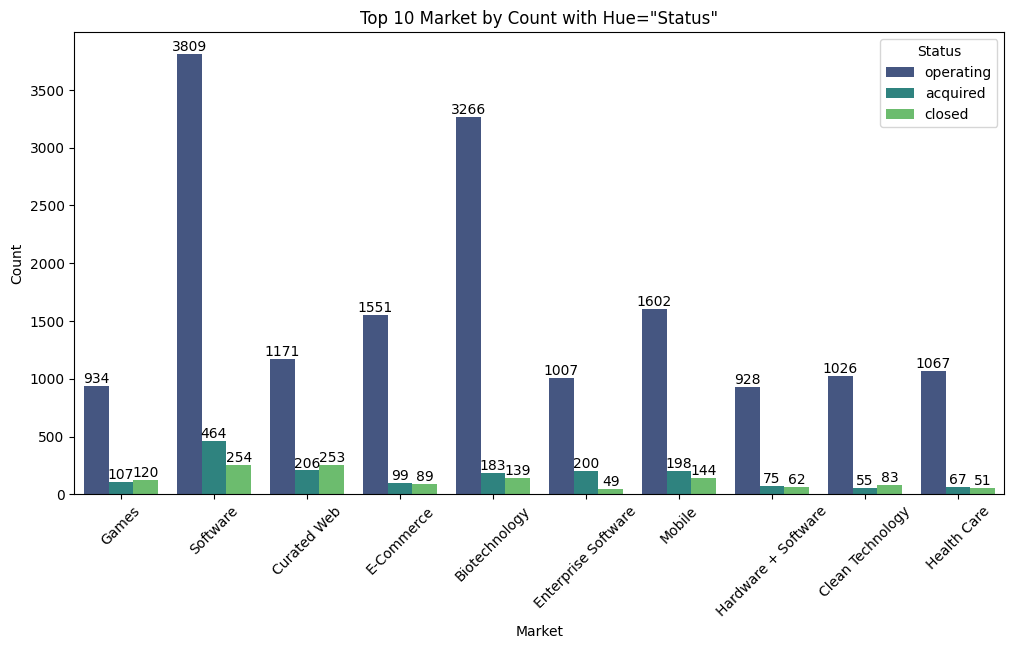

In [46]:
def plot_top_10_counts_with_hue(df, column_name, hue_column='status'):
    """
    Plots a count plot of the top 10 most frequent values in a specified column, with a hue,
    displaying counts on the bars.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - column_name (str): The column name to analyze (e.g., 'market', 'city').
    - hue_column (str): The column name to use for hue (default is 'status').
    """
    # Get the top 10 most frequent values in the specified column excluding 'Unknown'
    top_10_values = df[df[column_name] != 'Unknown'][column_name].value_counts().head(10).index
    
    # Filter the DataFrame for rows with top 10 values in the specified column
    df_top_10 = df[df[column_name].isin(top_10_values) & (df[column_name] != 'Unknown')]

    # Count Plot with Hue
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(data=df_top_10, x=column_name, hue=hue_column, palette='viridis')
    plt.title(f'Top 10 {column_name.capitalize()} by Count with Hue="{hue_column.capitalize()}"')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Display the count values on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10)

    plt.legend(title=hue_column.capitalize())
    plt.show()

# Example usage
plot_top_10_counts_with_hue(df, column_name='market', hue_column='status')

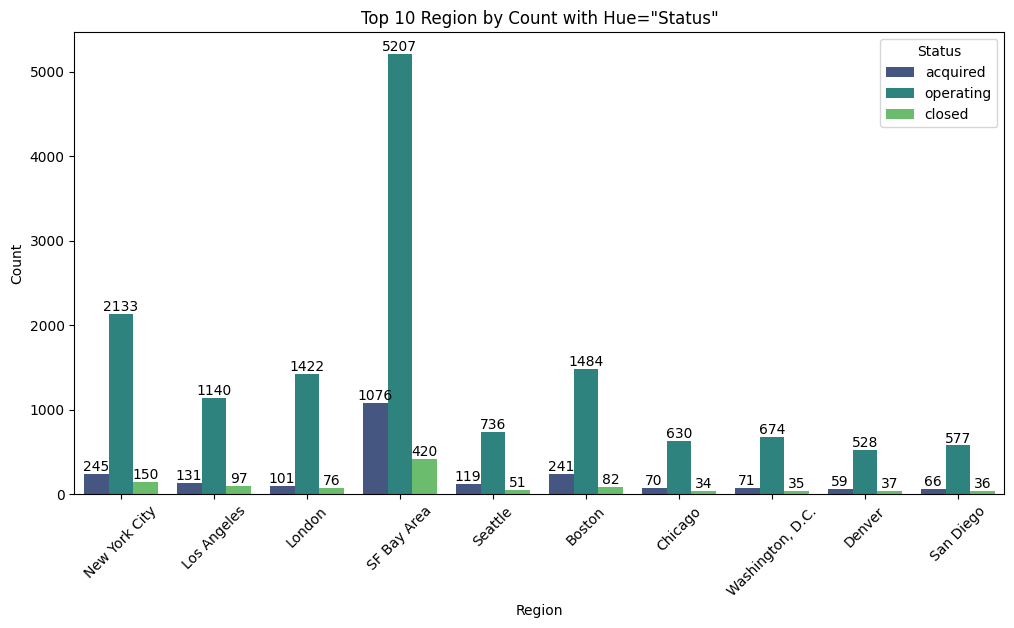

In [47]:
plot_top_10_counts_with_hue(df, column_name='region', hue_column='status')

## Recommendations for markets and regions 

| **Key Area**                 | **Top 10 Markets**                                  | **Top 10 Regions**                                    |
|------------------------------|-----------------------------------------------------|-------------------------------------------------------|
| **Investment Focus**          | Focus on high-activity markets like **Games**, **Software**, and **Curated Web**. Prioritize **operating** and **acquired** companies. | Focus on **NYC**, **SF Bay Area**. Prioritize **operating** companies and explore **acquired** ones for insights. |
| **Diversification**           | Diversify into **E-commerce**, **Biotech**, and **Mobile** markets. Focus on **operating companies** for growth. | Diversify across **London**, **LA**, **Seattle**, and **Boston**. Focus on **operating** regions for balanced risk. |
| **Emerging Opportunities**    | Explore **Hardware + Software**, **Clean Tech**, and **Health Care** for growth. Target **operating** companies. | Explore **Chicago**, **DC**, **Denver**, and **San Diego** for growth. Focus on **operating** companies in these regions. |
| **Due Diligence**             | Assess **market size**, **competition**, and **regulations**. Learn from **closed** companies. | Evaluate **economic stability** and **ease of business**. Learn from **closed** regions and **acquired** companies. |
| **Strategic Partnerships**    | Partner with **top-performing companies** in growth markets. | Partner with **local VCs** and **accelerators** in top regions. Focus on **operating companies** for scalability. |
| **Long-term Strategy**        | Invest for **long-term growth** in high-potential markets. | Focus on **sustained growth** in mature regions and **operating companies**. |


### Various funding round count 

In [48]:
funding_columns = ['seed', 'venture', 'equity_crowdfunding',
                   'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
                   'private_equity', 'post_ipo_equity', 'post_ipo_debt',
                   'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
                   'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

for col in funding_columns:
    # Count non-zero values in the column
    non_zero_count = (df[col] > 0).sum()
    if non_zero_count > 0:
        print(f"{col} : {non_zero_count}")

seed : 13840
venture : 23277
equity_crowdfunding : 522
undisclosed : 952
convertible_note : 557
debt_financing : 4225
angel : 3129
grant : 1142
private_equity : 1373
post_ipo_equity : 316
post_ipo_debt : 75
secondary_market : 19
product_crowdfunding : 213
round_A : 9003
round_B : 5447
round_C : 2837
round_D : 1288
round_E : 516
round_F : 172
round_G : 34
round_H : 4


### Analyzing top 10 no of funding rounds in each market

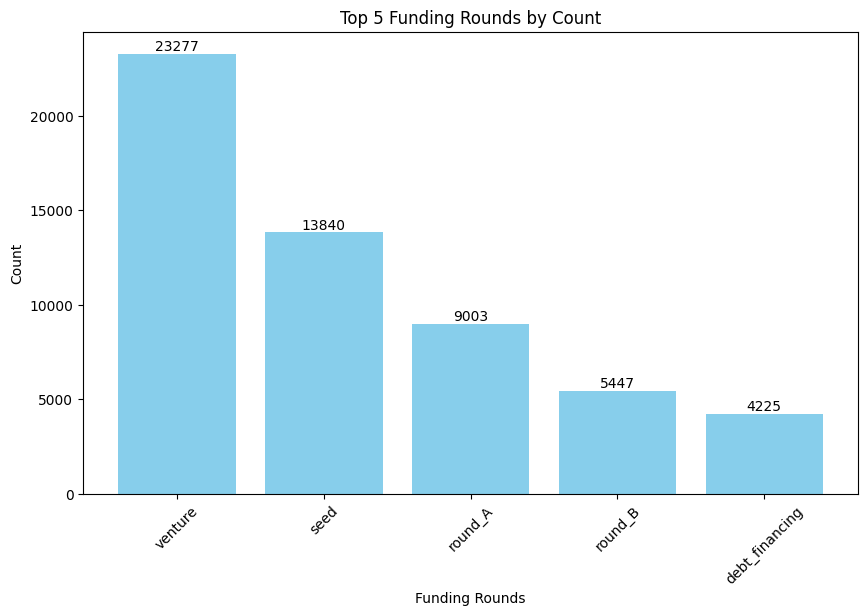

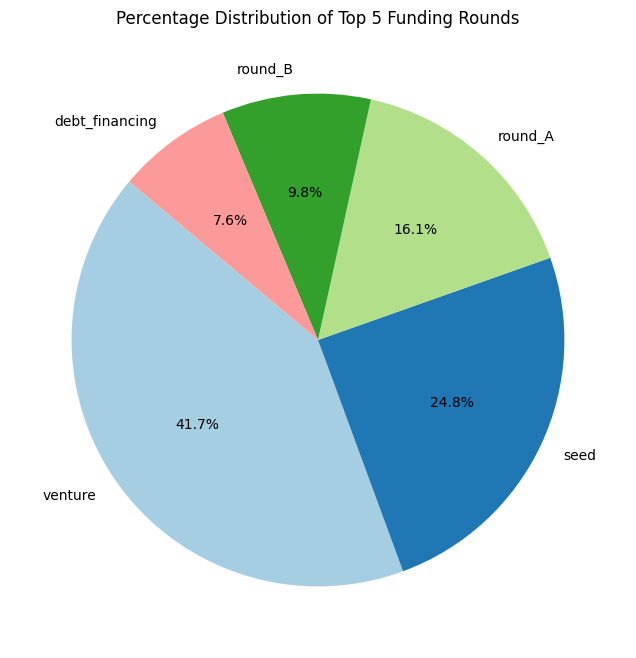

In [49]:
def analyze_top_funding_rounds(df, funding_columns, top_n=10):
    """
    Analyzes the top funding rounds by count and plots a bar chart with values and a pie chart with percentages.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - funding_columns (list): List of columns representing different funding rounds.
    - top_n (int): Number of top funding rounds to display (default is 10).
    
    Returns:
    - top_funding_rounds (dict): Dictionary of top funding rounds with counts.
    """
    # Dictionary to store counts of non-zero entries for each funding column
    funding_counts = {}

    for col in funding_columns:
        # Count the number of non-zero values in the column
        non_zero_count = (df[col] > 0).sum()
        funding_counts[col] = non_zero_count

    # Sort funding rounds by count in descending order and select the top N
    top_funding_rounds = dict(sorted(funding_counts.items(), key=lambda item: item[1], reverse=True)[:top_n])

    # Bar Chart with Values
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_funding_rounds.keys(), top_funding_rounds.values(), color='skyblue')
    plt.xlabel('Funding Rounds')
    plt.ylabel('Count')
    plt.title(f'Top {top_n} Funding Rounds by Count')
    plt.xticks(rotation=45)

    # Display count values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)

    plt.show()

    # Pie Chart with Percentages
    plt.figure(figsize=(8, 8))
    plt.pie(top_funding_rounds.values(), labels=top_funding_rounds.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f'Percentage Distribution of Top {top_n} Funding Rounds')
    plt.show()

    return top_funding_rounds

# Example usage
funding_columns = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 
                   'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 
                   'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 
                   'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']


top_funding_rounds = analyze_top_funding_rounds(df, funding_columns, top_n=5)

## Recommendations for various funding rounds: 

1. **Diversify Investments**: Balance early-stage and later-stage deals.
2. **Focus on High-Growth Sectors**: Invest in emerging sectors with strong potential.
3. **Conduct Thorough Due Diligence**: Evaluate each deal based on team, business model, market, and financials.
4. **Build Strong Relationships**: Network with entrepreneurs and industry experts.
5. **Long-Term Perspective**: Prioritize sustainable growth and returns.
6. **Manage Risk**: Diversify portfolio and assess risk for each investment.
7. **Consider Alternative Funding**: Explore debt financing and grants for specific needs.

### Analyzing which funding types are most common, in top sectors/market.

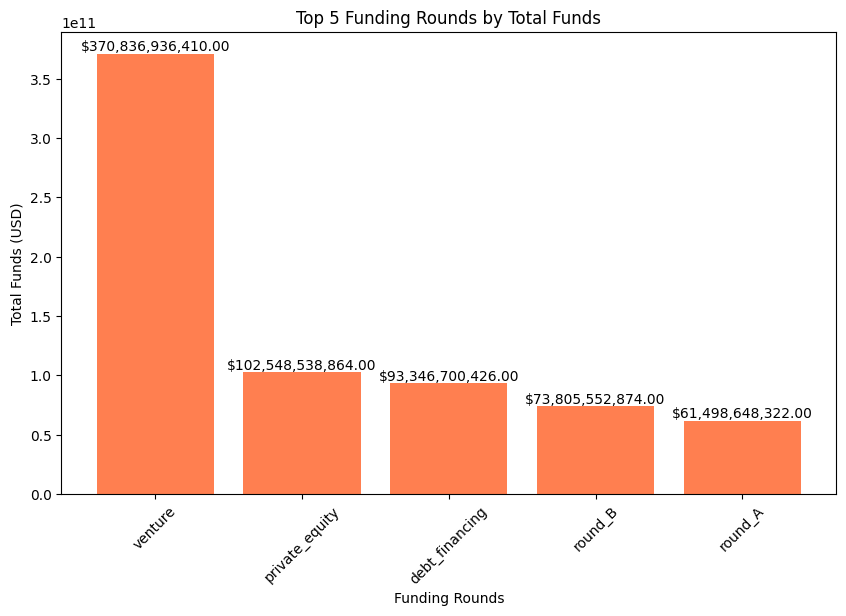

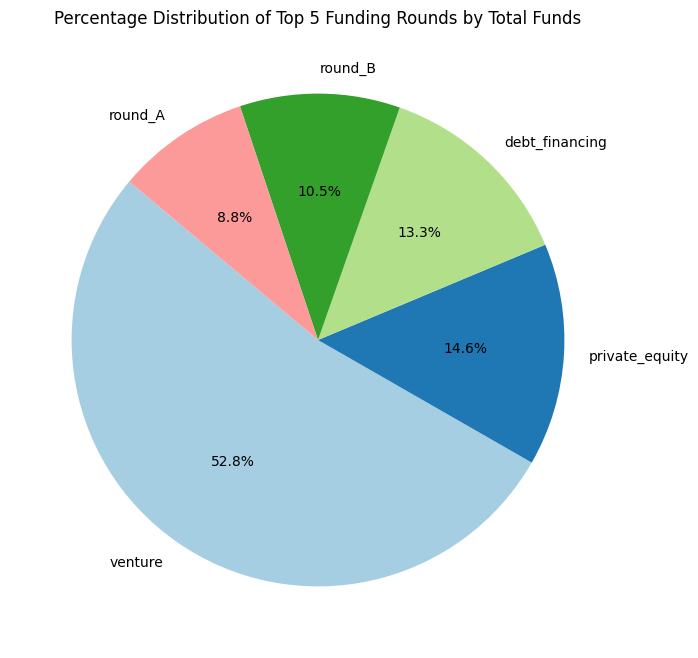

In [50]:
def analyze_top_funding_rounds_by_funds(df, funding_columns, top_n=5):
    """
    Analyzes the top funding rounds by total funds received and plots a bar chart with values and a pie chart with percentages.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - funding_columns (list): List of columns representing different funding rounds.
    - top_n (int): Number of top funding rounds to display (default is 5).
    
    Returns:
    - top_funding_rounds (dict): Dictionary of top funding rounds with total funds.
    """
    # Dictionary to store total funds for each funding column
    funding_totals = {}

    for col in funding_columns:
        # Calculate the total funds for each funding round
        total_funds = df[col].sum()
        funding_totals[col] = total_funds

    # Sort funding rounds by total funds in descending order and select the top N
    top_funding_rounds = dict(sorted(funding_totals.items(), key=lambda item: item[1], reverse=True)[:top_n])

    # Bar Chart with Total Funds
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_funding_rounds.keys(), top_funding_rounds.values(), color='coral')
    plt.xlabel('Funding Rounds')
    plt.ylabel('Total Funds (USD)')
    plt.title(f'Top {top_n} Funding Rounds by Total Funds')
    plt.xticks(rotation=45)

    # Display total funds values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f"${yval:,.2f}", ha='center', va='bottom', fontsize=10)

    plt.show()

    # Pie Chart with Percentages
    plt.figure(figsize=(8, 8))
    plt.pie(top_funding_rounds.values(), labels=top_funding_rounds.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f'Percentage Distribution of Top {top_n} Funding Rounds by Total Funds')
    plt.show()

    return top_funding_rounds

# Example usage
funding_columns = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 
                   'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 
                   'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 
                   'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

top_funding_rounds_by_funds = analyze_top_funding_rounds_by_funds(df, funding_columns, top_n=5)


### Which funding types are most common, in certain sectors. 


Top Sectors and Their Most Common Funding Type:
                  market most_common_funding  highest_funding_amount
59         Biotechnology             venture            5.019104e+10
425               Mobile      debt_financing            3.120950e+10
636             Software             venture            2.913889e+10
94      Clean Technology             venture            1.944058e+10
305          Health Care             venture            1.821725e+10
199           E-Commerce             venture            1.517819e+10
233  Enterprise Software             venture            1.375703e+10
7            Advertising             venture            1.052964e+10
594       Semiconductors             venture            1.010452e+10
304  Hardware + Software             venture            8.407020e+09


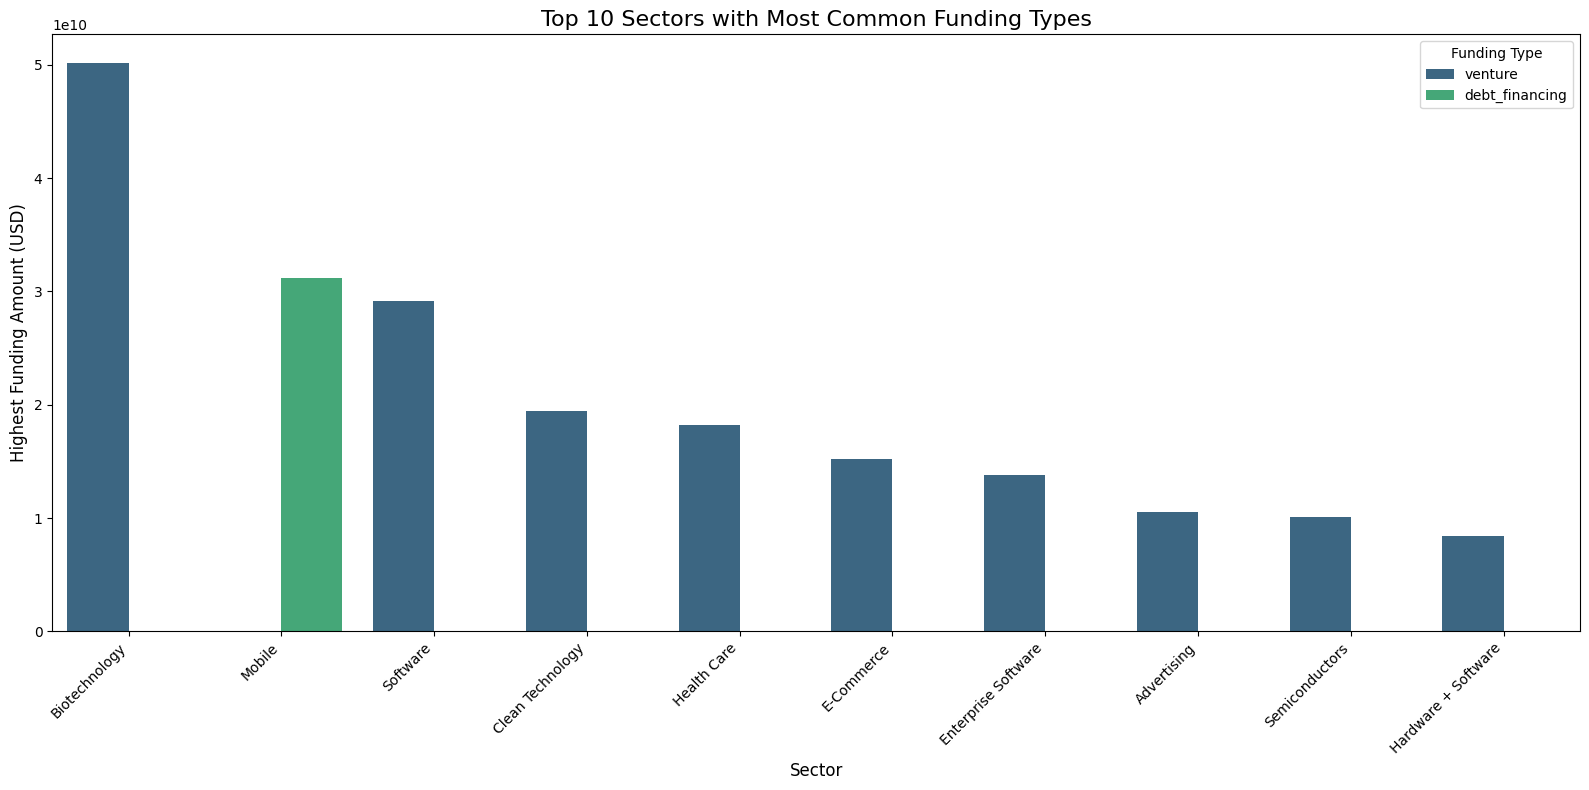

In [51]:
# Filter relevant columns for funding types and categories
funding_cols = [
    'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
    'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
    'post_ipo_debt', 'secondary_market', 'product_crowdfunding'
]
relevant_data = df[['market'] + funding_cols].copy()

# Fill missing values in funding columns with 0 (assuming no funding means 0)
relevant_data[funding_cols] = relevant_data[funding_cols].fillna(0)

# Group by category_list and calculate the total funding for each type
funding_by_sector = relevant_data.groupby('market')[funding_cols].sum()

# Find the most common funding type for each sector
funding_by_sector['most_common_funding'] = funding_by_sector.idxmax(axis=1)
funding_by_sector['highest_funding_amount'] = funding_by_sector.select_dtypes(include='number').max(axis=1)

# Reset index for visualization
funding_by_sector = funding_by_sector.reset_index()

# Display top sectors and their most common funding type
top_sectors = funding_by_sector.nlargest(10, 'highest_funding_amount')

print("Top Sectors and Their Most Common Funding Type:")
print(top_sectors[['market', 'most_common_funding', 'highest_funding_amount']])

# Visualize the results
def plot_top_funding_types(data, top_n=10):
    plt.figure(figsize=(16, 8))

    # Select top N sectors by highest funding amount
    top_data = data.nlargest(top_n, 'highest_funding_amount')

    sns.barplot(
        data=top_data,
        x='market',
        y='highest_funding_amount',
        hue='most_common_funding',
        palette='viridis'
    )
    plt.title(f"Top {top_n} Sectors with Most Common Funding Types", fontsize=16)
    plt.xlabel("Sector", fontsize=12)
    plt.ylabel("Highest Funding Amount (USD)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Funding Type", fontsize=10)
    plt.tight_layout()
    plt.show()

# Plot the results
plot_top_funding_types(funding_by_sector)

### Overall year on year growth

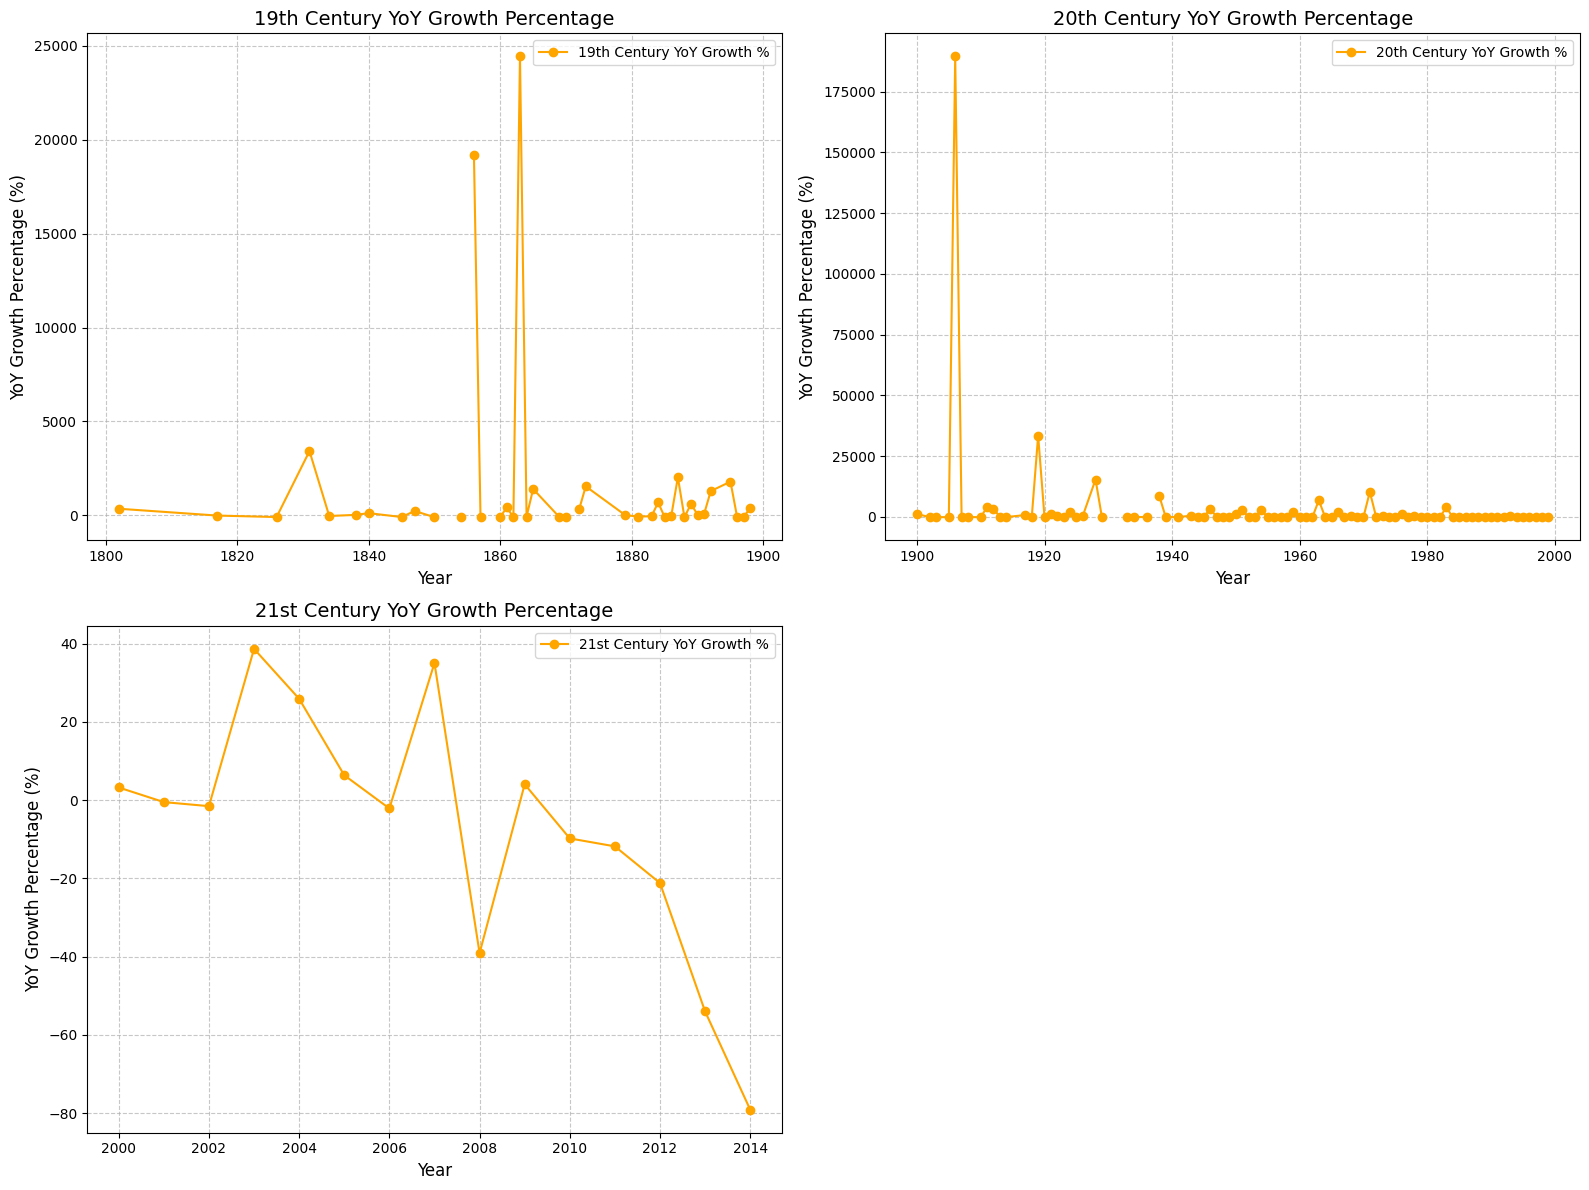

In [52]:
# Prepare the data
overall_yearly_funding = df.groupby('founded_year')['funding_total_usd'].sum().reset_index()
overall_yearly_funding = overall_yearly_funding.sort_values('founded_year')
overall_yearly_funding['YoY_Growth_%'] = overall_yearly_funding['funding_total_usd'].pct_change() * 100

# Split data into centuries
centuries = {
    '19th Century': overall_yearly_funding[(overall_yearly_funding['founded_year'] >= 1800) & (overall_yearly_funding['founded_year'] < 1900)],
    '20th Century': overall_yearly_funding[(overall_yearly_funding['founded_year'] >= 1900) & (overall_yearly_funding['founded_year'] < 2000)],
    '21st Century': overall_yearly_funding[(overall_yearly_funding['founded_year'] >= 2000)]
}

# Plot graphs for each century
plt.figure(figsize=(16, 12))
for i, (century, data) in enumerate(centuries.items(), 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of plots
    plt.plot(
        data['founded_year'],
        data['YoY_Growth_%'],
        marker='o',
        label=f'{century} YoY Growth %',
        color='orange'
    )
    plt.title(f'{century} YoY Growth Percentage', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('YoY Growth Percentage (%)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)

plt.tight_layout()
plt.show()


1. Timing:

- Crisis Recovery: Invest during recovery phases after significant downturns or crises when growth potential is higher.
- Avoid Peaks: Investing at peak growth years often leads to lower returns as markets tend to correct over time.

2. Sector Analysis:

- Prioritize sectors that align with historical growth patterns of the century. For example, in the 21st century, technology, AI, and renewable energy show promise compared to traditional industries.

3. Diversification:

- Spread investments across sectors and regions to hedge against potential declines in any one market.

4. Watch for Emerging Trends:

- Look for signals of transformative innovation or significant societal shifts. In historical context, these correspond to the industrial revolution (19th century), globalization (20th century), and the tech boom (21st century).

5. Short-Term vs. Long-Term:

- If focusing on short-term gains, monitor YoY spikes for timing opportunities. For long-term growth, focus on markets with steady or recovering trends.


     founded_year  funding_total_usd
0          1785.0       2.000000e+06
1          1802.0       9.000000e+06
2          1817.0       7.700000e+06
3          1826.0       5.400000e+05
4          1831.0       1.900000e+07
..            ...                ...
143        2010.0       2.839501e+10
144        2011.0       2.503891e+10
145        2012.0       1.973232e+10
146        2013.0       9.074411e+09
147        2014.0       1.893958e+09

[148 rows x 2 columns]


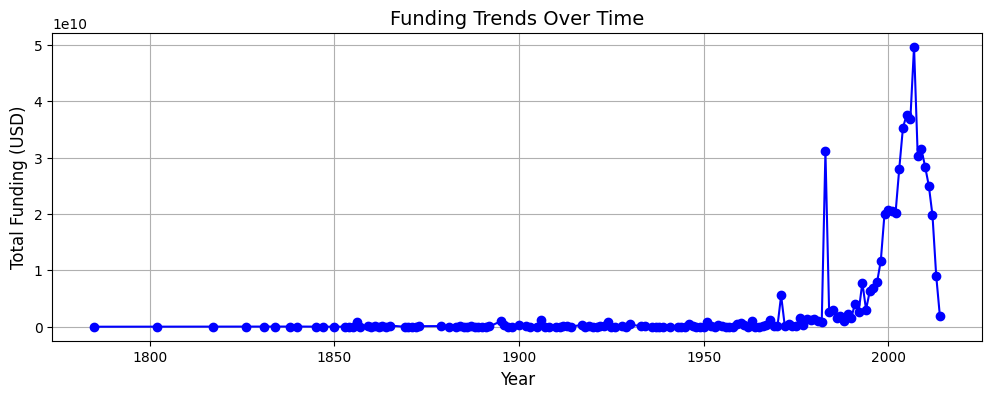

In [53]:
# Convert relevant date column to datetime if needed
df['founded_year'] = pd.to_datetime(df['founded_at']).dt.year

# Group by year and calculate total funding
funding_by_year = df.groupby('founded_year')['funding_total_usd'].sum().reset_index()

# Drop rows with missing years
funding_by_year = funding_by_year.dropna()

# Sort data by year
funding_by_year = funding_by_year.sort_values('founded_year')

print(funding_by_year)


# Line Chart for Funding Trends
plt.figure(figsize=(12,4))
plt.plot(funding_by_year['founded_year'], funding_by_year['funding_total_usd'], marker='o', color='blue')
plt.title('Funding Trends Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Funding (USD)', fontsize=12)
plt.grid(True)
plt.show()

### Growth of top market (year-over-year)

In [54]:
# Group the data by founded year and calculate the total funding for each year
yearly_funding = df.groupby(['founded_year', 'market'])['funding_total_usd'].sum().reset_index()

# Sort by founded year
yearly_funding = yearly_funding.sort_values('founded_year')

# Calculate Year-over-Year (YoY) growth percentage
yearly_funding['YoY_Growth_%'] = yearly_funding['funding_total_usd'].pct_change() * 100

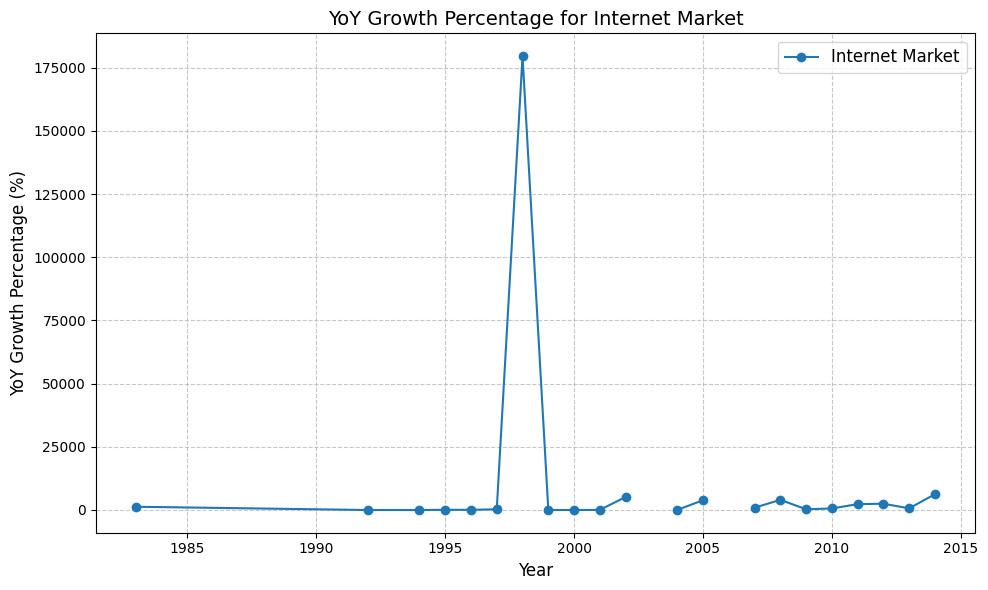

In [55]:
def plot_yoy_growth_percentage(df, market, year_col='founded_year', yoy_col='YoY_Growth_%'):
    """
    Plots the year-over-year (YoY) growth percentage for a specific market.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the YoY growth data.
    - market (str): The market to plot.
    - year_col (str): Column name representing the year (default is 'founded_year').
    - yoy_col (str): Column name representing the YoY growth percentage (default is 'YoY_Growth_%').
    """
    # Filter data for the specified market
    market_data = df[df['market'] == market]

    # Plot the line graph
    plt.figure(figsize=(10, 6))
    plt.plot(market_data[year_col], market_data[yoy_col], marker='o', label=f'{market} Market')

    # Customize the plot
    plt.title(f'YoY Growth Percentage for {market} Market', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('YoY Growth Percentage (%)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage
plot_yoy_growth_percentage(yearly_funding, market='Internet', year_col='founded_year', yoy_col='YoY_Growth_%')

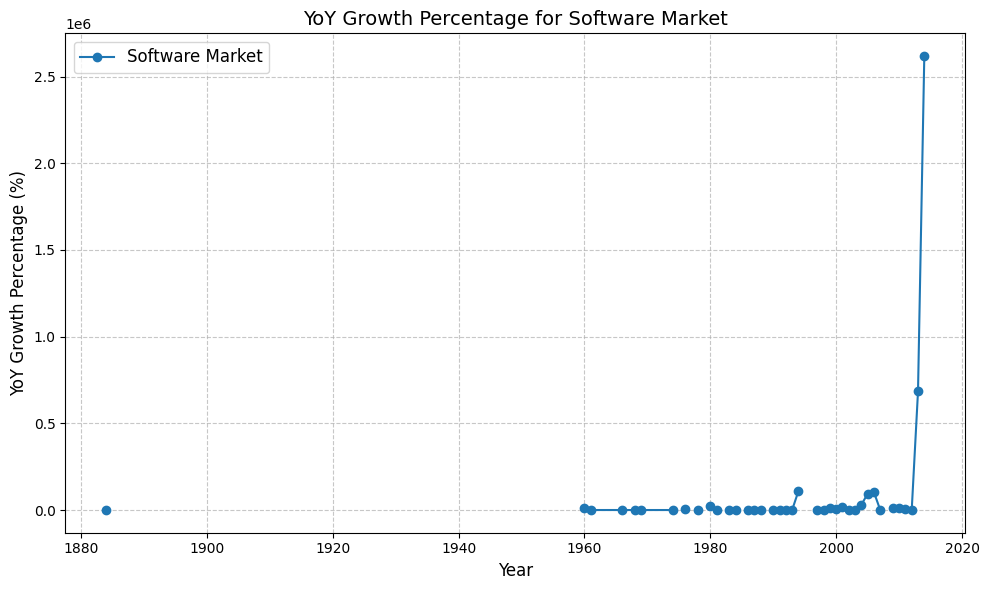

In [56]:
plot_yoy_growth_percentage(yearly_funding, market='Software', year_col='founded_year', yoy_col='YoY_Growth_%')


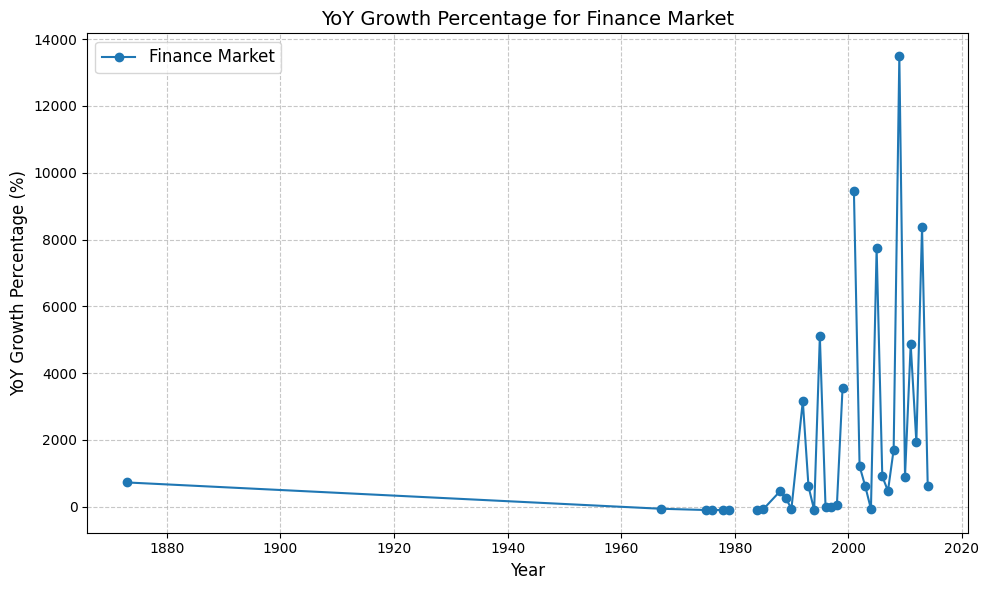

In [57]:
plot_yoy_growth_percentage(yearly_funding, market='Finance', year_col='founded_year', yoy_col='YoY_Growth_%')


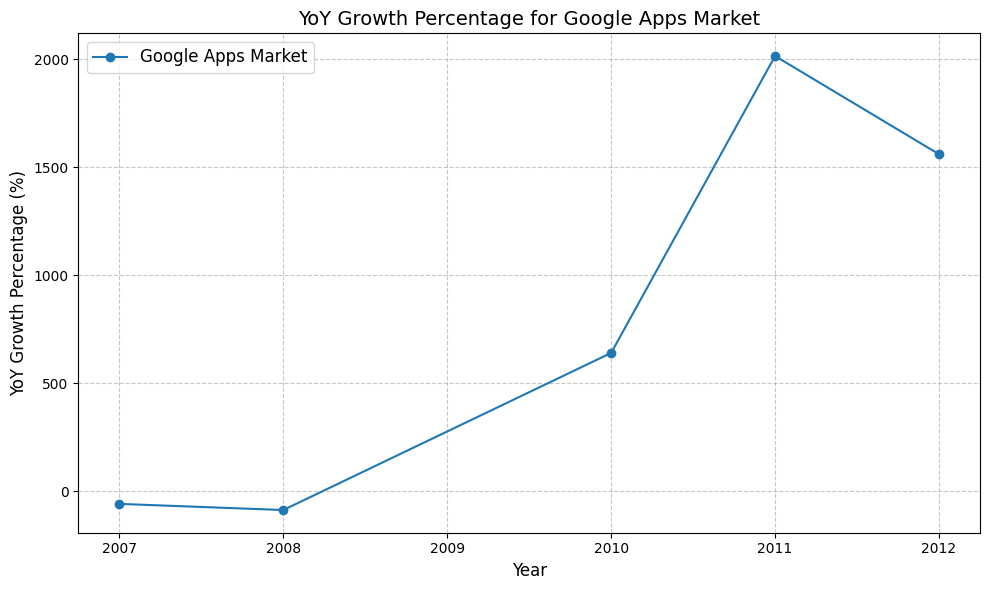

In [58]:
plot_yoy_growth_percentage(yearly_funding, market='Google Apps', year_col='founded_year', yoy_col='YoY_Growth_%')


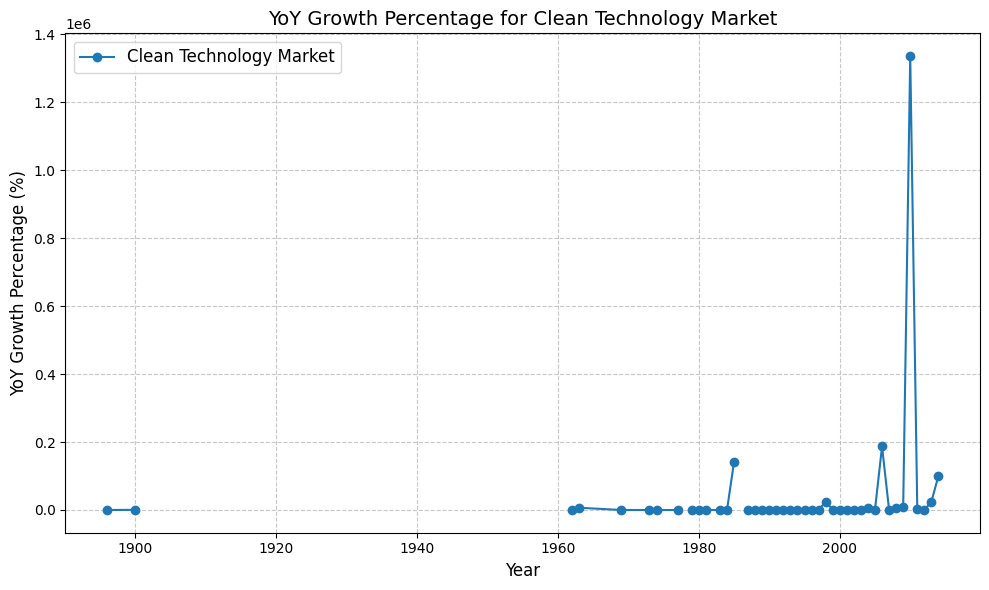

In [59]:
plot_yoy_growth_percentage(yearly_funding, market='Clean Technology', year_col='founded_year', yoy_col='YoY_Growth_%')


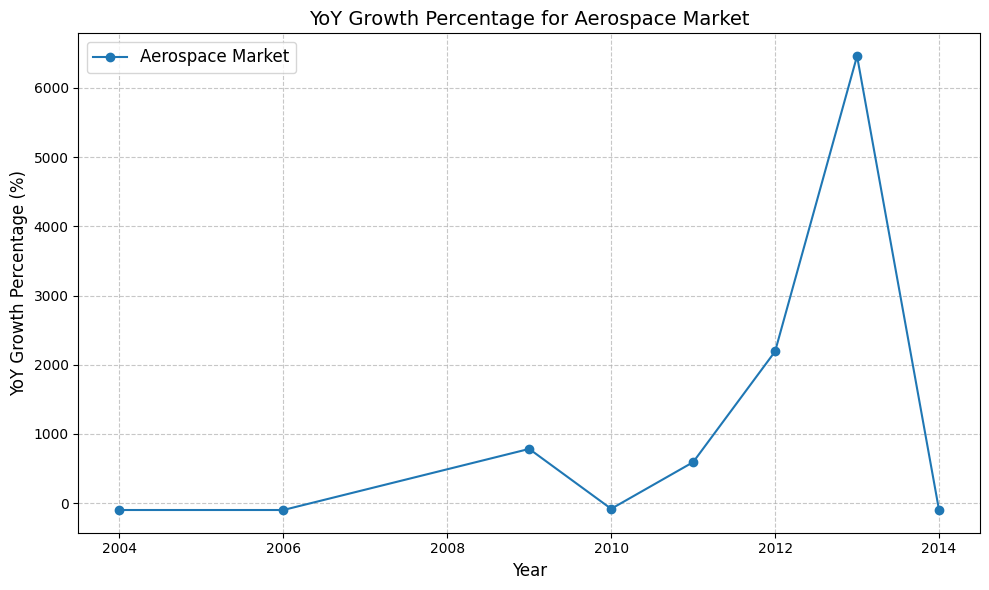

In [60]:
plot_yoy_growth_percentage(yearly_funding, market='Aerospace', year_col='founded_year', yoy_col='YoY_Growth_%')


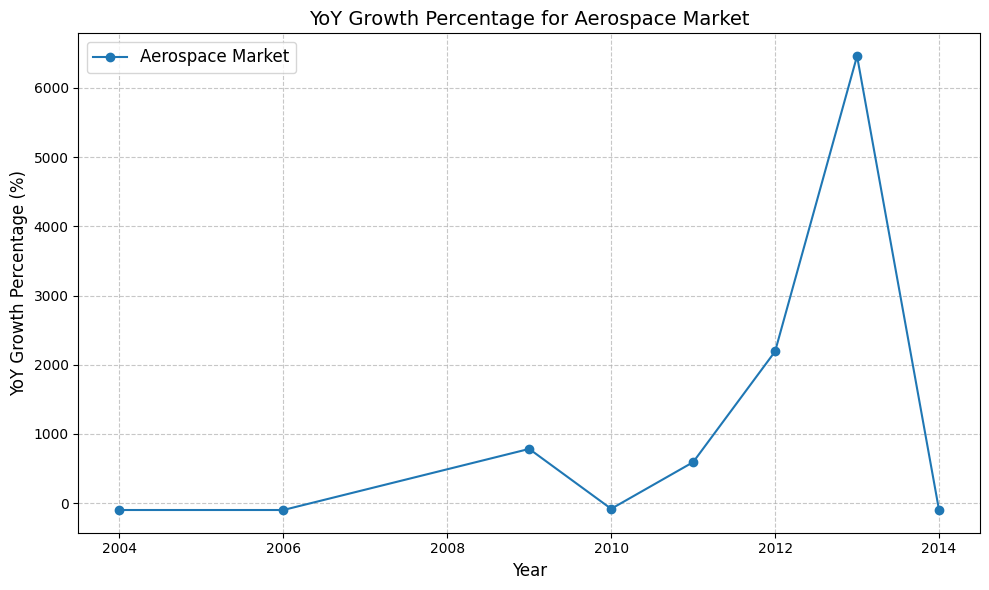

In [61]:
plot_yoy_growth_percentage(yearly_funding, market='Aerospace', year_col='founded_year', yoy_col='YoY_Growth_%')


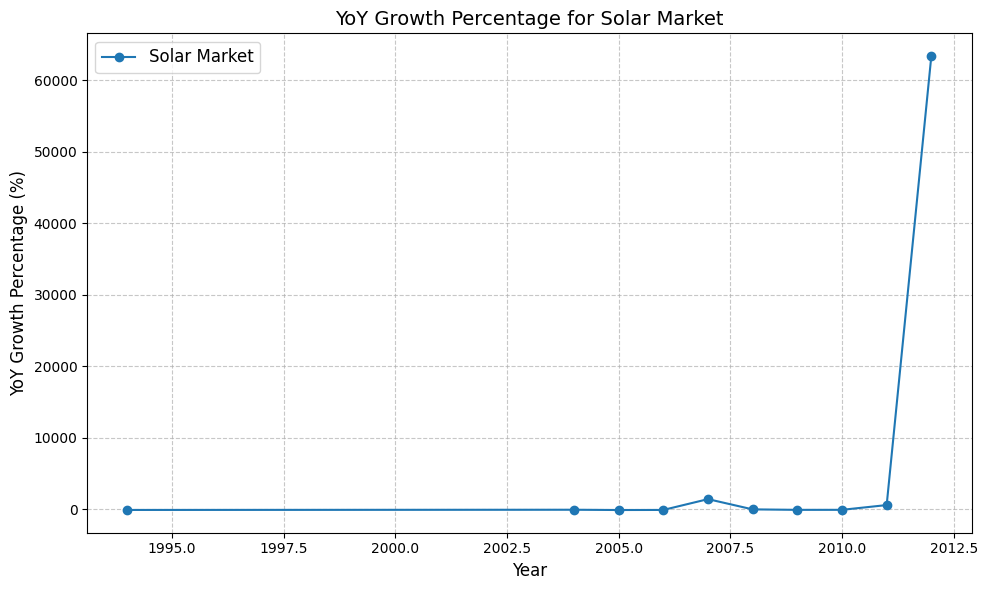

In [62]:
plot_yoy_growth_percentage(yearly_funding, market='Solar', year_col='founded_year', yoy_col='YoY_Growth_%')

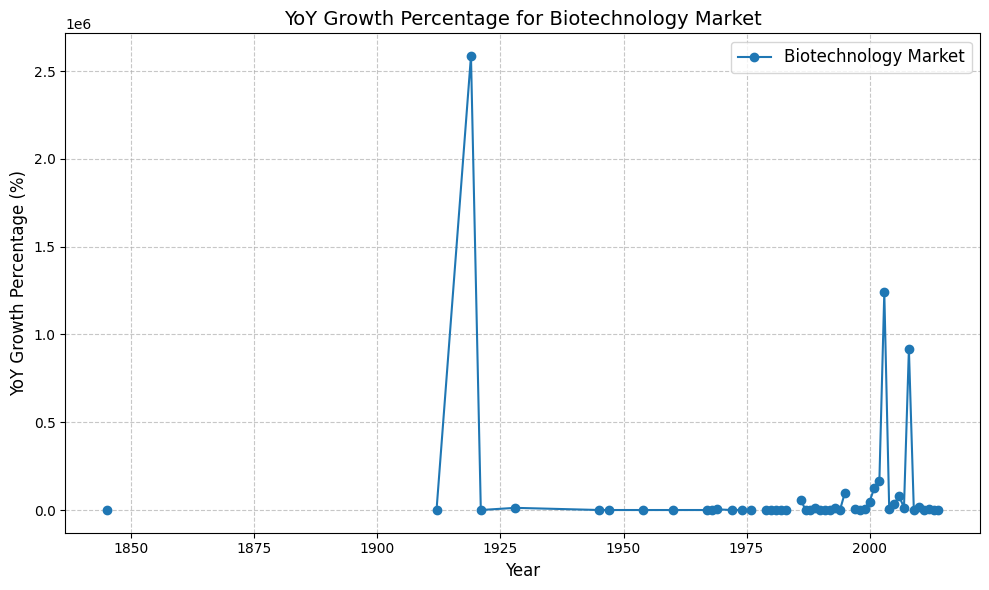

In [63]:
plot_yoy_growth_percentage(yearly_funding, market='Biotechnology', year_col='founded_year', yoy_col='YoY_Growth_%')


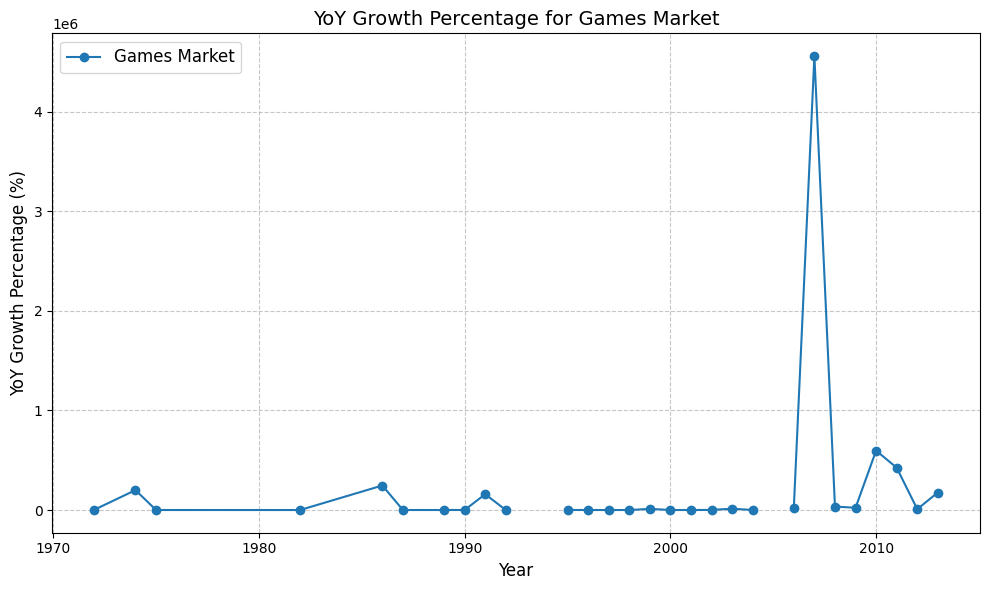

In [64]:
plot_yoy_growth_percentage(yearly_funding, market='Games', year_col='founded_year', yoy_col='YoY_Growth_%')


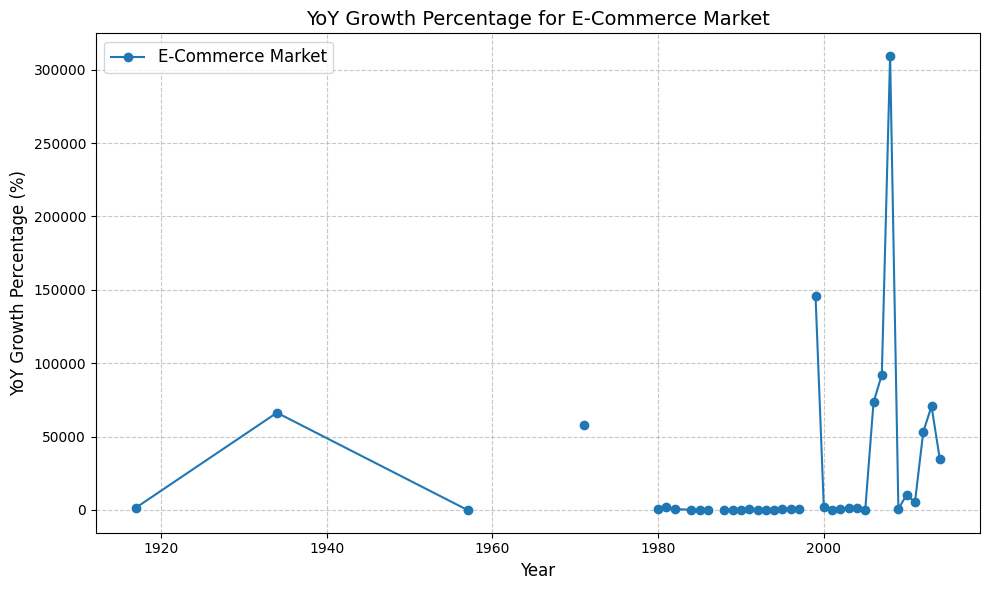

In [65]:
plot_yoy_growth_percentage(yearly_funding, market='E-Commerce', year_col='founded_year', yoy_col='YoY_Growth_%')


In [66]:
df[df['founded_year'].isna()][['first_funding_at', 'last_funding_at', 'founded_year', 'founded_at']]

first_funding_at last_funding_at  founded_year founded_at
1           2010-06-04      2010-09-23           NaN        NaT
6           2007-01-16      2007-01-16           NaN        NaT
9           2014-07-01      2014-07-01           NaN        NaT
11          2013-04-21      2013-04-21           NaN        NaT
19          2011-09-16      2011-09-16           NaN        NaT
...                ...             ...           ...        ...
49412       2011-10-24      2011-10-24           NaN        NaT
49422       2012-12-12      2012-12-12           NaN        NaT
49431       2010-10-21      2012-10-18           NaN        NaT
49434       2012-04-01      2012-04-01           NaN        NaT
49436       2011-11-21      2011-11-21           NaN        NaT

[10885 rows x 4 columns]

### Top 5 startup which received maximum funds

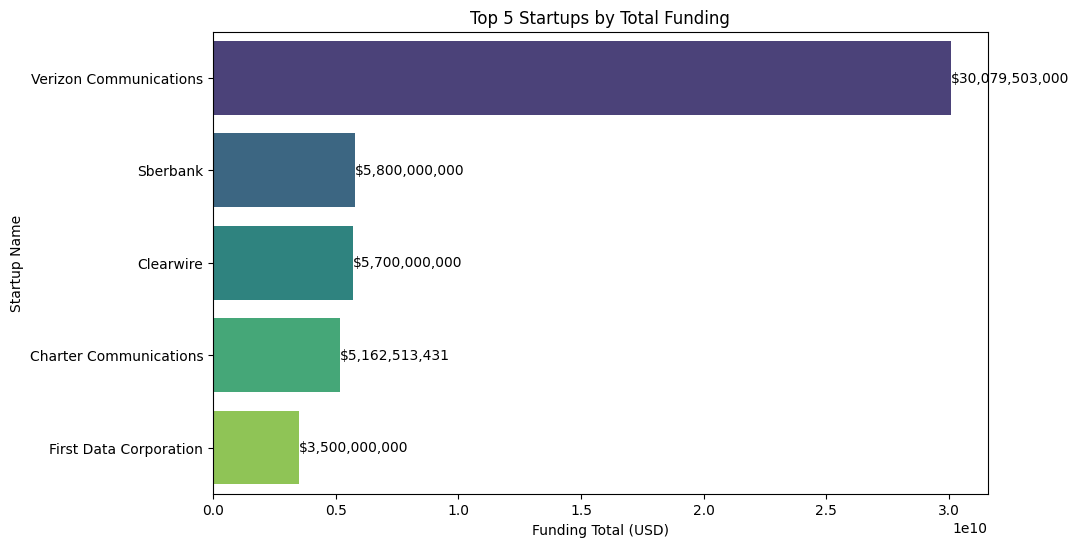

In [67]:
# Get the top 5 startups by total funding
top_startups = df[['name', 'funding_total_usd']].sort_values(by='funding_total_usd', ascending=False).head()

# Plotting
plt.figure(figsize=(10, 6))
bars = sns.barplot(data=top_startups, x='funding_total_usd', y='name', palette='viridis')

# Add funding values on the bars
for bar in bars.patches:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f"${int(bar.get_width()):,}", 
             ha='left', va='center', fontsize=10)

plt.title("Top 5 Startups by Total Funding")
plt.xlabel("Funding Total (USD)")
plt.ylabel("Startup Name")
plt.show()


Correlation between founded year and total funding: 0.51


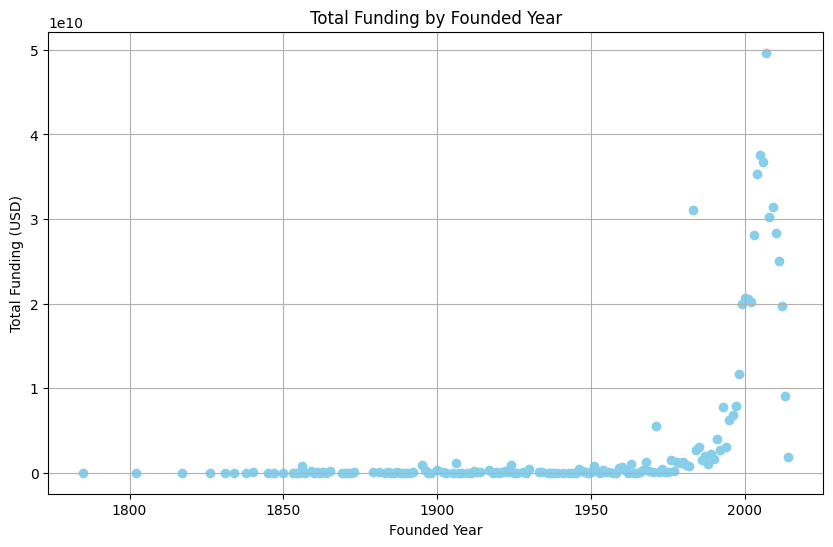

In [68]:
df['founded_year'] = pd.to_datetime(df['founded_year'], format='%Y', errors='coerce')

# Extract the year
df['year'] = df['founded_year'].dt.year

# Group by year and calculate total funding
funding_by_year = df.groupby('year')['funding_total_usd'].sum().reset_index()

# Calculate the correlation between founded_year and total funding
correlation = funding_by_year['year'].corr(funding_by_year['funding_total_usd'])
print(f"Correlation between founded year and total funding: {correlation:.2f}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(funding_by_year['year'], funding_by_year['funding_total_usd'], color='skyblue')
plt.title('Total Funding by Founded Year')
plt.xlabel('Founded Year')
plt.ylabel('Total Funding (USD)')
plt.grid(True)
plt.show()

## Observations: 

1. This could reflect the growth of venture capital and startup ecosystems, particularly in the technology and tourism sectors, in the 21st century
2. It might be worth investigating these outliers to understand the types of companies or markets attracting such high funding.
3. The plot indicates a shift in how funding is distributed, with recent decades showing a dramatic change in capital availability for new ventures. This could also relate to advancements in technology and increased investor confidence in high-growth markets.

### Trend between valuation and funding.

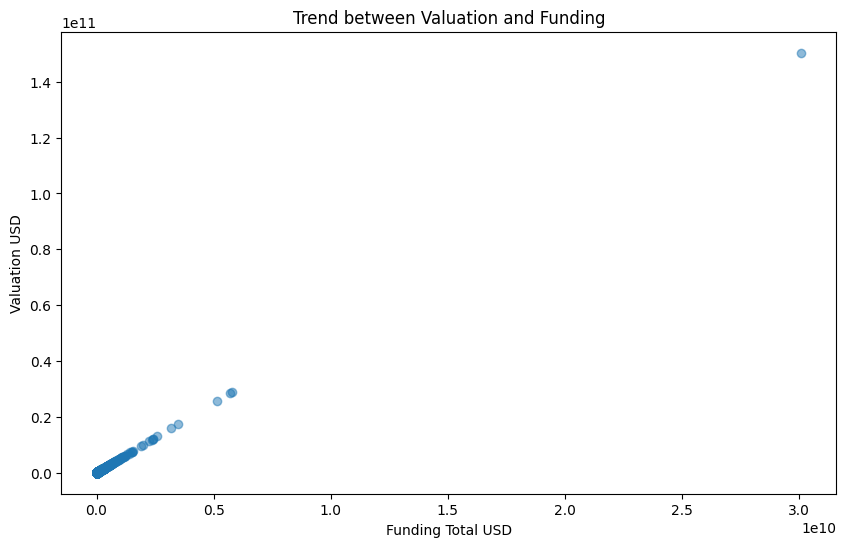

In [69]:
# Hypothetically, if you had a valuation column
df['valuation_usd'] = df['funding_total_usd'] * 5  # Replace with actual valuation data

# Plot funding vs. valuation to see trend
plt.figure(figsize=(10, 6))
plt.scatter(df['funding_total_usd'], df['valuation_usd'], alpha=0.5)
plt.xlabel('Funding Total USD')
plt.ylabel('Valuation USD')
plt.title('Trend between Valuation and Funding')
plt.show()

### Observations:

- As funding and no of funding rounds increases valuation of the company also increases. 

In [70]:
# Calculate total equity and debt funding for each company
df['total_equity_funding'] = df[['venture', 'equity_crowdfunding', 'angel', 'private_equity', 'post_ipo_equity']].sum(axis=1)
df['total_debt_funding'] = df[['debt_financing', 'post_ipo_debt', 'convertible_note']].sum(axis=1)

# Calculate the equity-to-debt ratio
df['equity_to_debt_ratio'] = df['total_equity_funding'] / df['total_debt_funding'].replace(0, 1)  # Avoid division by zero

# Display the results
df[['name', 'market', 'total_equity_funding', 'total_debt_funding', 'equity_to_debt_ratio']]

name               market   
0                           #waywire                 News  \
1                 &TV Communications                Games   
2                  'Rock' Your Paper           Publishing   
3                  (In)Touch Network          Electronics   
4                 -R- Ranch and Mine              Tourism   
...                              ...                  ...   
49433                          Zzish            Education   
49434  ZZNode Science and Technology  Enterprise Software   
49435          Zzzzapp Wireless ltd.      Web Development   
49436                  [a]list games                Games   
49437                          [x+1]  Enterprise Software   

       total_equity_funding  total_debt_funding  equity_to_debt_ratio  
0                       0.0                 0.0          0.000000e+00  
1                 4000000.0                 0.0          4.000000e+06  
2                       0.0                 0.0          0.000000e+00  
3                       0.0                 0.0          0.000000e+00  
4                   60000.0                 0.0          6.000000e+04  
...                     ...                 ...                   ...  
49433                   0.0                 0.0          0.000000e+00  
49434             1587301.0                 0.0          1.587301e+06  
49435                   0.0             25873.0          0.000000e+00  
49436                   0.0                 0.0          0.000000e+00  
49437            28000000.0          17000000.0          1.647059e+00  

[49438 rows x 5 columns]

In [71]:
df[['funding_total_usd', 'founded_year', 'founded_at',
       'founded_month', 'founded_quarter']]

funding_total_usd founded_year founded_at founded_month founded_quarter
0              1750000.0   2012-01-01 2012-06-01       2012-06         2012-Q2
1              4000000.0          NaT        NaT           NaN             NaN
2                40000.0   2012-01-01 2012-10-26       2012-10         2012-Q4
3              1500000.0   2011-01-01 2011-04-01       2011-04         2011-Q2
4                60000.0   2014-01-01 2014-01-01       2014-01         2014-Q1
...                  ...          ...        ...           ...             ...
49433           320000.0   2013-01-01 2013-01-28       2013-01         2013-Q1
49434          1587301.0          NaT        NaT           NaN             NaN
49435            97398.0   2012-01-01 2012-05-13       2012-05         2012-Q2
49436          9300000.0          NaT        NaT           NaN             NaN
49437         45000000.0   1999-01-01 1999-01-01       1999-01         1999-Q1

[49438 rows x 5 columns]

Text(0, 0.5, 'Total funding raise')

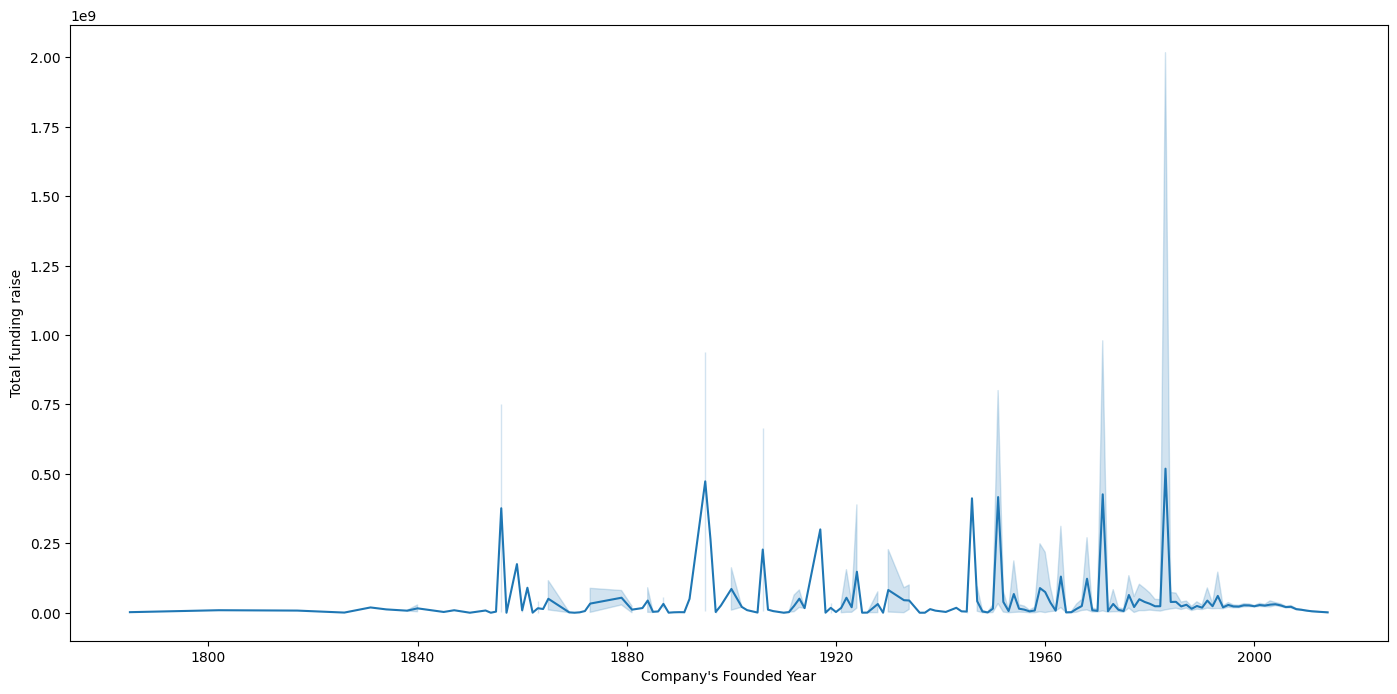

In [72]:
plt.figure(figsize=(17,8))
sns.lineplot(data=df, x='founded_year', y='funding_total_usd')
plt.xlabel("Company's Founded Year")
plt.ylabel("Total funding raise")

In [73]:
df[['founded_year', 'funding_total_usd']].corr()

founded_year  funding_total_usd
founded_year           1.000000           0.006054
funding_total_usd      0.006054           1.000000

### Growth in funding for each market/category over different year

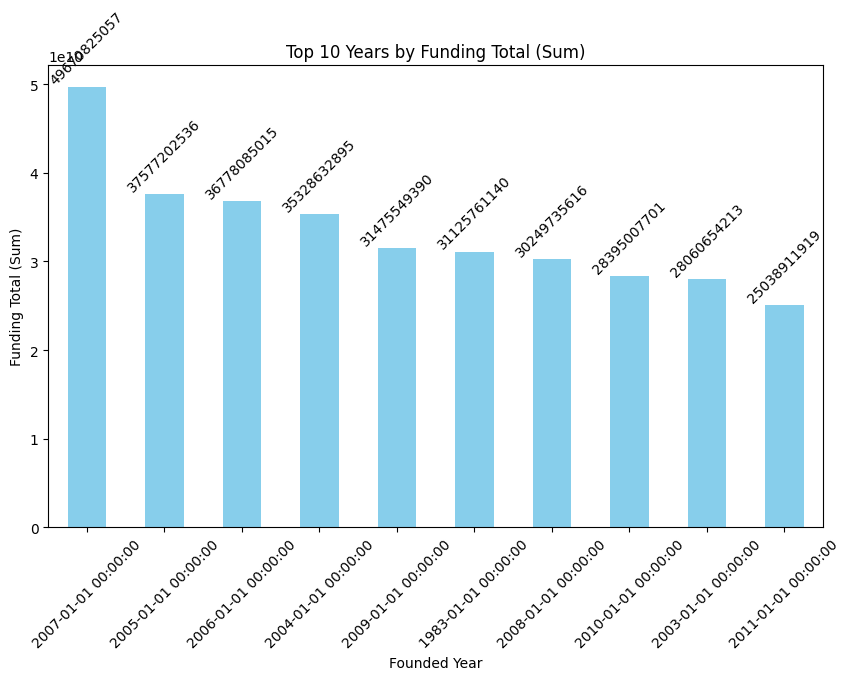

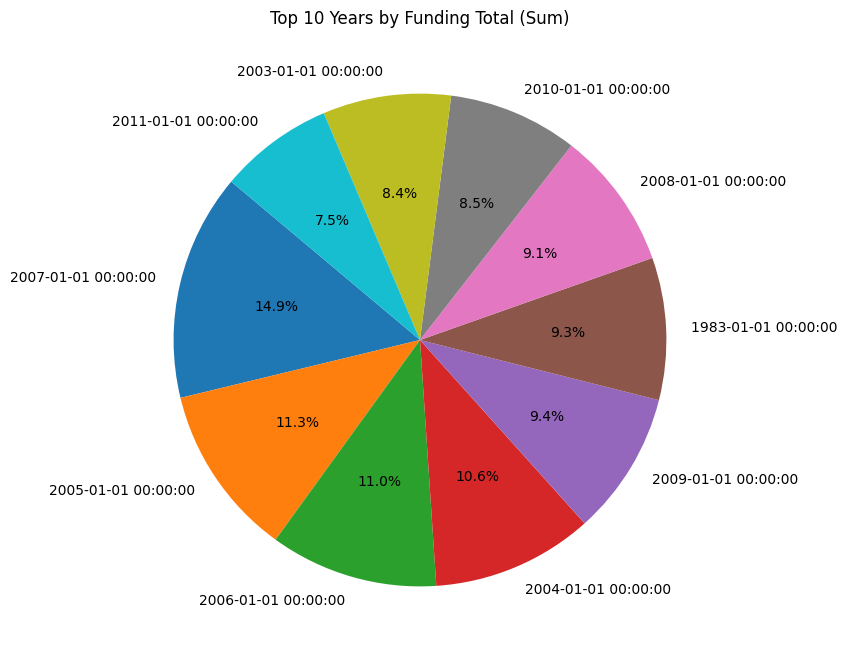

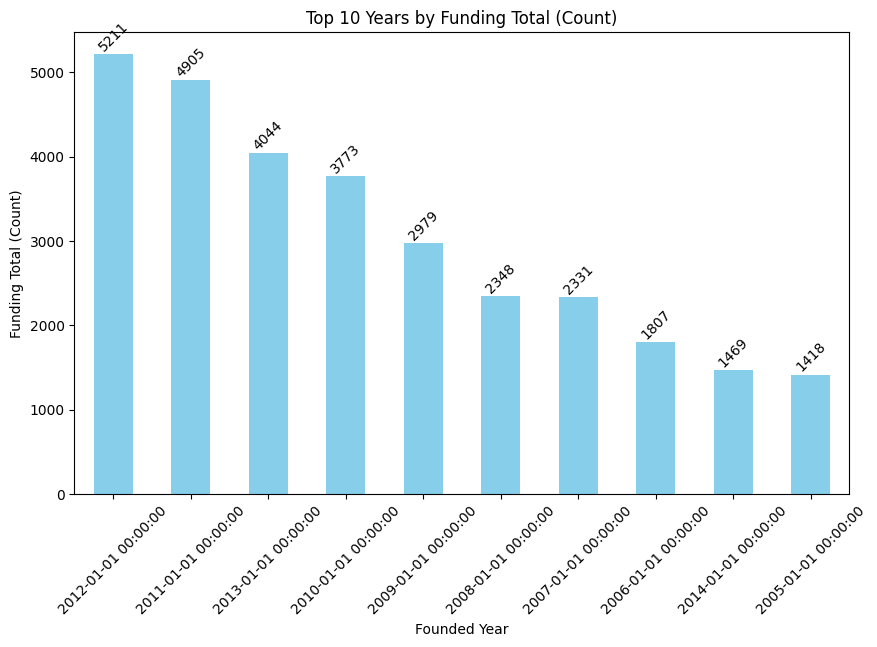

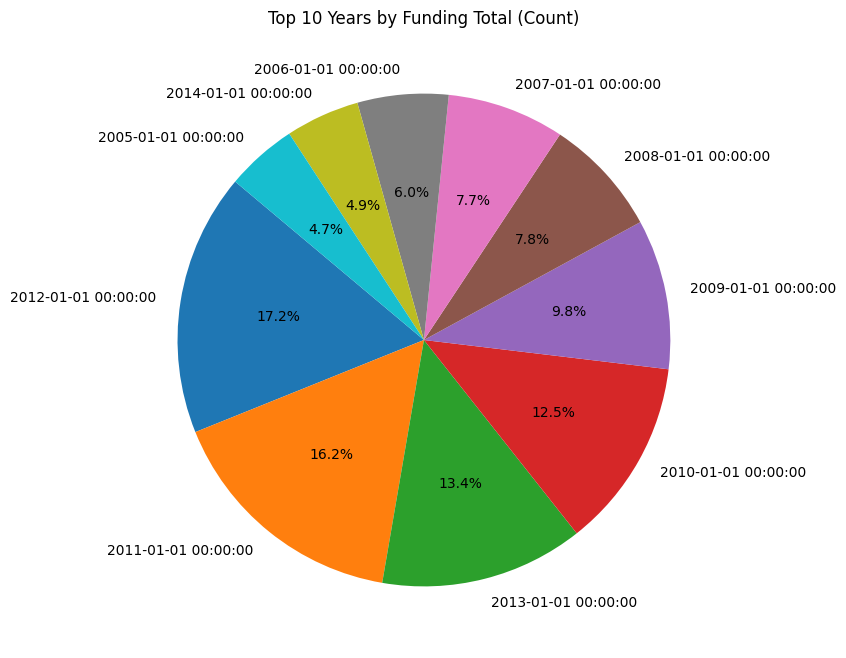

In [74]:
def plot_funding_by_year(df, funding_col, year_col='founded_year', top_n=10, agg_type='sum'):
    """
    Plots a bar graph and a pie chart for the funding data by year.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - funding_col (str): The column name for funding data (e.g., 'funding_total_usd').
    - year_col (str): The column name for the founding year (default is 'founded_year').
    - top_n (int): The number of top years to display (default is 10).
    - agg_type (str): Type of aggregation - either 'sum' or 'count' (default is 'sum').
    """
    # Aggregate the data based on the specified aggregation type
    if agg_type == 'sum':
        funding_data = df.groupby(year_col)[funding_col].sum().sort_values(ascending=False).head(top_n)
    elif agg_type == 'count':
        funding_data = df.groupby(year_col)[funding_col].count().sort_values(ascending=False).head(top_n)
    else:
        raise ValueError("Invalid agg_type. Use 'sum' or 'count'.")

    # Bar Chart
    plt.figure(figsize=(10, 6))
    funding_data.plot(kind='bar', color='skyblue')
    plt.xlabel('Founded Year')
    plt.ylabel(f'Funding Total ({"Sum" if agg_type == "sum" else "Count"})')
    plt.title(f'Top {top_n} Years by Funding Total ({agg_type.capitalize()})')
    plt.xticks(rotation=45)

    # Display values on the bar chart with rotation
    for index, value in enumerate(funding_data):
        plt.text(index, value, f'{value:.0f}', ha='center', va='bottom', fontsize=10, rotation=45)

    plt.show()

    # Pie Chart
    plt.figure(figsize=(8, 8))
    plt.pie(funding_data, labels=funding_data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Top {top_n} Years by Funding Total ({agg_type.capitalize()})')

    plt.show()

# Example usage:
plot_funding_by_year(df, funding_col='funding_total_usd', year_col='founded_year', top_n=10, agg_type='sum')
plot_funding_by_year(df, funding_col='funding_total_usd', year_col='founded_year', top_n=10, agg_type='count')

In [75]:
df.groupby('founded_year')['funding_total_usd'].count().sort_values(ascending=False).head(10)

founded_year
2012-01-01    5211
2011-01-01    4905
2013-01-01    4044
2010-01-01    3773
2009-01-01    2979
2008-01-01    2348
2007-01-01    2331
2006-01-01    1807
2014-01-01    1469
2005-01-01    1418
Name: funding_total_usd, dtype: int64

In [76]:
df.groupby('founded_year')['funding_total_usd'].sum().sort_values(ascending=False).head(10)

founded_year
2007-01-01    4.967083e+10
2005-01-01    3.757720e+10
2006-01-01    3.677809e+10
2004-01-01    3.532863e+10
2009-01-01    3.147555e+10
1983-01-01    3.112576e+10
2008-01-01    3.024974e+10
2010-01-01    2.839501e+10
2003-01-01    2.806065e+10
2011-01-01    2.503891e+10
Name: funding_total_usd, dtype: float64

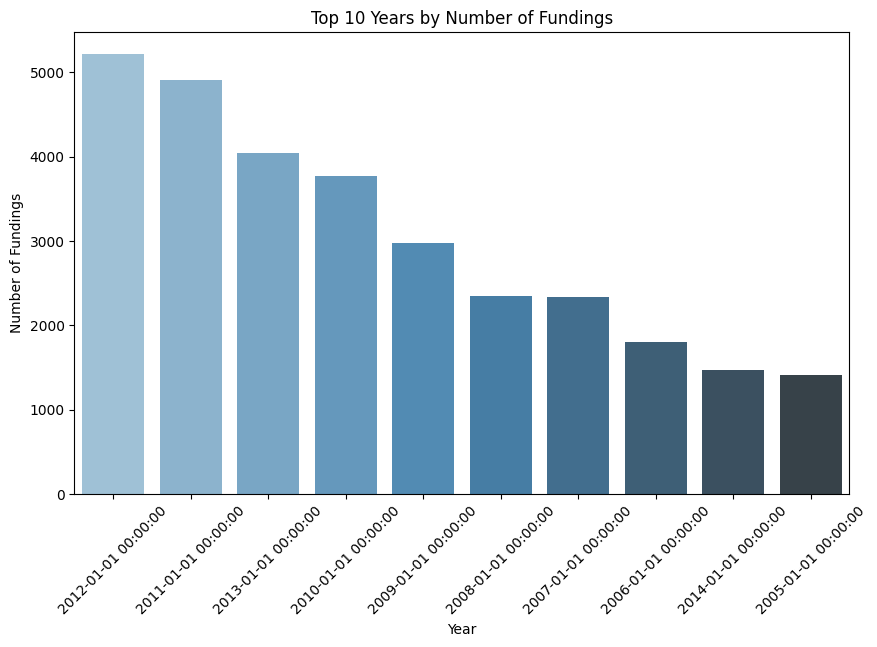

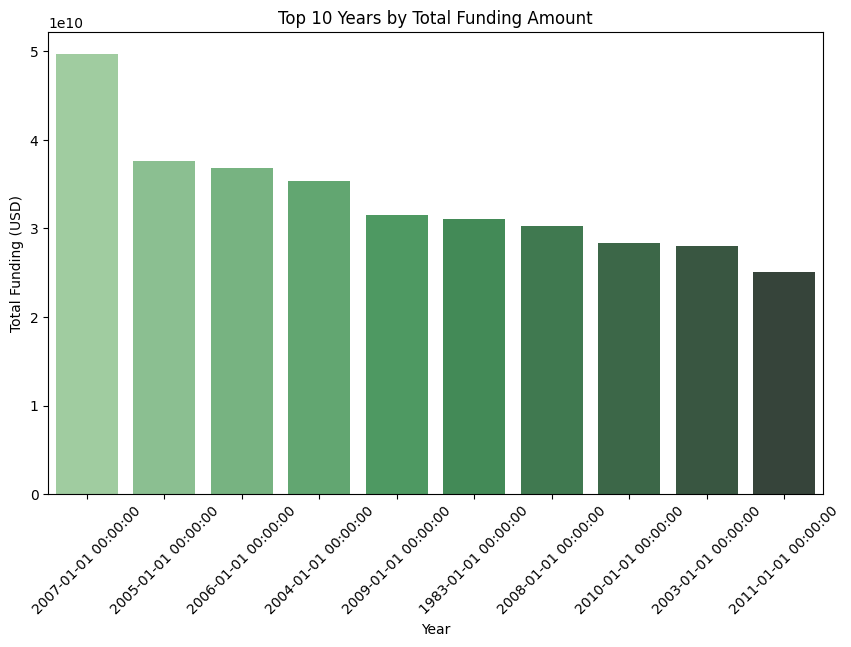

In [77]:
non_null_df = df[df['founded_year'].notna()]

# Get the top 10 years by count and sum
top_years_count = non_null_df.groupby('founded_year')['funding_total_usd'].count().sort_values(ascending=False).head(10)
top_years_sum = non_null_df.groupby('founded_year')['funding_total_usd'].sum().sort_values(ascending=False).head(10)

# Count Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_years_count.index, y=top_years_count.values, palette="Blues_d")
plt.xlabel('Year')
plt.ylabel('Number of Fundings')
plt.title('Top 10 Years by Number of Fundings')
plt.xticks(rotation=45)
plt.show()

# Sum Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_years_sum.index, y=top_years_sum.values, palette="Greens_d")
plt.xlabel('Year')
plt.ylabel('Total Funding (USD)')
plt.title('Top 10 Years by Total Funding Amount')
plt.xticks(rotation=45)
plt.show()


In [78]:
non_null_df = df[df['market']!='Unknown']
non_null_df.groupby(['founded_year', 'market'])['funding_total_usd'].count().sort_values(ascending=False).head(10)

founded_year  market       
2012-01-01    Software         418
2011-01-01    Software         383
2010-01-01    Software         309
2012-01-01    E-Commerce       288
2011-01-01    Mobile           283
2013-01-01    Software         282
2009-01-01    Software         282
2012-01-01    Mobile           266
2011-01-01    E-Commerce       246
2007-01-01    Biotechnology    212
Name: funding_total_usd, dtype: int64

In [79]:
non_null_df = df[df['market']!='Unknown']
non_null_df.groupby(['founded_year', 'market'])['funding_total_usd'].sum().sort_values(ascending=False).head(10)

founded_year  market          
1983-01-01    Mobile              3.008392e+10
2007-01-01    Biotechnology       6.886935e+09
2003-01-01    Internet            5.738259e+09
2001-01-01    Clean Technology    4.426737e+09
2007-01-01    Clean Technology    4.327005e+09
2004-01-01    Biotechnology       4.193724e+09
2005-01-01    Biotechnology       4.017074e+09
2006-01-01    Biotechnology       4.007061e+09
1999-01-01    Software            3.801359e+09
1971-01-01    Trading             3.500000e+09
Name: funding_total_usd, dtype: float64

/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_30862/3772159399.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_null_df[year_col] = pd.to_datetime(non_null_df[year_col], errors='coerce').dt.year


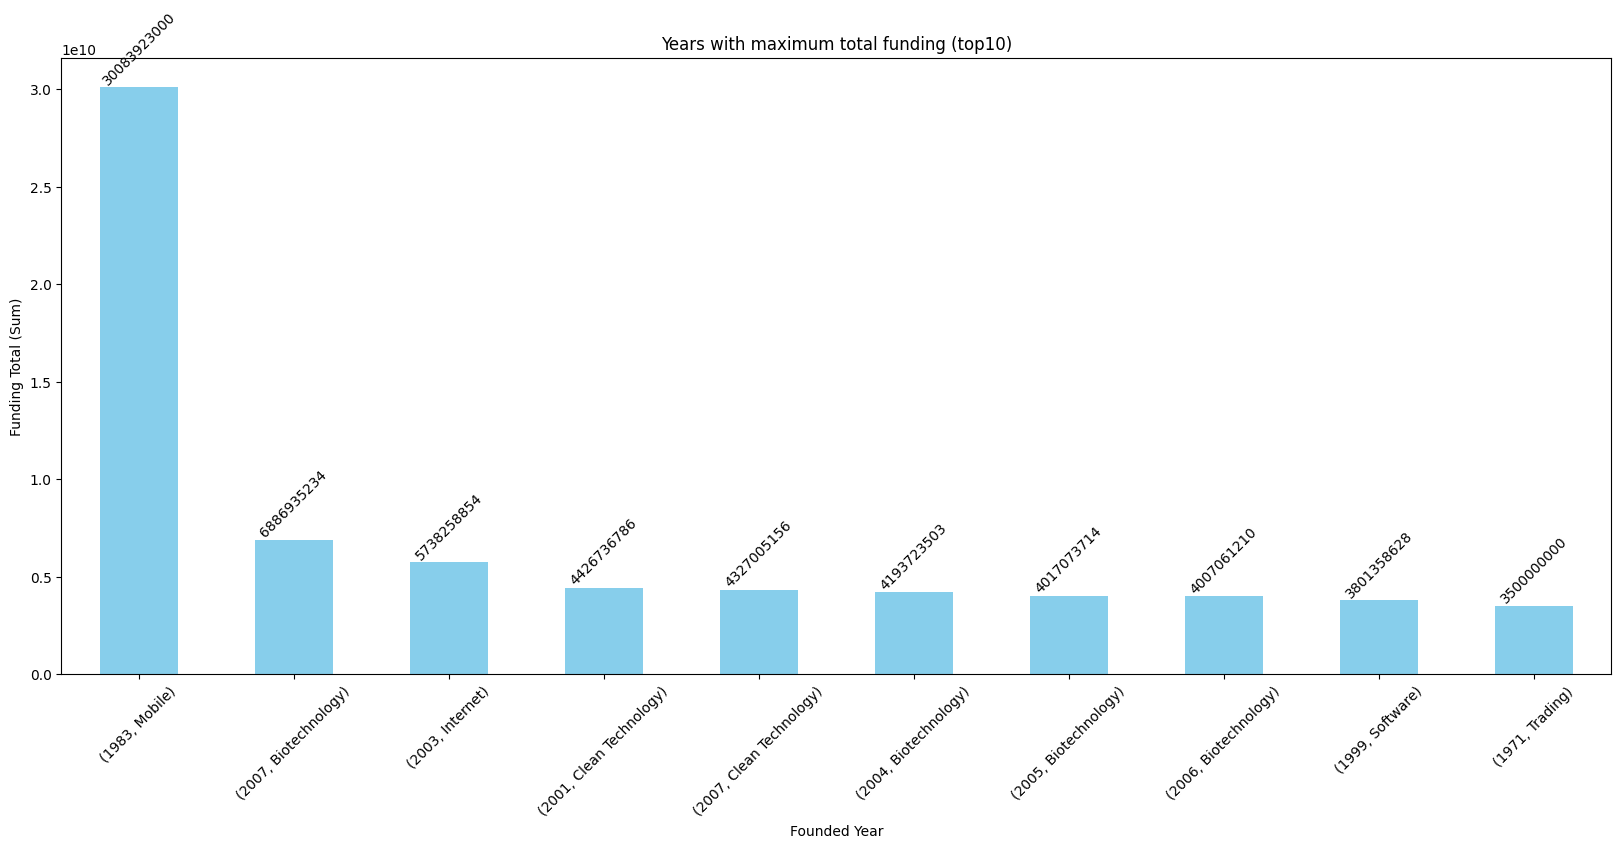

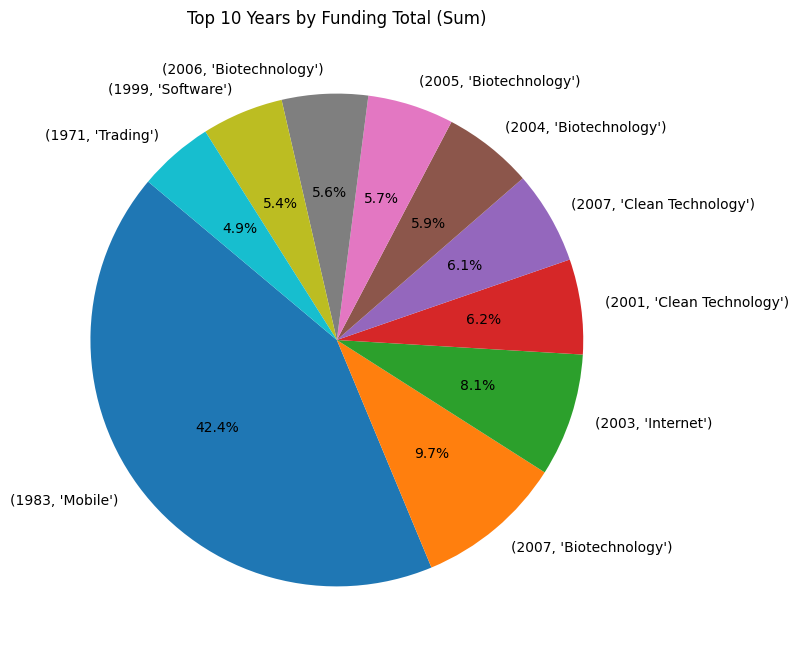

In [80]:
def plot_funding_by_year(non_null_df, funding_col, year_col='founded_year', top_n=10, agg_type='sum', market_col='market'):
    """
    Plots a bar graph and a pie chart for the funding data by year.
    
    Parameters:
    - non_null_df (pd.DataFrame): The DataFrame containing the data.
    - funding_col (str): The column name for funding data (e.g., 'funding_total_usd').
    - year_col (str): The column name for the founding year (default is 'founded_year').
    - top_n (int): The number of top years to display (default is 10).
    - agg_type (str): Type of aggregation - either 'sum' or 'count' (default is 'sum').
    - market_col (str): The column for market segmentation.
    """

    # Remove rows with "Unknown" or NaN values in the year column
    non_null_df = non_null_df[(non_null_df[year_col].notna()) & (non_null_df[market_col] != "Unknown")]

    # Extract only the year from the timestamp
    non_null_df[year_col] = pd.to_datetime(non_null_df[year_col], errors='coerce').dt.year

    # Aggregate the data based on the specified aggregation type
    if agg_type == 'sum':
        funding_data = non_null_df.groupby([year_col, market_col])[funding_col].sum().sort_values(ascending=False).head(top_n)
    elif agg_type == 'count':
        funding_data = non_null_df.groupby([year_col, market_col])[funding_col].count().sort_values(ascending=False).head(top_n)
    else:
        raise ValueError("Invalid agg_type. Use 'sum' or 'count'.")

    # Bar Chart
    plt.figure(figsize=(20, 8))
    funding_data.plot(kind='bar', color='skyblue')
    plt.xlabel('Founded Year')
    plt.ylabel(f'Funding Total ({"Sum" if agg_type == "sum" else "Count"})')
    plt.title(f'Years with maximum total funding (top10)')
    plt.xticks(rotation=45)
    
    # Display values on the bar chart with rotation
    for index, value in enumerate(funding_data):
        plt.text(index, value, f'{value:.0f}', ha='center', va='bottom', fontsize=10, rotation=45)
    
    plt.show()
    
    # Pie Chart
    plt.figure(figsize=(8, 8))
    plt.pie(funding_data, labels=funding_data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Top {top_n} Years by Funding Total ({agg_type.capitalize()})')
    
    plt.show()

# Example usage:
plot_funding_by_year(non_null_df, funding_col='funding_total_usd', year_col='founded_year', top_n=10, market_col='market', agg_type='sum')


### Recommendations 

1. **Focus on High-Growth Sectors**: Prioritize sectors like Biotechnology and Software, which have historically attracted significant funding.
2. **Diversify Your Portfolio**: Spread investments across different sectors, geographies, and stages of development to mitigate risk.
3. **Conduct Thorough Due Diligence**: Carefully analyze each investment opportunity, considering factors like business model, team, financials, and market potential.
4. **Build Strong Relationships**: Network with other investors, entrepreneurs, and industry experts to gain access to promising deals.
5. **Long-Term Perspective**: Adopt a long-term investment horizon, focusing on sustainable growth and value creation.
6. **Stay Informed**: Keep abreast of market trends, emerging technologies, and regulatory changes.
7. **Risk Management**: Assess the risks associated with each investment and develop strategies to mitigate them.

In [81]:
region_funding_summary = (
    df.groupby('region')
    .agg(
        total_funding=('funding_total_usd', 'sum'),
        average_funding=('funding_total_usd', 'mean'),
        funding_rounds_avg=('funding_rounds', 'mean'),
        startup_count=('funding_total_usd', 'count')
    )
    .sort_values(by='total_funding', ascending=False)
)

# Display the top regions with the most total funding
region_funding_summary.head(10)

total_funding  average_funding  funding_rounds_avg   
region                                                                 
SF Bay Area        1.339108e+11     1.963501e+07            2.123900  \
New York City      6.300848e+10     2.445032e+07            1.846721   
Boston             3.653691e+10     1.988945e+07            2.262384   
Los Angeles        1.783554e+10     1.284056e+07            1.764579   
Seattle            1.672701e+10     1.794744e+07            2.001073   
London             1.538808e+10     9.411668e+06            1.617737   
San Diego          1.381026e+10     1.972894e+07            2.000000   
Beijing            1.379847e+10     2.700287e+07            1.812133   
Washington, D.C.   1.280293e+10     1.630946e+07            1.868790   
Chicago            1.262140e+10     1.685101e+07            1.688919   

                  startup_count  
region                           
SF Bay Area                6820  
New York City              2577  
Boston                     1837  
Los Angeles                1389  
Seattle                     932  
London                     1635  
San Diego                   700  
Beijing                     511  
Washington, D.C.            785  
Chicago                     749

In [82]:
market_funding_summary = (
    df.groupby('market')
    .agg(
        total_funding=('funding_total_usd', 'sum'),
        average_funding=('funding_total_usd', 'mean'),
        funding_rounds_avg=('funding_rounds', 'mean'),
        startup_count=('funding_total_usd', 'count')
    )
    .sort_values(by=['total_funding', 'average_funding', 'funding_rounds_avg', 'startup_count'], ascending=False)
)

# Display the top regions with the most total funding
market_funding_summary.head(10)

total_funding  average_funding  funding_rounds_avg   
market                                                                    
Biotechnology         7.337295e+10     1.989505e+07            2.074837  \
Mobile                4.947011e+10     2.494710e+07            1.800303   
Software              4.222348e+10     9.139281e+06            1.652165   
Clean Technology      3.761994e+10     3.134995e+07            1.825000   
Health Care           2.946608e+10     2.441266e+07            2.300746   
E-Commerce            2.240839e+10     1.241462e+07            1.638781   
Enterprise Software   1.929719e+10     1.507593e+07            1.982813   
Finance               1.737230e+10     2.003725e+07            1.719723   
Hardware + Software   1.281293e+10     1.185285e+07            1.751156   
Advertising           1.266066e+10     1.189912e+07            1.892857   

                     startup_count  
market                              
Biotechnology                 3688  
Mobile                        1983  
Software                      4620  
Clean Technology              1200  
Health Care                   1207  
E-Commerce                    1805  
Enterprise Software           1280  
Finance                        867  
Hardware + Software           1081  
Advertising                   1064

###  Funding in niche and non-niche segments.

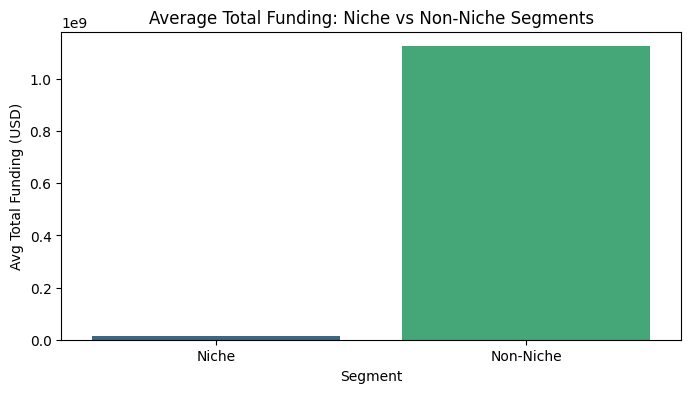

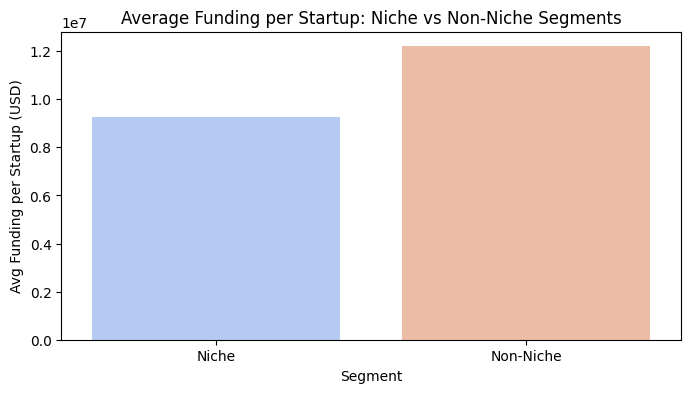

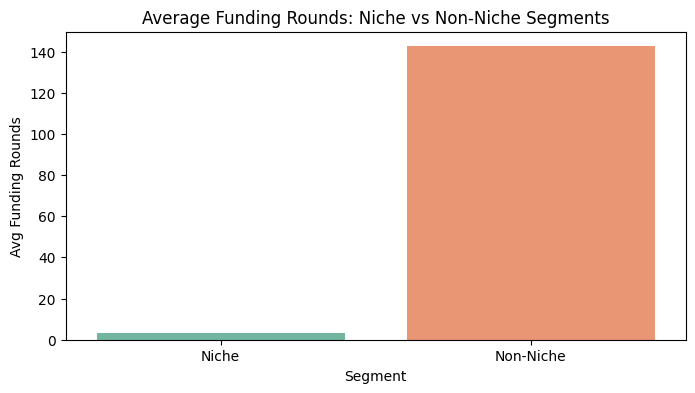

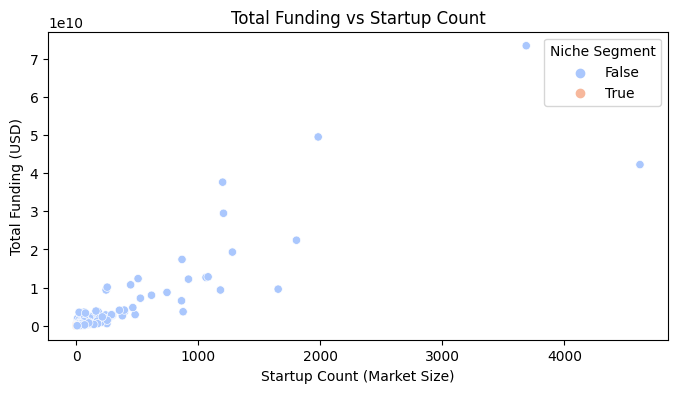

In [83]:
# Ensure funding_total_usd column is numeric
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')

# Step 1: Group by Market/Category
market_stats = df.groupby('market').agg(
    total_funding=('funding_total_usd', 'sum'),
    avg_funding=('funding_total_usd', 'mean'),
    funding_rounds=('funding_rounds', 'sum'),
    startup_count=('market', 'count')
).reset_index()

# Step 2: Define Niche Segments
# Set a threshold for niche segments (bottom 25% by startup count)
niche_threshold = market_stats['startup_count'].quantile(0.25)
market_stats['is_niche'] = market_stats['startup_count'] <= niche_threshold

# Step 3: Compare Metrics for Niche vs Non-Niche
niche_stats = market_stats[market_stats['is_niche'] == True]
non_niche_stats = market_stats[market_stats['is_niche'] == False]

# Calculate average funding and returns for niche vs non-niche
comparison = {
    "Segment": ["Niche", "Non-Niche"],
    "Avg Total Funding": [niche_stats['total_funding'].mean(), non_niche_stats['total_funding'].mean()],
    "Avg Funding per Startup": [niche_stats['avg_funding'].mean(), non_niche_stats['avg_funding'].mean()],
    "Avg Funding Rounds": [niche_stats['funding_rounds'].mean(), non_niche_stats['funding_rounds'].mean()]
}
comparison_df = pd.DataFrame(comparison)

# Step 4: Visualize the Comparison
plt.figure(figsize=(8,4))
sns.barplot(x='Segment', y='Avg Total Funding', data=comparison_df, palette='viridis')
plt.title('Average Total Funding: Niche vs Non-Niche Segments')
plt.ylabel('Avg Total Funding (USD)')
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x='Segment', y='Avg Funding per Startup', data=comparison_df, palette='coolwarm')
plt.title('Average Funding per Startup: Niche vs Non-Niche Segments')
plt.ylabel('Avg Funding per Startup (USD)')
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x='Segment', y='Avg Funding Rounds', data=comparison_df, palette='Set2')
plt.title('Average Funding Rounds: Niche vs Non-Niche Segments')
plt.ylabel('Avg Funding Rounds')
plt.show()

# Step 5: Scatter Plot to Analyze Total Funding by Startup Count
plt.figure(figsize=(8,4))
sns.scatterplot(data=market_stats, x='startup_count', y='total_funding', hue='is_niche', palette='coolwarm')
plt.title('Total Funding vs Startup Count')
plt.xlabel('Startup Count (Market Size)')
plt.ylabel('Total Funding (USD)')
plt.legend(title='Niche Segment')
plt.show()

In [84]:
market_analysis = df.groupby('market').agg({
    'funding_total_usd': ['sum', 'mean'],
    'name': 'count',
    'funding_rounds': 'mean'
}).reset_index()

# Rename columns for clarity
market_analysis.columns = ['market', 'total_funding', 'average_funding', 'num_companies', 'avg_funding_rounds']

# Calculate thresholds for niche markets
funding_threshold = market_analysis['total_funding'].quantile(0.25)  
company_threshold = market_analysis['num_companies'].median()       
rounds_threshold = market_analysis['avg_funding_rounds'].median()    

# Filter for niche markets
niche_markets = market_analysis[
    (market_analysis['total_funding'] < funding_threshold) &
    (market_analysis['num_companies'] < company_threshold) &
    (market_analysis['avg_funding_rounds'] < rounds_threshold)
]

# Sort niche markets by growth score or another metric
# Growth score is calculated as average funding scaled by the number of companies and funding rounds
niche_markets['growth_score'] = (
    market_analysis['average_funding'] / (market_analysis['avg_funding_rounds'] + 1)
) * niche_markets['num_companies']

# Select the top 5 niche markets with the highest growth score
top_5_niche_markets = niche_markets.sort_values(by='growth_score', ascending=False).head(5)

# Display the top 5 niche markets
top_5_niche_markets[['market', 'num_companies', 'total_funding', 'avg_funding_rounds', 'growth_score']]

/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_30862/1054362226.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  niche_markets['growth_score'] = (


market  num_companies  total_funding  avg_funding_rounds   
665               Tea              2      7409332.0            1.000000  \
670         Teenagers              6      7935890.0            1.166667   
266        Franchises              2      7035000.0            1.000000   
357  Interface Design              5      6886993.0            1.000000   
477   Online Auctions              4      6611968.0            1.000000   

     growth_score  
665  3.704666e+06  
670  3.662718e+06  
266  3.517500e+06  
357  3.443496e+06  
477  3.305984e+06

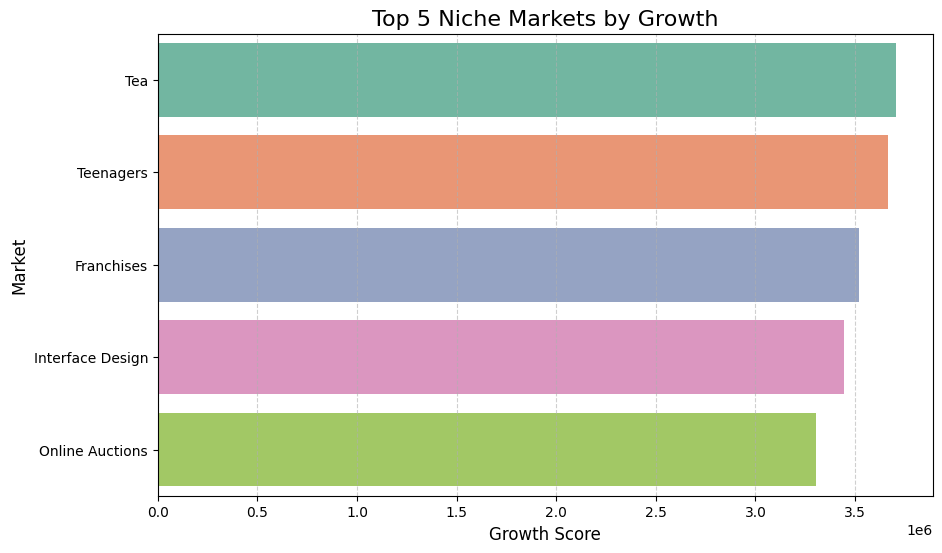

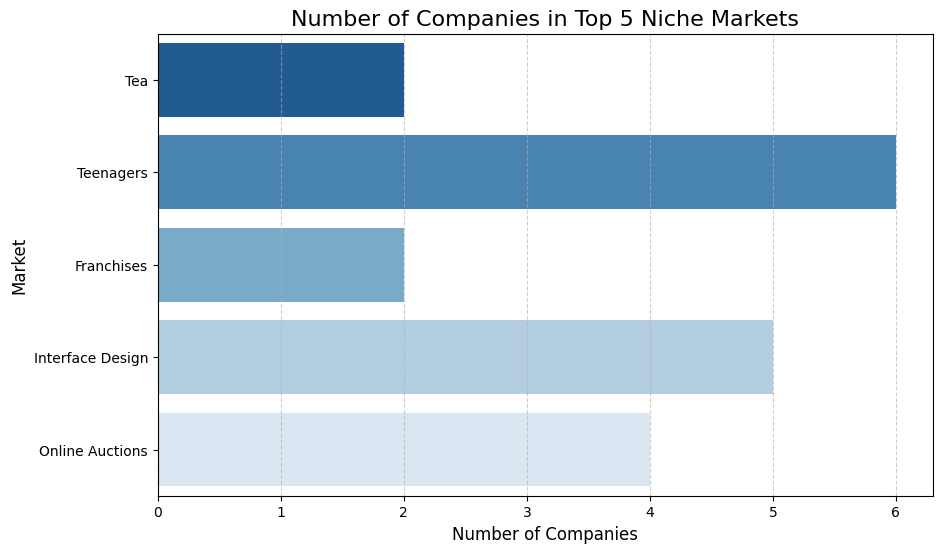

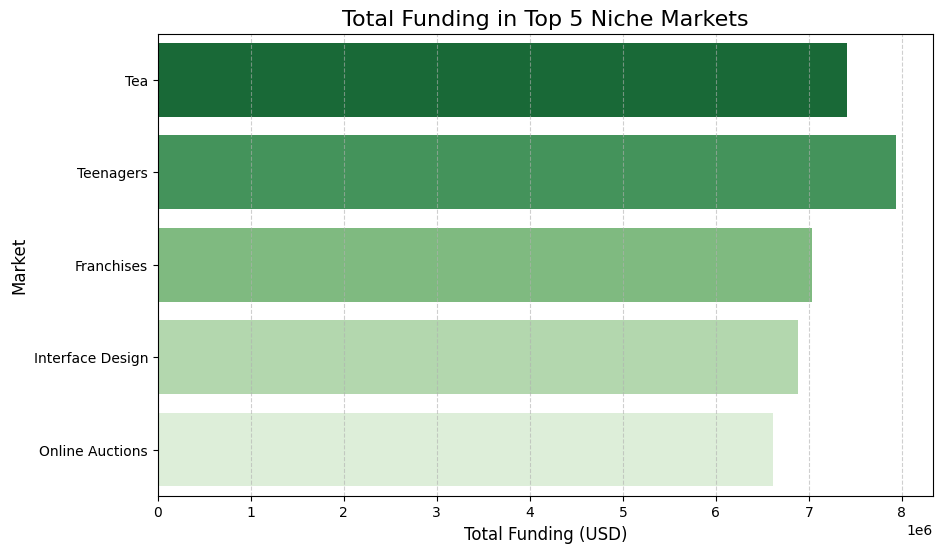

In [85]:
# Bar plot for the top 5 niche markets by growth score
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_5_niche_markets,
    x='growth_score',
    y='market',
    palette='Set2'
)
plt.title('Top 5 Niche Markets by Growth', fontsize=16)
plt.xlabel('Growth Score', fontsize=12)
plt.ylabel('Market', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Bar plot for the number of companies in each top 5 niche market
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_5_niche_markets,
    x='num_companies',
    y='market',
    palette='Blues_r'
)
plt.title('Number of Companies in Top 5 Niche Markets', fontsize=16)
plt.xlabel('Number of Companies', fontsize=12)
plt.ylabel('Market', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Bar plot for total funding in each top 5 niche market
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_5_niche_markets,
    x='total_funding',
    y='market',
    palette='Greens_r'
)
plt.title('Total Funding in Top 5 Niche Markets', fontsize=16)
plt.xlabel('Total Funding (USD)', fontsize=12)
plt.ylabel('Market', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [86]:
market_analysis = df.groupby('market').agg({
    'funding_total_usd': ['sum', 'mean'],
    'name': 'count',
    'funding_rounds': 'mean'
}).reset_index()

# Rename columns for clarity
market_analysis.columns = ['market', 'total_funding', 'average_funding', 'num_companies', 'avg_funding_rounds']

# Calculate thresholds for niche markets (25th percentile for funding and number of companies)
funding_threshold = market_analysis['total_funding'].quantile(0.25)
company_threshold = market_analysis['num_companies'].median()
rounds_threshold = market_analysis['avg_funding_rounds'].median()

# Filter for niche markets
niche_markets = market_analysis[
    (market_analysis['total_funding'] < funding_threshold) &
    (market_analysis['num_companies'] < company_threshold) &
    (market_analysis['avg_funding_rounds'] < rounds_threshold)
]

niche_markets

market  total_funding  average_funding  num_companies   
5         Advanced Materials            0.0     0.000000e+00              2  \
6           Adventure Travel      1481432.0     2.469053e+05              6   
17      Alternative Medicine      7347000.0     3.673500e+06              2   
18                    Alumni       610000.0     6.100000e+05              1   
21                    Angels      1669247.0     8.346235e+05              2   
..                       ...            ...              ...            ...   
718         Virtual Currency      6174299.0     8.820427e+05              7   
734  Web Presence Management        40000.0     4.000000e+04              1   
736                    WebOS      1447300.0     4.824333e+05              3   
738           Weird Hardware            0.0     0.000000e+00              1   
747             Young Adults      1100000.0     5.500000e+05              2   

     avg_funding_rounds  
5              1.000000  
6              1.333333  
17             1.500000  
18             1.000000  
21             1.500000  
..                  ...  
718            1.142857  
734            1.000000  
736            1.000000  
738            1.000000  
747            1.500000  

[135 rows x 5 columns]

### Is funding amount increases in every next funding round for top markets?


In [87]:
top_markets = ['Biotechnology', 'Software', 'Mobile', 'Clean Technology', 
               'Health Care', 'E-Commerce', 'Enterprise Software', 
               'Finance', 'Advertising', 'Hardware + Software']

# Filter data for top markets
filtered_df = df[df['market'].isin(top_markets)]

# Funding columns to analyze
funding_columns = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
                   'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 
                   'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 
                   'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

# Group by market and calculate total funding and funding per round
market_wise_funding = filtered_df.groupby('market')[['funding_total_usd'] + funding_columns].sum().reset_index()

# Calculate percentage of total funding for each round
for col in funding_columns:
    market_wise_funding[f"{col} %"] = round(market_wise_funding[col] / market_wise_funding['funding_total_usd'] * 100, 2)

# Select relevant columns for display
percentage_columns = [f"{col} %" for col in funding_columns]
result_df = market_wise_funding[['market', 'funding_total_usd'] + percentage_columns]

# Determine if funding increases in subsequent rounds
def funding_increase(row):
    rounds = ['round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']
    funding_values = [row[round] for round in rounds if round in row]
    return all(earlier <= later for earlier, later in zip(funding_values, funding_values[1:]))

market_wise_funding['Funding Increases'] = filtered_df.apply(funding_increase, axis=1)

# Display the final dataset
result_df['Funding Increases'] = market_wise_funding['Funding Increases']
result_df

/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_30862/1530506645.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Funding Increases'] = market_wise_funding['Funding Increases']


market  funding_total_usd  seed %  venture %   
0          Advertising       1.266066e+10    2.20      83.17  \
1        Biotechnology       7.337295e+10    0.50      68.41   
2     Clean Technology       3.761994e+10    0.28      51.68   
3           E-Commerce       2.240839e+10    1.93      67.73   
4  Enterprise Software       1.929719e+10    1.11      71.29   
5              Finance       1.737230e+10    1.13      36.64   
6  Hardware + Software       1.281293e+10    1.29      65.61   
7          Health Care       2.946608e+10    0.81      61.82   
8               Mobile       4.947011e+10    1.04      27.57   
9             Software       4.222348e+10    2.02      69.01   

   equity_crowdfunding %  undisclosed %  convertible_note %  debt_financing %   
0                   0.02           0.82                0.02              3.12  \
1                   0.01           0.47                0.25             12.28   
2                   0.03           1.09                0.05             14.93   
3                   0.05           3.47                0.07              5.08   
4                   0.00           0.38                0.10              6.67   
5                   0.09           0.75                0.06             11.01   
6                   0.00           0.88                0.24              4.73   
7                   0.00           0.40                0.46             12.52   
8                   0.00           0.22                0.11             63.09   
9                   0.05           0.81                0.11              7.36   

   angel %  grant %  private_equity %  post_ipo_equity %  post_ipo_debt %   
0     0.53     0.01              9.94               0.17             0.00  \
1     0.05     1.53             10.44               5.11             0.85   
2     0.04     1.46             27.87               2.30             0.27   
3     0.88     0.03             18.47               1.89             0.33   
4     0.44     0.09              7.16               1.30            10.36   
5     0.74     0.22             14.43               1.42            33.47   
6     0.22     0.55             15.60              10.53             0.01   
7     0.08     1.24             15.01               6.41             1.23   
8     0.52     0.15              6.56               0.73             0.00   
9     0.51     0.11             14.28               4.24             0.36   

   secondary_market %  product_crowdfunding %  round_A %  round_B %   
0                0.00                    0.01      13.40      16.83  \
1                0.11                    0.01      11.27      13.86   
2                0.00                    0.01       5.54       9.91   
3                0.02                    0.04      13.60      11.30   
4                1.09                    0.00      11.99      15.49   
5                0.00                    0.03       5.21       8.07   
6                0.00                    0.34       8.76      11.88   
7                0.00                    0.01       7.01      13.11   
8                0.00                    0.01       5.73       6.15   
9                1.12                    0.02      11.32      14.00   

   round_C %  round_D %  round_E %  round_F %  round_G %  round_H %   
0      14.35      13.34       3.81       2.27       0.00       0.00  \
1       9.47       5.80       2.27       1.54       0.17       0.00   
2       9.33       6.02       1.42       0.63       0.10       0.00   
3      11.32       5.51       6.49       3.95       0.76       0.24   
4      12.33       8.76       4.65       0.79       0.00       0.00   
5       4.92       2.36       0.24       0.37       0.00       0.00   
6       9.82       4.43       1.77       1.30       0.20       0.00   
7      10.29       5.19       3.63       0.73       0.72       0.00   
8       4.96       1.71       1.06       0.21       0.15       0.00   
9       9.09       5.54       1.51       0.73       1.09       0.00   

  Fundi

### Observations and Recommendations : 

- Dominant Funding Rounds:

1. Venture funding leads across all markets (50–83%), driving growth.
2. Private equity is significant in Clean Technology (28%) and Finance (15%), indicating mature investment opportunities.

- Market-Specific Trends:

1. Advertising and Software: Strong early-stage growth potential with high Series A/B funding.
2. Clean Technology and Health Care: Diverse funding (private equity, grants) shows resilience and long-term opportunities.

- Late-Stage Funding:

1. Mobile shows funding growth through rounds (67% debt financing), signaling scalability.
2. Finance shows funding plateaus, suggesting market maturity or scaling challenges.

- Opportunities:

1. Focus on growth markets like Clean Technology and Health Care for diversified, sustainable returns.
2. Advertising and Software offer early-stage scaling opportunities, while Mobile relies on heavy debt financing.

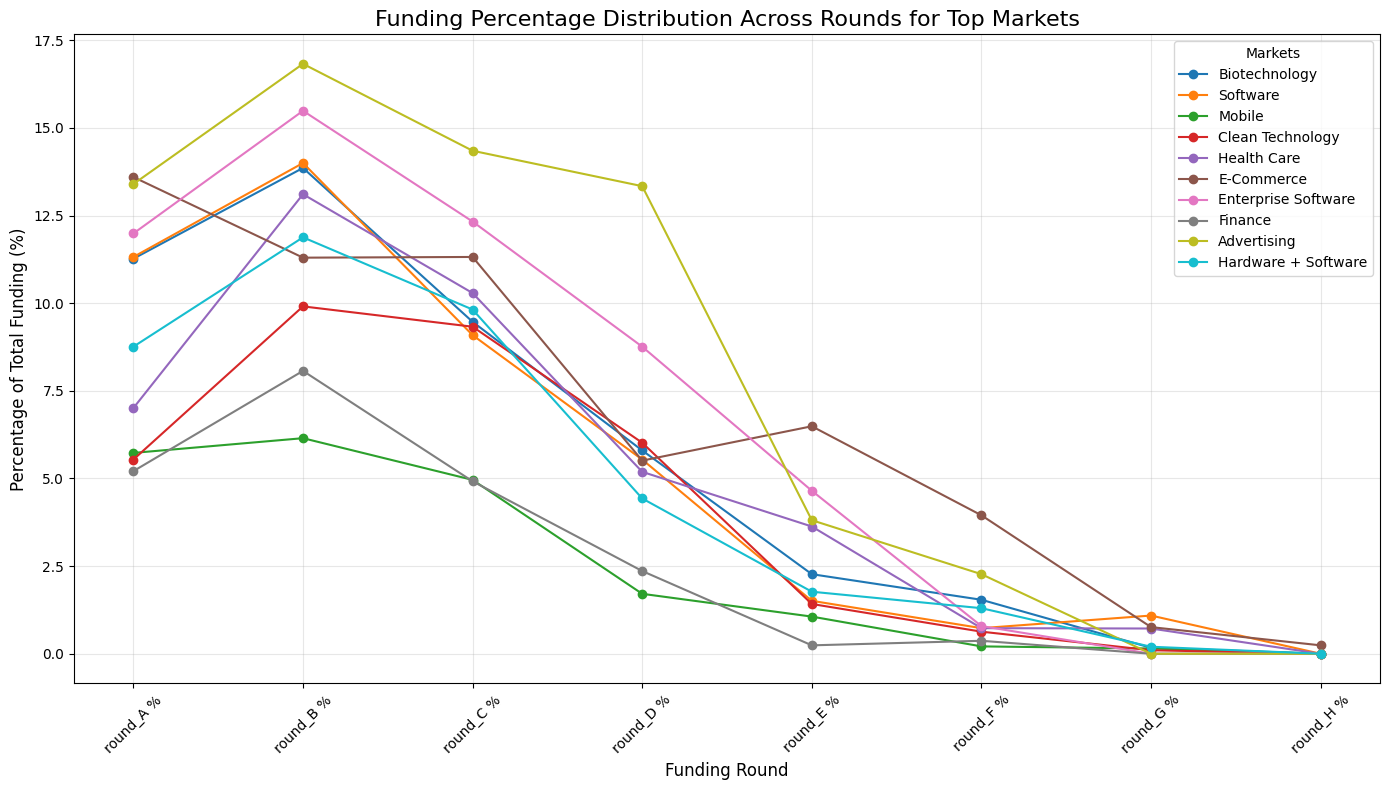

/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_30862/4162441707.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  increase_data['Funding Increases'] = increase_data['Funding Increases'].replace({True: 'Yes', False: 'No'})


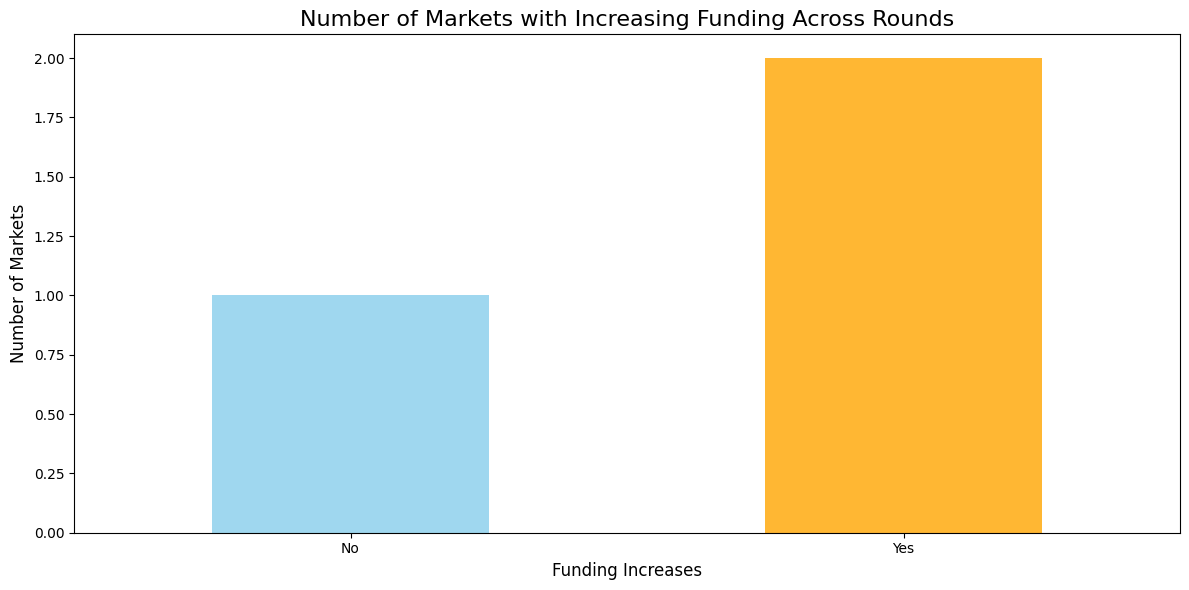

In [88]:
# Top markets to filter
top_markets = ['Biotechnology', 'Software', 'Mobile', 'Clean Technology', 
               'Health Care', 'E-Commerce', 'Enterprise Software', 
               'Finance', 'Advertising', 'Hardware + Software']

# Filter data for top markets
filtered_df = df[df['market'].isin(top_markets)]

# Funding columns to analyze
funding_columns = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
                   'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 
                   'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 
                   'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

# Group by market and calculate total funding and funding per round
market_wise_funding = filtered_df.groupby('market')[['funding_total_usd'] + funding_columns].sum().reset_index()

# Calculate percentage of total funding for each round
for col in funding_columns:
    market_wise_funding[f"{col} %"] = round(market_wise_funding[col] / market_wise_funding['funding_total_usd'] * 100, 2)

# Select relevant columns for visualization
percentage_columns = [f"{col} %" for col in funding_columns]
percentage_df = market_wise_funding[['market'] + percentage_columns]

# Prepare data for visualization
round_columns = ['round_A %', 'round_B %', 'round_C %', 'round_D %', 'round_E %', 'round_F %', 'round_G %', 'round_H %']
round_data = percentage_df[['market'] + round_columns].melt(id_vars=['market'], 
                                                            var_name='Funding Round', 
                                                            value_name='Percentage')

# Plot the percentage distribution
plt.figure(figsize=(14, 8))
for market in top_markets:
    market_data = round_data[round_data['market'] == market]
    plt.plot(market_data['Funding Round'], market_data['Percentage'], marker='o', label=market)

# Customization
plt.title('Funding Percentage Distribution Across Rounds for Top Markets', fontsize=16)
plt.xlabel('Funding Round', fontsize=12)
plt.ylabel('Percentage of Total Funding (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Markets", loc='upper right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Determine if funding increases in subsequent rounds
def funding_increase(row):
    rounds = ['round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']
    funding_values = [row[round] for round in rounds if round in row and not np.isnan(row[round])]
    return all(earlier <= later for earlier, later in zip(funding_values, funding_values[1:]))

market_wise_funding['Funding Increases'] = filtered_df.apply(funding_increase, axis=1)

# Bar plot for funding increases
plt.figure(figsize=(12, 6))
increase_data = market_wise_funding[['market', 'Funding Increases']]
increase_data['Funding Increases'] = increase_data['Funding Increases'].replace({True: 'Yes', False: 'No'})
increase_data.groupby('Funding Increases')['market'].count().plot(kind='bar', color=['skyblue', 'orange'], alpha=0.8)

# Customization
plt.title('Number of Markets with Increasing Funding Across Rounds', fontsize=16)
plt.xlabel('Funding Increases', fontsize=12)
plt.ylabel('Number of Markets', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Top Funding velocity markets:

In [89]:
# Handle missing dates: Replace 'last_funding_at' with the current year if missing
df['last_funding_at'] = df['last_funding_at'].fillna(pd.Timestamp.now())

# Calculate the total number of years (active duration)
df['total_no_years'] = (df['last_funding_at'] - df['founded_at']).dt.days / 365.0

# Handle cases where 'total_no_years' is zero or negative
df['total_no_years'] = df['total_no_years'].apply(lambda x: x if x > 0 else np.nan)

# Calculate Funding Velocity (funding_total_usd / total_no_years)
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')  # Ensure numeric funding
df['funding_velocity'] = df['funding_total_usd'] / df['total_no_years']

# Drop rows with missing or invalid values
df = df.dropna(subset=['funding_velocity'])

# Group by market to analyze average funding velocity
market_velocity = df.groupby('market')['funding_velocity'].mean().sort_values(ascending=False).reset_index()

# Inspect the resulting dataframe
df[['name', 'market', 'funding_total_usd', 'total_no_years', 'funding_velocity']].head()

name       market  funding_total_usd  total_no_years   
0            #waywire         News          1750000.0        0.079452  \
4  -R- Ranch and Mine      Tourism            60000.0        0.734247   
5       .Club Domains     Software          7000000.0        1.641096   
7             0-6.com  Curated Web          2000000.0        1.213699   
8    004 Technologies     Software                0.0        4.561644   

   funding_velocity  
0      2.202586e+07  
4      8.171642e+04  
5      4.265442e+06  
7      1.647856e+06  
8      0.000000e+00

In [90]:
print("\nTop 10 Markets with Highest Funding Velocity:")
market_velocity.head(10)


Top 10 Markets with Highest Funding Velocity:


market  funding_velocity
0      Humanitarian      1.225843e+08
1             Music      1.080025e+08
2        App Stores      1.057305e+08
3       Oil and Gas      6.672757e+07
4             Solar      4.951075e+07
5          Shopping      4.345072e+07
6          Hardware      3.646189e+07
7     TV Production      3.628231e+07
8  Vacation Rentals      2.901973e+07
9            Racing      2.893384e+07

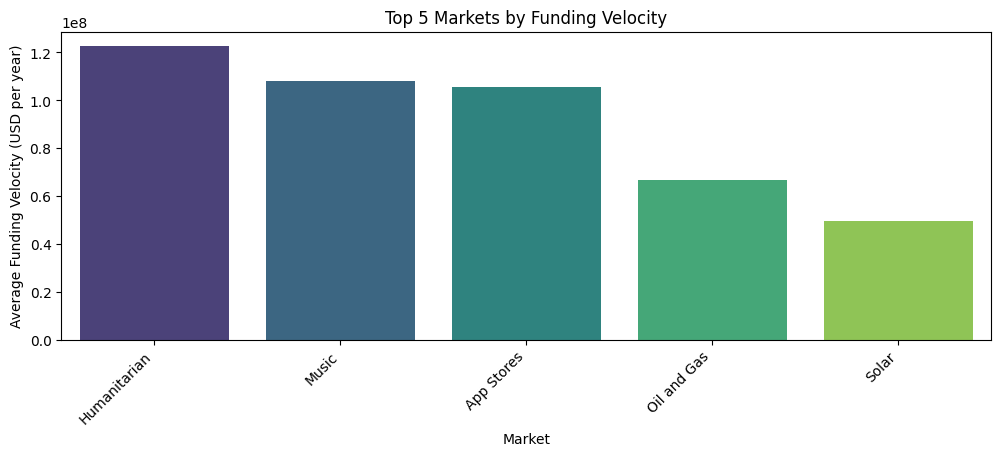

In [110]:
# Plot top 10 markets by funding velocity
plt.figure(figsize=(12,4))
sns.barplot(x='market', y='funding_velocity', data=market_velocity.head(5), palette='viridis')
plt.title('Top 5 Markets by Funding Velocity')
plt.xlabel('Market')
plt.ylabel('Average Funding Velocity (USD per year)')
plt.xticks(rotation=45, ha='right')
plt.show()


## Recommendations:

1. **Prioritize Humanitarian and Music Sectors**:  Given their exceptionally high funding velocities, these sectors offer promising investment opportunities. Consider exploring specific sub-sectors within these markets to identify high-potential companies.

2. **Diversify Across Sectors**:  While the top sectors are attractive, diversification across various markets can mitigate risk. Consider allocating a portion of your investment portfolio to sectors like Oil and Gas, Solar, and Shopping, which offer a balance of growth potential and stability.

3. **Conduct In-Depth Due Diligence**:  Before investing, conduct thorough research on each company, including its business model, management team, financial performance, and market potential. Pay close attention to the specific factors driving high funding velocities in each sector.

4. **Long-Term Perspective**:  Investing in high-growth sectors often requires a long-term perspective. Avoid short-term thinking and focus on the potential for sustained growth and returns.

5. **Stay Updated on Market Trends**:  Keep abreast of the latest trends and developments in the investment landscape. Emerging technologies, changing consumer preferences, and regulatory shifts can significantly impact the funding velocity of different sectors.

6. **Risk Management**:  While high funding velocity can be an attractive indicator, it's essential to assess the associated risks. Consider factors like market volatility, competitive intensity, and regulatory hurdles.


### Markets with highest Equity to debt ratio

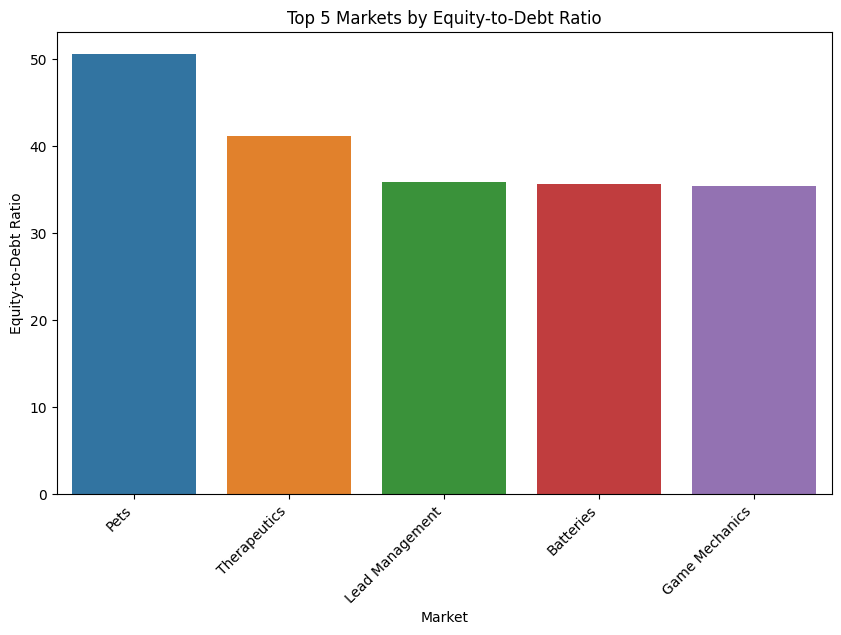

In [111]:
# Calculate total equity funding (including funding rounds A to F)
df['total_equity_funding'] = (df['venture'] +  df['angel'] + df['private_equity'] +  df['seed'] + df['equity_crowdfunding']+
                              df['post_ipo_equity'] + df['round_A'] + df['round_B'] + df['round_C'] + df['round_D'] + df['round_E'] +
                              df['round_F'] + df['round_G'] + df['round_H'])

# Calculate total debt funding
df['total_debt_funding'] = (df['convertible_note'] + df['debt_financing'] + df['post_ipo_debt'])

# Calculate Equity-to-Debt Ratio
df['equity_debt_ratio'] = df['total_equity_funding'] / df['total_debt_funding']

# Replace infinite or NaN values in the ratio
df['equity_debt_ratio']= df['equity_debt_ratio'].apply(lambda x: np.nan if np.isinf(x) else x)
df['equity_debt_ratio'].fillna(0, inplace=True)

# Group by Market and calculate mean ratios
equity_debt_by_market = df.groupby('market')[['total_equity_funding', 'total_debt_funding', 'equity_debt_ratio']].mean().reset_index()

# Sort by Equity-to-Debt Ratio
top_markets = equity_debt_by_market.sort_values(by='equity_debt_ratio', ascending=False).head(5)

# Plotting the Equity-to-Debt Ratio
plt.figure(figsize=(10,6))
sns.barplot(data=top_markets, x='market', y='equity_debt_ratio')
plt.title('Top 5 Markets by Equity-to-Debt Ratio')
plt.xlabel('Market')
plt.ylabel('Equity-to-Debt Ratio')
plt.xticks(rotation=45, ha='right')
plt.show()

### Recommendations: 

- For Markets with High Equity-to-Debt Ratios (Pets, Therapeutics, Lead Management, Batteries, Game Mechanics):

1. Consider Investment: These markets appear financially stable with lower debt burdens. Investing in companies within these sectors could be a prudent decision.
2. Due Diligence: While the financial metrics look promising, it's crucial to conduct thorough due diligence on specific companies. Consider factors like market growth potential, competitive landscape, and management team experience.

- For Markets with Lower Equity-to-Debt Ratios (Collaboration, Google Apps, Aerospace, Genetic Testing, Semantic Web):

1. Cautious Approach: While these markets may offer high growth potential, the higher debt levels pose additional risks.
2. Risk Assessment: Conduct a detailed risk assessment, considering factors like interest rate fluctuations, economic downturns, and specific company-level risks. 
3. Diversification: If investing in these markets, consider diversifying across multiple companies and sectors to mitigate risk.

### Correlation between funding_total_usd column and other funding columns.

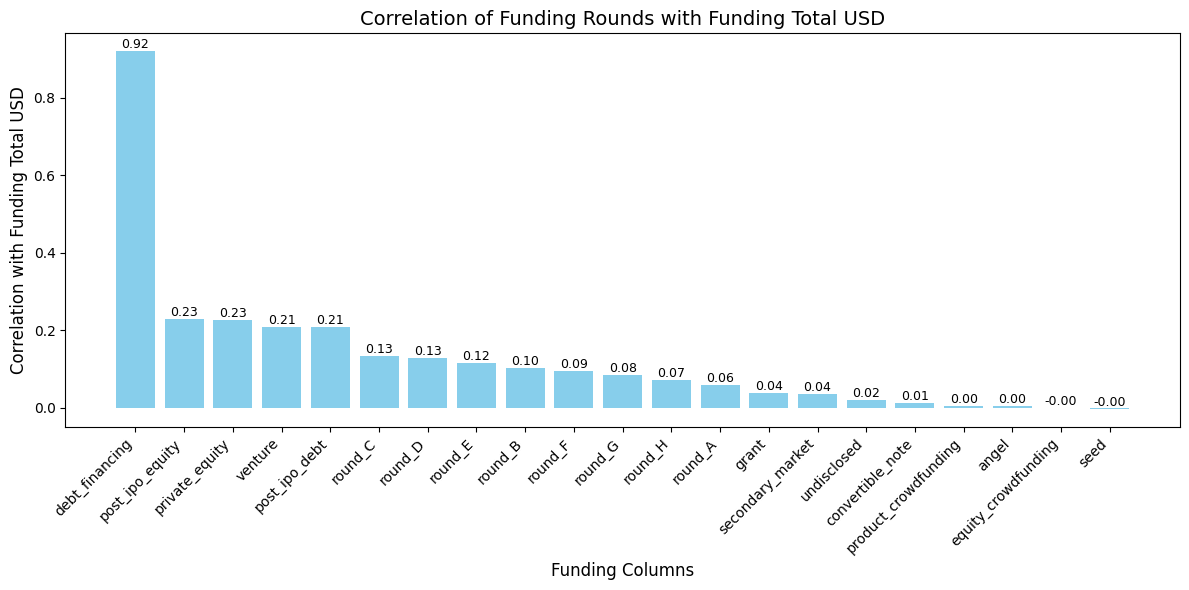

In [94]:
funding_columns = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
                   'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 
                   'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 
                   'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

# Add the target column to the list of funding columns
columns_to_analyze = funding_columns + ['funding_total_usd']

# Select only the relevant columns from the DataFrame
correlation_data = df[columns_to_analyze]

# Calculate correlations
correlation_matrix = correlation_data.corr()

# Extract correlation of each funding column with `funding_total_usd`
funding_correlations = correlation_matrix['funding_total_usd'].drop('funding_total_usd')


funding_correlations_sorted = funding_correlations.sort_values(ascending=False)

# Plot the correlations as a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(funding_correlations_sorted.index, funding_correlations_sorted.values, color='skyblue')

# Add labels and title
plt.xlabel('Funding Columns', fontsize=12)
plt.ylabel('Correlation with Funding Total USD', fontsize=12)
plt.title('Correlation of Funding Rounds with Funding Total USD', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Display values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()

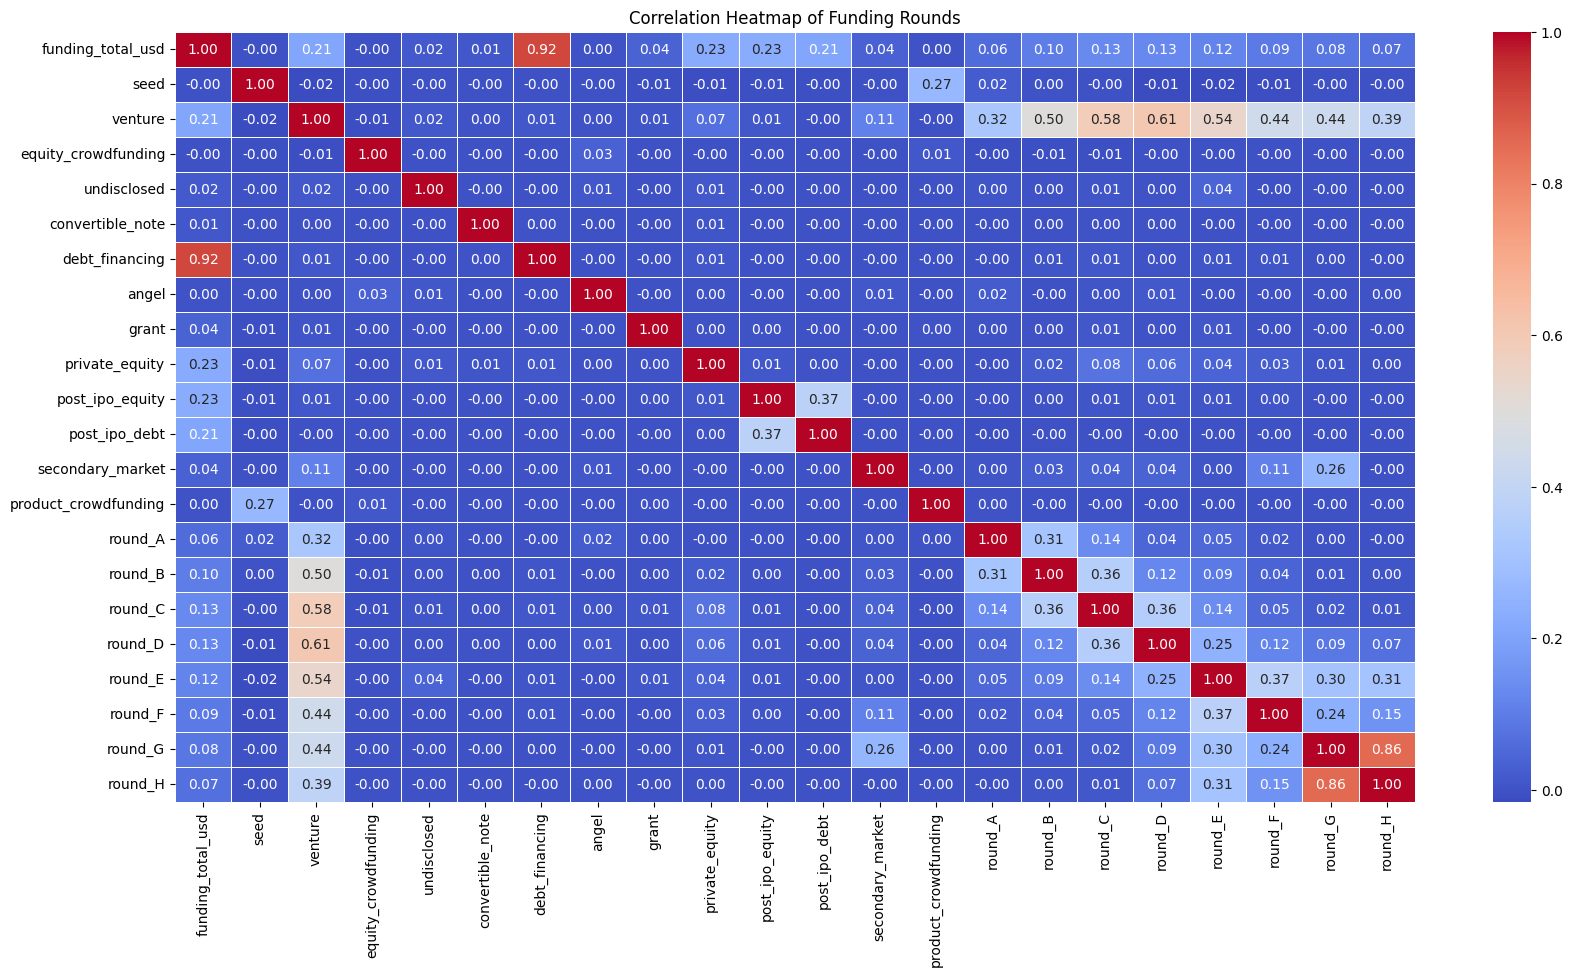

In [95]:
funding_columns = ['funding_total_usd', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 
                   'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 
                   'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 
                   'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 
                   'round_G', 'round_H']

funding_data = df[funding_columns]

# Calculate the correlation matrix
correlation_matrix = funding_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Funding Rounds")
plt.show()

### Observations:

- Funding Rounds: There is a strong positive correlation between later-stage funding rounds (round D, E, F, G, H) and the total funding amount. This suggests that companies that raise later-stage funding tend to have larger total funding amounts.
- Equity Crowdfunding and Secondary Market: These funding rounds have a weak correlation with total funding, suggesting that they are not major contributors to overall funding.
- Convertible Notes and Debt Financing: These have a moderate positive correlation with the total funding amount, indicating that they can be used as a precursor to larger equity rounds.

#### Interpretations:

- Later-Stage Funding: Investors are more likely to invest larger amounts in companies that have demonstrated significant growth and traction, as evidenced by their ability to raise later-stage funding.
- Early-Stage Funding: While early-stage funding (seed, venture) is important for initial growth, it may not be as strongly correlated with total funding as later-stage rounds.
- Diversification: Companies that successfully raise funds through multiple rounds (including equity, debt, and crowdfunding) may have a more diversified funding strategy and be better positioned for long-term growth.

## Recommendations:

1. **Prioritize Debt Financing and Post-IPO Equity**:  If the goal is to maximize total funding, consider exploring opportunities for debt financing and post-IPO equity. These rounds are associated with higher funding amounts.

2. **Focus on Venture and Private Equity**:  These funding sources are known for providing significant capital to high-growth companies. Building strong relationships with venture capital and private equity firms can increase the chances of raising substantial funds.

3. **Strategically Approach Later-Stage Rounds**:  Successfully navigating later-stage rounds can lead to significant funding injections. Develop a clear growth strategy and focus on achieving key milestones to attract investors for these rounds.

4. **Leverage Early-Stage Funding for Growth**:  While early-stage rounds may not be directly correlated with high total funding, they are crucial for laying the foundation for future growth. Use these funds to validate the business model, build a strong team, and achieve key milestones.

5. **Diversify Funding Sources**:  Consider a diversified funding strategy to reduce reliance on any single source of capital. A mix of equity, debt, and alternative financing options can provide flexibility and stability.

6. **Continuous Fundraising**:  Fundraising is an ongoing process. Maintain strong relationships with investors, actively seek new opportunities, and be prepared to adapt to changing market conditions.


### Is funding in round_b is higher than funding in round_a in top markets?

### Interpretations:

1. Investor Confidence: The high funding in Biotechnology and Clean Technology suggests strong investor confidence in these sectors, potentially driven by technological advancements and societal needs.
2. Market Demand: The significant funding in E-commerce and Mobile indicates high market demand and potential for growth in these sectors.
3. Risk Assessment: Lower funding in Hardware + Software and Finance might suggest higher perceived risk or lower expected returns in these sectors.

## total no of funding rounds both monthly and quarterly. 

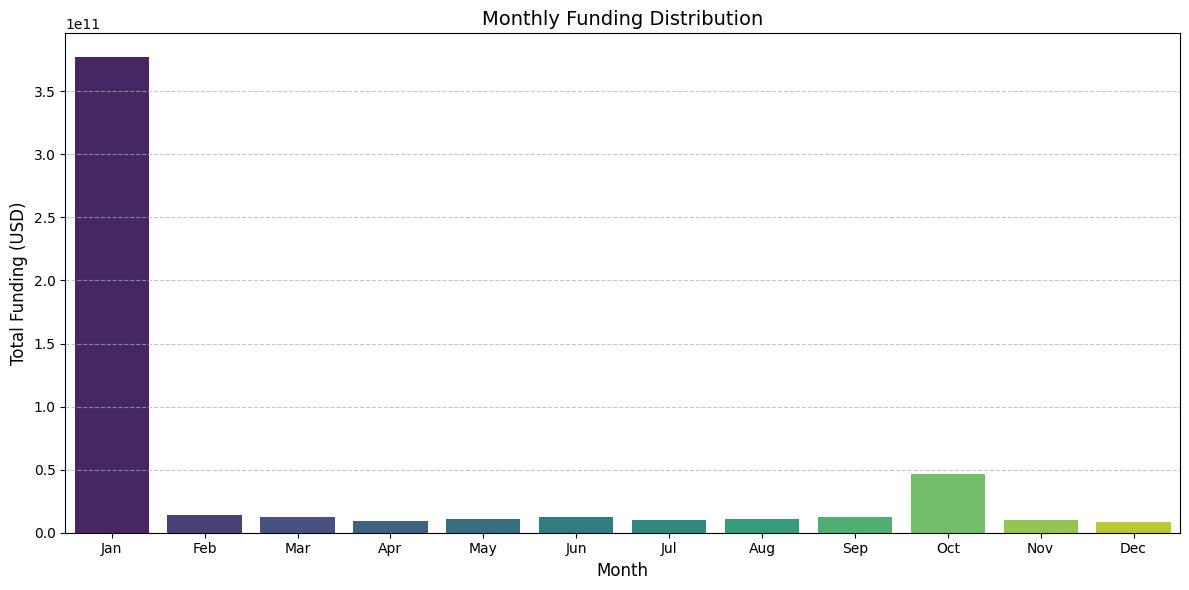

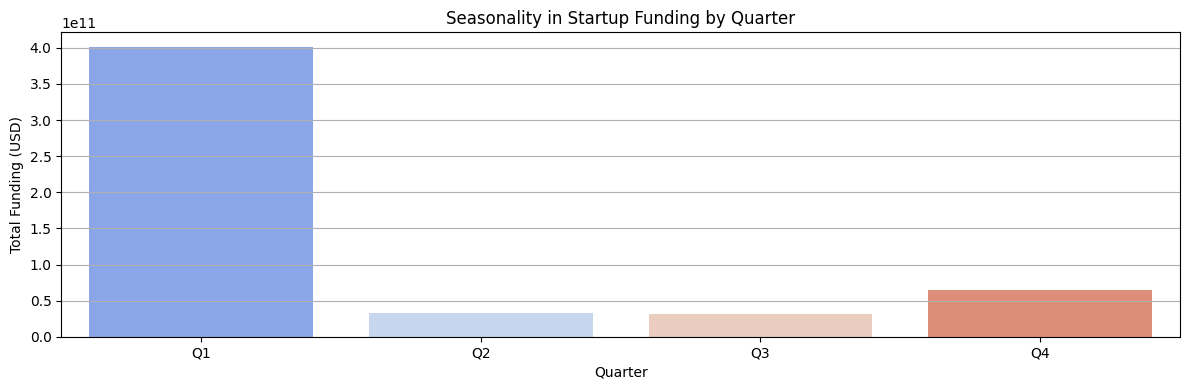

In [96]:
# Extract month and quarter from the 'founded_month' and 'founded_quarter' columns
df['month'] = df['founded_month'].str.split('-').str[1]
df['founded_q'] = df['founded_quarter'].str.split('-').str[1]

# Group by 'month' and sum funding
monthly_funding = df.groupby('month')['funding_total_usd'].sum().reset_index()
monthly_funding.columns = ['Month', 'Total Funding']
monthly_funding['Month'] = monthly_funding['Month'].astype(int)

# Plot Monthly Funding Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_funding['Month'], y=monthly_funding['Total Funding'], palette="viridis")
plt.title("Monthly Funding Distribution", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Funding (USD)", fontsize=12)
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Group by 'founded_q' and sum funding
quarterly_funding = df.groupby('founded_q')['funding_total_usd'].sum().reset_index()
quarterly_funding.columns = ['Quarter', 'Total Funding']
quarterly_funding['Total Funding'] = quarterly_funding['Total Funding'].astype(float)

# Plot Quarterly Funding Distribution
plt.figure(figsize=(12, 4))
sns.barplot(x=quarterly_funding['Quarter'], y=quarterly_funding['Total Funding'], palette="coolwarm")
plt.title("Seasonality in Startup Funding by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Total Funding (USD)")
plt.grid(axis='y')  # Adds gridlines only to the y-axis for clarity
plt.tight_layout()
plt.show()

  Quarter  Total Funding  Percentage
0      Q1   4.014075e+11   75.607820
1      Q2   3.239355e+10    6.101544
2      Q3   3.211267e+10    6.048639
3      Q4   6.499367e+10   12.241997


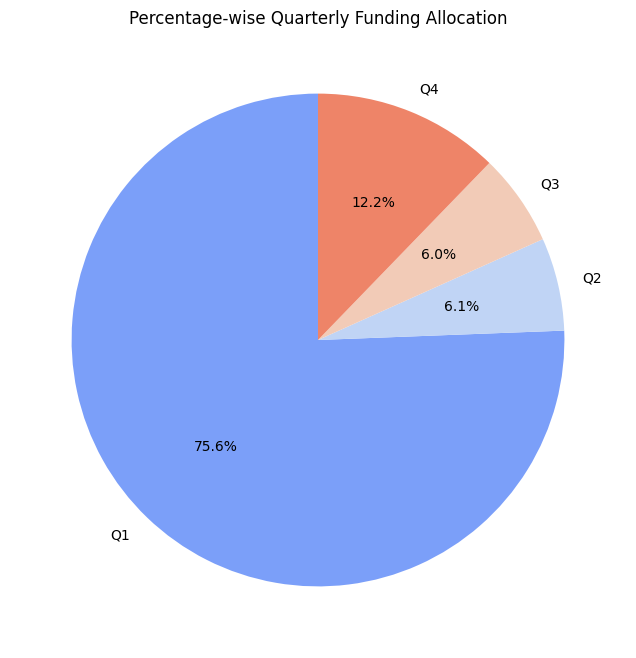

In [97]:
# Calculate the percentage allocation for each quarter
quarterly_funding['Percentage'] = (quarterly_funding['Total Funding'] / quarterly_funding['Total Funding'].sum()) * 100

# Display the quarterly funding allocation with percentages
print(quarterly_funding)

# Plot Quarterly Funding Allocation as a Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    quarterly_funding['Percentage'], 
    labels=quarterly_funding['Quarter'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette('coolwarm', len(quarterly_funding))
)
plt.title("Percentage-wise Quarterly Funding Allocation")
plt.show()


### Recommendations:

- For Startups:

1. **Capitalize on the January Effect**: Utilize the increased funding activity in January to secure capital for growth and expansion.
2. **Plan for Seasonal Fluctuations**: Be prepared for potential funding slowdowns in Q2 and adjust your fundraising strategy accordingly.
3. **Build Strong Relationships**: Cultivate relationships with investors throughout the year to maintain a strong pipeline of potential funding sources.
4. **Leverage Q3 and Q4 Momentum**: Use the increased activity in these quarters to secure additional funding and accelerate growth.

- For Investors:

1. **Focus on Q1 Opportunities**: Prioritize deal evaluation and investment decisions in Q1 to capitalize on the higher volume of quality deals.
2. **Diversify Portfolio**: Consider investing across different quarters to mitigate risks associated with seasonal fluctuations.
3. **Strategic Partnerships**: Collaborate with other investors and industry experts to identify promising startups and emerging trends.
4. **Long-Term Perspective**: Maintain a long-term investment horizon and avoid short-term pressures. Focus on supporting high-potential startups and fostering their growth.



# Hypothesis Testing

### Analysis of Variance (ANOVA) to Examine Funding Differences Across Company **Status** Groups

In [98]:
operating_startup_funding = df[df['status']=='operating']['funding_total_usd']
acquired_startup_funding = df[df['status']=='acquired']['funding_total_usd']
closed_startup_funding = df[df['status']=='closed']['funding_total_usd']

f_stat, p_value = f_oneway(operating_startup_funding, acquired_startup_funding, closed_startup_funding)
alpha = 0.05

if p_value<alpha:
  print("Reject null hypothesis. At least one group have different mean.")
else:
  print("Fail to reject null hypothesis. Means of all the groups are same.")

Reject null hypothesis. At least one group have different mean.


##### The ANOVA results indicate a statistically significant difference in the mean funding amounts across the three company status groups: operating, acquired, and closed. This suggests that companies with different statuses tend to have different levels of funding.

In [99]:
print(f"operating_startup_funding mean : {operating_startup_funding.mean()}, acquired_startup_funding mean : {acquired_startup_funding.mean()}, closed_startup_funding mena : {closed_startup_funding.mean()}")

operating_startup_funding mean : 14911244.80147474, acquired_startup_funding mean : 22261344.25121951, closed_startup_funding mena : 7742958.383766234


In [100]:
t_stat, pval_oa = ttest_ind(operating_startup_funding, acquired_startup_funding)
alpha = 0.05

if pval_oa<alpha:
  print("Reject null hypothesis. There is a significant difference between the mean of the two groups.")
else:
  print("Fail to reject null hypothesis. There is no significant difference between the mean of the two groups.")

Reject null hypothesis. There is a significant difference between the mean of the two groups.


In [101]:
t_stat, pval_ca = ttest_ind(closed_startup_funding, acquired_startup_funding)
alpha = 0.05

if pval_ca<alpha:
  print("Reject null hypothesis. There is a significant difference between the mean of the two groups.")
else:
  print("Fail to reject null hypothesis. There is no significant difference between the mean of the two groups.")

Reject null hypothesis. There is a significant difference between the mean of the two groups.


### Analyzing Funding Disparities Across Markets by performing ANOVA Hypothesis Test

In [102]:
# Define the selected markets
selected_markets = ['Biotechnology', 'Mobile', 'Software', 'Clean Technology', 'Health Care', 
                    'E-Commerce', 'Enterprise Software', 'Finance', 'Hardware + Software']

# Create a dictionary to hold funding data for each market
market_funding = {market: df[df['market'] == market]['funding_total_usd'].dropna() for market in selected_markets}

# Perform ANOVA test across all selected markets
anova_result = f_oneway(*market_funding.values())
print("ANOVA result:", anova_result)

# Define the significance level
alpha = 0.05

# Perform pairwise t-tests and check for significant differences
significant_pairs = {}
for (market1, data1), (market2, data2) in combinations(market_funding.items(), 2):
    t_stat, p_value = ttest_ind(data1, data2, equal_var=False)  # assuming unequal variances
    if p_value < alpha:  # check if the result is significant
        significant_pairs[f"{market1} vs {market2}"] = (t_stat, p_value)

# Output the pairs with significant differences
print("\nSignificant Differences (95% confidence level):")
for comparison, result in significant_pairs.items():
    print(f"{comparison}: t-statistic = {result[0]:.4f}, p-value = {result[1]:.4e}")

ANOVA result: F_onewayResult(statistic=1.5020124900362826, pvalue=0.15061181446962738)

Significant Differences (95% confidence level):
Biotechnology vs Software: t-statistic = 8.0565, p-value = 1.0422e-15
Biotechnology vs Clean Technology: t-statistic = -3.8354, p-value = 1.3357e-04
Biotechnology vs Health Care: t-statistic = -2.1794, p-value = 2.9435e-02
Biotechnology vs E-Commerce: t-statistic = 3.1952, p-value = 1.4141e-03
Biotechnology vs Finance: t-statistic = 3.9627, p-value = 7.7736e-05
Biotechnology vs Hardware + Software: t-statistic = 4.3386, p-value = 1.5103e-05
Software vs Clean Technology: t-statistic = -7.2679, p-value = 8.6489e-13
Software vs Health Care: t-statistic = -8.3903, p-value = 1.5000e-16
Software vs E-Commerce: t-statistic = -2.3029, p-value = 2.1408e-02
Software vs Enterprise Software: t-statistic = -2.6914, p-value = 7.2171e-03
Clean Technology vs Health Care: t-statistic = 2.3718, p-value = 1.7864e-02
Clean Technology vs E-Commerce: t-statistic = 5.4226, p

### Observvations: 

1. Biotechnology consistently shows significantly higher funding compared to most other markets. This suggests that investors are particularly interested in this sector.
2. Software and Clean Technology also tend to have higher funding levels compared to markets like Finance and Hardware + Software.
3. E-commerce and Enterprise Software show intermediate levels of funding, with some significant differences between them and other markets.

### Analyzing Funding Disparities Across country code by performing ANOVA Hypothesis Test

In [103]:
top_country_funding = ['USA', 'CHN', 'GBR', 'IND', 'CAN', 'RUS', 'DEU', 'ISR', 'FRA', 'NLD', 'BMU', 'MAF', 'LUX', 'MYS', 'TWN', 'EGY', 'NZL']

country_funding = {country: df[df['country_code']==country]['funding_total_usd'] for country in top_country_funding}

anova_result = f_oneway(*country_funding.values())
print("ANOVA result:", anova_result)

# Define the significance level
alpha = 0.05

# Perform pairwise t-tests and check for significant differences
significant_pairs = {}
for (country1, data1), (country2, data2) in combinations(country_funding.items(), 2):
    t_stat, p_value = ttest_ind(data1, data2, equal_var=False)  # assuming unequal variances
    if p_value < alpha:  # check if the result is significant
        significant_pairs[f"{country1} vs {country2}"] = (t_stat, p_value)

# Output the pairs with significant differences
print("\nSignificant Differences (95% confidence level):")
for comparison, result in significant_pairs.items():
    print(f"{comparison}: t-statistic = {result[0]:.4f}, p-value = {result[1]:.4e}")
    

ANOVA result: F_onewayResult(statistic=0.9402647878556764, pvalue=0.5214208853425497)

Significant Differences (95% confidence level):
USA vs CHN: t-statistic = -4.1089, p-value = 4.3807e-05
USA vs GBR: t-statistic = 5.1008, p-value = 3.4167e-07
USA vs CAN: t-statistic = 3.8719, p-value = 1.0956e-04
USA vs DEU: t-statistic = 3.3126, p-value = 9.4011e-04
USA vs ISR: t-statistic = 4.7130, p-value = 2.4934e-06
USA vs FRA: t-statistic = 7.4568, p-value = 9.3007e-14
USA vs LUX: t-statistic = 2.4023, p-value = 2.6265e-02
CHN vs GBR: t-statistic = 6.2841, p-value = 5.8407e-10
CHN vs IND: t-statistic = 2.4590, p-value = 1.4074e-02
CHN vs CAN: t-statistic = 5.9062, p-value = 5.2204e-09
CHN vs RUS: t-statistic = 4.2945, p-value = 1.9547e-05
CHN vs DEU: t-statistic = 5.6796, p-value = 1.8600e-08
CHN vs ISR: t-statistic = 6.1556, p-value = 1.2590e-09
CHN vs FRA: t-statistic = 7.0938, p-value = 3.3548e-12
CHN vs NLD: t-statistic = 2.3754, p-value = 1.8042e-02
CHN vs LUX: t-statistic = 4.8318, p-val

/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_30862/97161397.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(data1, data2, equal_var=False)  # assuming unequal variances
/Users/aakanksha/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/aakanksha/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


### Key findings:

1. USA consistently shows significantly higher funding compared to most other countries. This suggests that the US dominates the global startup funding landscape.
2. China and India also have significantly higher funding levels compared to many other countries, indicating a growing startup ecosystem in these regions.
3. European countries like the UK, Germany, France, and Israel have significant funding, but they generally lag behind the US, China, and India.

### Analyzing Funding Disparities Across region by performing ANOVA Hypothesis Test

In [104]:
top_funding_region = ['SF Bay Area', 'New York City', 'Boston', 'Los Angeles', 'Seattle', 'London', 'San Diego', 'Beijing', 'Washington, D.C.', 'Chicago', 'West Sussex', 'Billings', 'Homburg', 'Rostock', 'Bermuda', 'Coleraine']

region_funding = {reg: df[df['region']==reg]['funding_total_usd'] for reg in top_funding_region}

anova_result = f_oneway(*region_funding.values())
print("ANOVA result:", anova_result)

# Define the significance level
alpha = 0.05

# Perform pairwise t-tests and check for significant differences
significant_pairs = {}
for (region1, data1), (region2, data2) in combinations(region_funding.items(), 2):
    t_stat, p_value = ttest_ind(data1, data2, equal_var=False)  # assuming unequal variances
    if p_value < alpha:  # check if the result is significant
        significant_pairs[f"{region1} vs {region2}"] = (t_stat, p_value)

# Output the pairs with significant differences
print("\nSignificant Differences (95% confidence level):")
for comparison, result in significant_pairs.items():
    print(f"{comparison}: t-statistic = {result[0]:.4f}, p-value = {result[1]:.4e}")

ANOVA result: F_onewayResult(statistic=nan, pvalue=nan)

Significant Differences (95% confidence level):
SF Bay Area vs Los Angeles: t-statistic = 5.2140, p-value = 1.9983e-07
SF Bay Area vs London: t-statistic = 7.9148, p-value = 3.2725e-15
SF Bay Area vs Beijing: t-statistic = -2.7101, p-value = 7.1004e-03
Boston vs Los Angeles: t-statistic = 3.7165, p-value = 2.0657e-04
Boston vs London: t-statistic = 5.8915, p-value = 4.3176e-09
Boston vs Beijing: t-statistic = -3.0559, p-value = 2.4261e-03
Los Angeles vs San Diego: t-statistic = -3.0963, p-value = 2.0261e-03
Los Angeles vs Beijing: t-statistic = -4.5668, p-value = 6.9921e-06
London vs San Diego: t-statistic = -4.4272, p-value = 1.1015e-05
London vs Beijing: t-statistic = -5.3262, p-value = 1.9126e-07
London vs Washington, D.C.: t-statistic = -2.6257, p-value = 8.8161e-03
San Diego vs Beijing: t-statistic = -2.5107, p-value = 1.2403e-02
Beijing vs Washington, D.C.: t-statistic = 3.0538, p-value = 2.3746e-03
Beijing vs Chicago: t-st

/Users/aakanksha/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_30862/1776351136.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(data1, data2, equal_var=False)  # assuming unequal variances


### Insights:

1. SF Bay Area and New York City consistently show significantly higher funding compared to most other regions. This suggests that these regions are major hubs for startup activity and investment.
2. Boston, Los Angeles, and London also have significant funding, indicating a strong startup ecosystem in these cities.
3. Regions like San Diego, Beijing, and Washington D.C. show moderate levels of funding, while cities like Chicago, West Sussex, Hamburg, Rostock, Bermuda, and Coleraine have lower funding levels.

### Checking if there is any association between type of market and funding rounds 

In [105]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['market'], df['funding_rounds'])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Results
print(f"Chi-Square Statistic: {chi2_stat}, P-Value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Funding rounds are associated with specific markets.")
else:
    print("Fail to reject the null hypothesis: No significant association between funding rounds and markets.")

Chi-Square Statistic: 9889.917170496228, P-Value: 1.0
Fail to reject the null hypothesis: No significant association between funding rounds and markets.


### Observations: 

- Based on the Chi-Square test, we fail to reject the null hypothesis. This means that there is no significant association between the type of market and the number of funding rounds.

- The distribution of funding rounds across different market types is not significantly different from what would be expected by chance. This suggests that the market type does not have a strong influence on the number of funding rounds a company receives.



1. Correlation vs. Causation: While there's no significant association, this doesn't necessarily mean that market type has no impact on funding rounds. Other factors, such as company size, industry trends, and economic conditions, could also influence funding outcomes.
2. Data Quality and Sample Size: The quality and representativeness of the data used in the analysis can affect the results. A larger sample size may increase the power of the test and potentially reveal significant associations.

In [106]:
df['market'] = df['market'].replace('Unknown', np.nan)
df['country_code'] = df['country_code'].replace('Unknown', np.nan)
df['region'] = df['region'].replace('Unknown', np.nan)

In [107]:
round(df[['market', 'country_code', 'region', 'founded_at', 'founded_year']].isnull().sum()/df.shape[0]*100,2)

market          5.03
country_code    6.44
region          6.44
founded_at      0.00
founded_year    0.00
dtype: float64

In [108]:
df.to_csv('final_df.csv')

In [109]:
df.to_excel('investment_vc_final.xlsx')


# Final recommendations for stakeholders and investors: 

1. **Sector and Market Strategy:**

- Prioritize High-Growth Sectors: Focus on Biotechnology, Software, and Mobile for their strong funding and growth potential.
- Diversify Across Sectors: Balance investments in emerging sectors like Solar, Clean Technology, and Health Care alongside high-stability sectors like Oil and Gas.
- Leverage Sub-Sectors: Target high-performing niches within top markets, such as genomic research in Biotechnology or Custom Retail.

2. **Geographical Focus:**

- Top Countries and Regions: Prioritize investments in USA, China, UK, and high average funding regions like Lyngby and Burleigh Heads.
- Emerging Markets: Explore opportunities in India, South Korea, and Brazil, which show promising growth potential.
- Regional Diversification: Allocate funds across NYC, SF Bay Area, London, and LA for a balanced approach.

3. **Investment Approach:**

- Balance Early and Late-Stage Deals: Invest in early-stage rounds to build foundations and late-stage rounds for significant returns.
- Long-Term Perspective: Focus on sectors requiring patience and sustained growth, avoiding short-term pressures.

4. **Due Diligence and Risk Management**

- Conduct Thorough Due Diligence: Assess team strength, business model, market size, financials, and competitive dynamics for each deal.
- Evaluate Risks: Mitigate risks by diversifying investments and analyzing regulatory, geopolitical, and market volatility factors.

5. **Strategic Partnerships**

- Local Collaboration: Partner with accelerators, VC firms, and local experts to gain deeper insights into ecosystems.
- Network with Industry Leaders: Build relationships with entrepreneurs and stakeholders for exclusive opportunities.

6. **Funding Strategy**

- Leverage Diverse Funding Sources: Combine equity, debt, and alternative funding methods for financial stability.
- Capitalize on Seasonal Trends: Take advantage of increased funding activity in Q1 and Q4 to secure capital.